#### <CENTER><h1><u>Implementing and Evaluating a Series of Regression Models</u></CENTER></h1>

<br>

<CENTER>(TEAM CONTRIBUTORS: CHAITANYA DEVARSHI, SHASHANK SHEKHAR, BITTERLEIN KONNOTH BIJU)</CENTER>

-------
-------

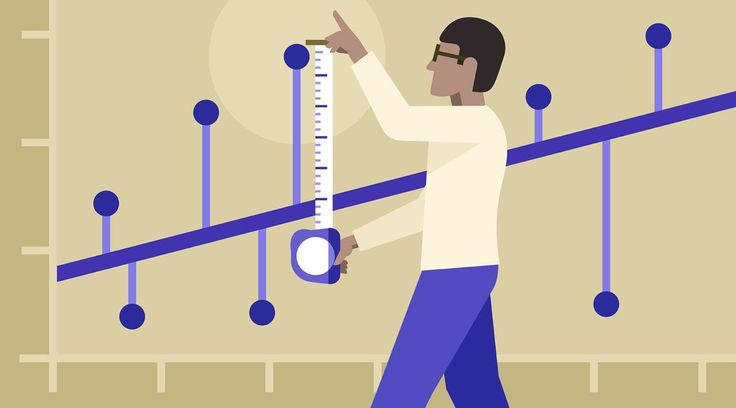


===================================================================================================================

<h2><u>Content</u></h2>

1. [Introduction](#1.-Introduction)

  1.1 [Problem Statement](#1.1-Problem-Statement)
  
  1.2 [Methodology](#1.2-Methodology)
  

2. [Data Loading & Preparation](#2.-Data-Loading-&-Preparation)

  2.1 [Read the Data](#2.1-Read-the-Data)
  
  2.2 [Data In Usable form](#2.2-Data-In-Usable-Form)
  
  2.3 [Data Validation](#2.3-Data-Validation)
  


3. [EDA](#3.-Exploratory-Data-Analysis)

  3.1 [Missing Values](#3.1-Missing-Values)
  
  3.2 [Univariate](#3.2-Univariate-Analysis)
  
   - 3.2.1 [For numeric features](#3.2.1-Univariate-Analysis-for-numeric-features)
     
   - 3.2.2 [For Binary features](#3.2.2-Univariate-Analysis-for-Binary-features)
     
  3.3 [Bivariate](#3.3-Bivariate-Analysis)
  
  3.4 [Multivariate](#3.4-Multivariate-Analysis)


4. [Data Cleaning](#4.-Data-Cleaning)

  4.1 [Handling Skewness](#4.1-Handling-Skewness)
  
  4.2 [Handling Outliers](#4.2-Handling-Outliers)


5. [Prepped Data Review](#5.-Prepped-Data-Review)


6. [Dimensionality Reduction](#6.-Dimensionality-Reduction)

  6.1 [Variance Threshold](#6.1-Variance-Threshold)
  
  6.2 [PCA](#6.2-PCA)


7. [Regression Modeling & Model Selection](#7.-Regression-Modeling-&-Model-Selection)

  7.1 [1<sup>st</sup> Poisson Model](#7.1-1st-Poisson-Regression-Model)
  
  7.2 [2<sup>nd</sup> Poisson Model](#7.2-2nd-Poisson-Regression-Model)
  
  7.3 [1<sup>st</sup> Negative Binomial Model](#7.3-1st-Negative-Binomial-Regression-Model)
  
  7.4 [2<sup>nd</sup> Negative Binomial Model](#7.4-2nd-Negative-Binomial-Regression-Model)
  
  7.5 [1<sup>st</sup> Multiple Linear Model](#7.5-1st-Multiple-Linear-Regression-Model)
  
  7.6 [2<sup>nd</sup> Multiple Linear Model](#7.6-2nd-Multiple-Linear-Regression-Model)
  
  [Model Selection](#-Model-Selection)


9. [Conclusion](#Conclusion)


===================================================================================================================

## 1. Introduction

- The dataset comprised of information pertaining to NY State High School graduation metrics for the 2018-2019 school year. The dataset is sourced from the NY State Education Department [(NYSED)](https://data.nysed.gov/downloads.php). The dataset is comprised of more than 73,000 observations, each of which pertains to a particular NY State school district and associated sub groupings/categorizations of high school students who had been enrolled for at least 4 years as of the end of the 2018-2019 school year. 


- __A data dictionary describing the attributes contained within the file is provided below.__

|Data Set Attribute |Description|
|:-------------------|:-----------|
|report_school_year |Indicates school year for which high school graduation info is being reported|
|aggregation_index |Numeric code identifying manner in which high school graduation data has been aggregated|
|aggregation_type |Text description of how high school graduation data has been aggregated|
|aggregation_name | Name of city school with district |
|nrc_code |Numeric code identifying "needs / resource capacity", which is an indicator of the type of school district|
|nrc_desc |Text description of the type of school district|
|county_code |Numeric code for county name|
|county_name |Full name of applicable NY State county|
|nyc_ind |Indicates whether or not the school district resides within the borders of NYC|
|membership_desc |Indicates school year in which students first enrolled in High School|
|subgroup_code |Numeric code identifying student subgrouping|
|subgroup_name |Text description of student subgrouping. Note that a student may belong to MORE THAN ONE subgrouping (e.g., "Female", "Hispanic", "Not English Language Learner", etc.)|
|enroll_cnt |How many students of the indicated subgrouping were enrolled during the given school year|
|grad_cnt |How many enrolled students of the indicated subgrouping graduated at the end of the given school year|
|grad_pct |What percentage of enrolled students of the indicated subgrouping graduated at the end for the given school year|
|local_cnt |How many enrolled students of the indicated subgrouping were awarded a "Local" diploma|
|local_pct |What percentage of enrolled students of the indicated subgrouping were awarded a "Local" diploma|
|reg_cnt |How many enrolled students of the indicated subgrouping were awarded a "Regents" diploma|
|reg_pct |What percentage of enrolled students of the indicated subgrouping were awarded a "Regents" diploma|
|reg_adv_cnt |How many enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma|
|reg_adv_pct |What percentage of enrolled students of the indicated subgrouping were awarded a "Regents Advanced" diploma|
|non_diploma_credential_cnt |How many enrolled students of the indicated subgrouping achieved a non diploma credential|      |non_diploma_credential_pct |What percentage of enrolled students of the indicated subgrouping achieved a non-diploma credential|
|still_enrolled_cnt |How many enrolled students of the indicated subgrouping did not graduate but were still_enrolled|
|still_enrolled_pct |What percentage of enrolled students of the indicated subgrouping did not graduate but were still_enrolled|
|ged_cnt |How many enrolled students of the indicated subgrouping were awarded a "GED" diploma|
|ged_pct |What percentage of enrolled students of the indicated subgrouping were awarded a "GED" diploma|
|dropout_cnt |How many enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year|
|dropout_pct |What percentage of enrolled students of the indicated subgrouping discontinued their high school enrollment during the school year|

----

<b> [Back to Content](#Content) </b>

## 1.1 Problem Statement

- The main objective for this Project is to apply the full data science project lifecycle to the implementation of a series of regression models. Our work should include EDA, data preparation (including the use of attribute transforms as needed), feature selection, and a thorough evaluation of model performance metrics. 

- The response variable we will be modeling is the data set’s “dropout_cnt” attribute, which represents the number of enrolled students who discontinued their enrollment (i.e., “dropped out”) from within the indicated school district or student subgroup . 

- Therefore, our task is to construct and compare/contrast a series of regression models (after completing the necessary EDA and data prep work) that predict the number of student “dropouts” relative to certain properties/characteristics of a given school district, associated student subgrouping. 

----

<b> [Back to Content](#Content) </b>

## 1.2 Methodology

<h3><u> To address this Project Work, we will follow these below steps :- </u></h3>

1. **Load the dataset**: Upload the `Project1_Data.csv` file from the DAV 6150 Github Repository.

2. **Read the dataset**: Using a Jupyter Notebook, read the dataset from the respective Github repository and load it into a Pandas DataFrame.

3. **Perform EDA**: Carry out Exploratory Data Analysis to examine the dataset's structure and understand the variables.

4. **Identify and rectify issues**: Detect data quality and integrity issues such as missing values or outliers during EDA, and take appropriate actions to address them.

5. **Prepped Data Review**: 

6. **Feature Scale, Selection & Dimensionality Reduction**: Applying feature selection techniques and perform dimensionality reduction to prepare the data for modeling.

7. **Regression Modelling**:

8. **Models Selection**:

9. **Conclusion**: 

----

<b> [Back to Content](#Content) </b>

## 2. Data Loading & Preparation

In [2]:
# Importing basic Libraries.

import pandas as pd 
import numpy as np

# Importing Libraries for statistical analysis.

import statsmodels.api as sm
from scipy import stats

# Importing Libraries for machine learning models.

import sklearn
from sklearn import metrics
import imblearn
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import PoissonRegressor


# Importing Libraries for plotting the graphs.

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline




# Importing Libraries for Standarising and Normalising.

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import Library for PCA

from sklearn.decomposition import PCA


# Import missingno library for checking on missing values.

import missingno as msno


# Importing train_test_split .

from sklearn.model_selection import train_test_split, cross_val_score, KFold


# Importing Library for imputing null values.

from sklearn.impute import KNNImputer


# Importing filterwarnings from warnings to ignore warnings.

import warnings
warnings.filterwarnings("ignore")

### 2.1 Read the Data

In [3]:
# Loading the data from the github repository DAV-6150.

NY_State_High_School = pd.read_csv("https://raw.githubusercontent.com/Shashank4075/DAV-6150/refs/heads/main/Project1_Data.csv")
df = NY_State_High_School.copy()

df.head()

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   

   reg_adv_cnt reg_adv_pct non_diploma_credential_cnt  \
0           91         14%                         16   
1           47         15%                          2   
2           44         13%                         14   
3            -           -                          -   
4           23          6%                         10   

  non_diploma_credential_pct still_enr_cnt still_enr_pct ged_cnt ged_pct  \
0                         2%            30            5%       0      0%   
1                         1%            11            3%       0      0%   
2                         4%            19            6%       0      0%   
3                          -             -             -       -       -   
4                         3%            18            5%       0      0%   

  dropout_cnt dropout_pct  
0         148         22%  
1          65         20%  
2          83         25%  
3           -           -  
4          91         25%  

[5 rows x 29 columns]

In [3]:
# Identifing how many rows and columns the dataframe consist of.

df.shape

(73152, 29)

- The dataset consists of **73152 rows** and **29 columns**. 

In [4]:
# Getting a concise summary of the DataFrame .

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

**Dataset observation:**



- Index ranges from 0-73151.

- Total number of attributes are 29.

- Where 5 are 'int' and 24 are 'object'.

- As of now there is not any missing values in any columns.


----

<b> [Back to Content](#Content) </b>

## 3. Exploratory Data Analysis

- Analyzing a data set for purposes of summarizing its characteristics, identifying relationships between its attributes, and discovering patterns, trends, outliers, missing values and invalid values within the data. 

In [5]:
# Checking columns names.

df.columns

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')

### 3.1 Missing Values

In [6]:
# checking for null valus 
df.isnull().sum()

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64

There is no missing values. Our dataset for this analysis looks clean.

In [7]:
# checking for duplicate values.

df.duplicated().sum()

0

There are no duplicate values in the dataset 

----

<b> [Back to Content](#Content) </b>

### 3.2 Univariate Analysis

In [8]:
df.head(10)

report_school_year  aggregation_index aggregation_type  \
0            2018-19                  3         District   
1            2018-19                  3         District   
2            2018-19                  3         District   
3            2018-19                  3         District   
4            2018-19                  3         District   
5            2018-19                  3         District   
6            2018-19                  3         District   
7            2018-19                  3         District   
8            2018-19                  3         District   
9            2018-19                  3         District   

              aggregation_name  nrc_code                   nrc_desc  \
0  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
1  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
2  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
3  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
4  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
5  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
6  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
7  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
8  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   
9  ALBANY CITY SCHOOL DISTRICT         3  Urban-Suburban High Needs   

   county_code county_name  nyc_ind                     membership_desc  ...  \
0            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
1            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
2            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
3            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
4            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
5            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
6            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
7            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
8            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   
9            1      ALBANY        0  2013 Total Cohort - 6 Year Outcome  ...   

   reg_adv_cnt reg_adv_pct non_diploma_credential_cnt  \
0           91         14%                         16   
1           47         15%                          2   
2           44         13%                         14   
3            -           -                          -   
4           23          6%                         10   
5            5          5%                          4   
6           12         26%                          0   
7           49         38%                          2   
8            -           -                          -   
9           91         17%                          0   

  non_diploma_credential_pct still_enr_cnt still_enr_pct ged_cnt ged_pct  \
0                         2%            30            5%       0      0%   
1                         1%            11            3%       0      0%   
2                         4%            19            6%       0      0%   
3                          -             -             -       -       -   
4                         3%            18            5%       0      0%   
5                         4%             8            8%       0      0%   
6                         0%             0            0%       0      0%   
7                         2%             4            3%       0      0%   
8                          -             -             -       -       -   
9                         0%            15            3%       0      0%   

  dropout_cnt dropout_pct  
0         148         22%  
1          65         20%  
2          83         25%  
3           -           -  
4          91         25%  
5          28         29%  
6           8    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

- In this dataset, most of the columns that should be of float or int data types are currently of object data type. We will change those first for better analysis.

### 3.2.1 For Numeric Features

In [10]:
# Create function to plot dist and box plot for all the numeric features with suffix '_pct' attributes. 

def box_dist_plot_pct(df):
    
    """
    This function is to plot box plot and distribution plot for each column, 
    column's median value, with count and percentage of null values. 
    
    Parameters:
        data : DataFrame  # DataFrame contains data.
    """
    
    plt.style.use('ggplot')
    
    # Columns with suffix '_pct' attributes.
    columns = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 
               'still_enr_pct', 'ged_pct', 'dropout_pct' ]

    for column in columns:
        
        # For changing the '-' values to NaN and then removing the % sign, lastly concert it to float type.
        df[column] = df[column].str.replace('-', 'NaN', regex=False)
        df[column] = df[column].str.replace('%', '', regex=False).astype(float)
        
        plt.figure( figsize = (18, 7) )  # Set the figure size

        # Box plot.
        plt.subplot(121)
        sns.boxplot(y = df[column])  # Create box plot
        plt.title(f'Box Plot of : {column}')

        # Distribution plot.
        plt.subplot(122)
        sns.histplot(df[column], bins=30, kde=True)  # Create histogram with KDE
        plt.title(f'Distribution Plot of : {column}')
        
        # Adjusting the layout.
        plt.tight_layout() 
        
        plt.show()  

        # To print statistics.
        print(df[column].describe())
        print('Median :', df[column].median())
        print()
        print('Total Number of null values :', df[column].isnull().sum(), 'count,',
              round(df[column].isnull().mean() * 100, 2), '%')
        
        # To clearly seperate one entiny from another
        print("="*50)
 

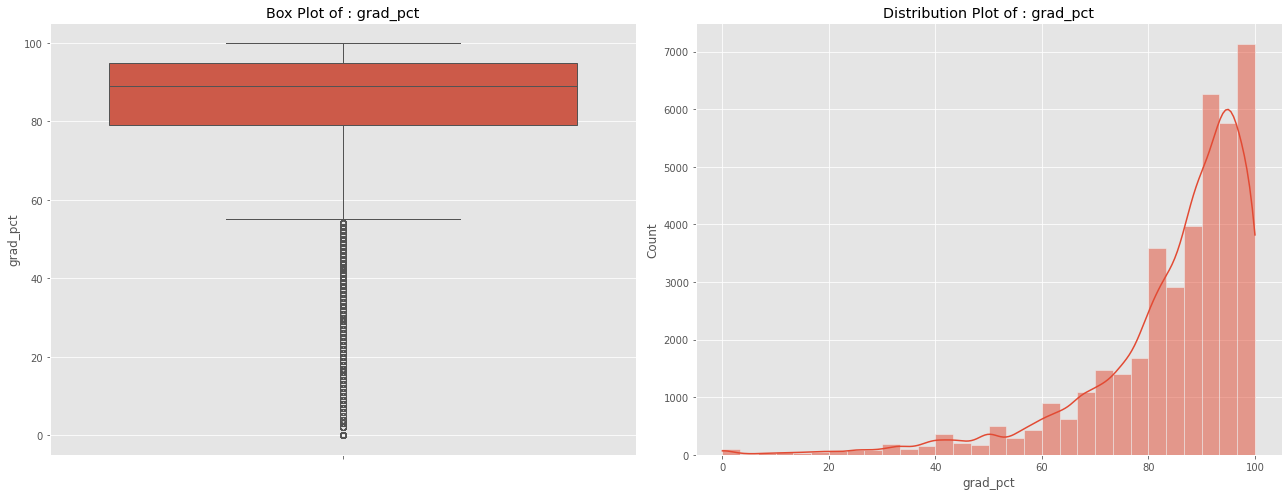

count    39674.000000
mean        84.406614
std         15.679500
min          0.000000
25%         79.000000
50%         89.000000
75%         95.000000
max        100.000000
Name: grad_pct, dtype: float64
Median : 89.0

Total Number of null values : 33478 count, 45.76 %


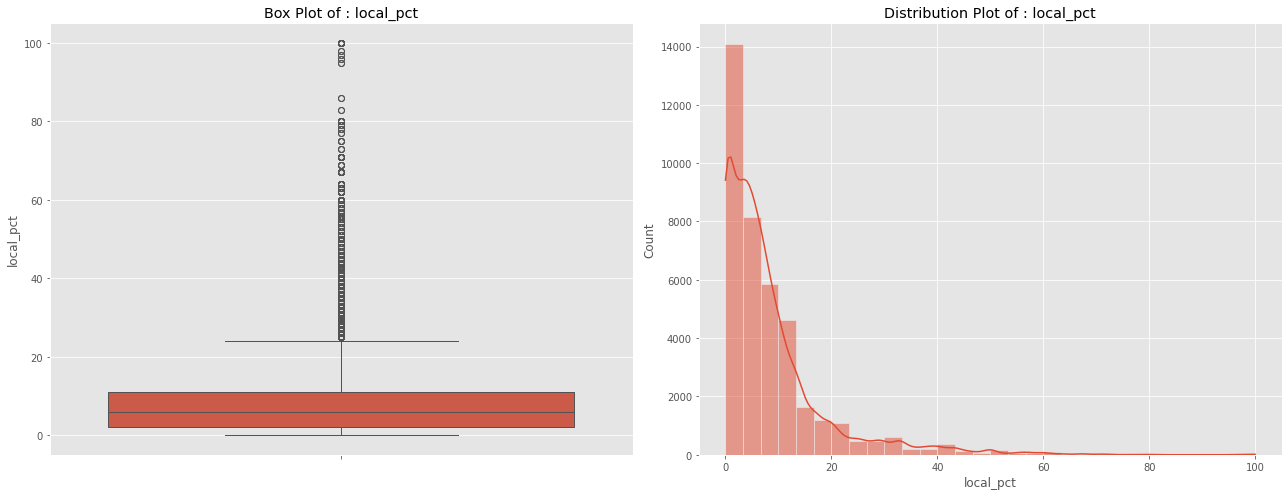

count    39674.000000
mean         8.479936
std         10.398486
min          0.000000
25%          2.000000
50%          6.000000
75%         11.000000
max        100.000000
Name: local_pct, dtype: float64
Median : 6.0

Total Number of null values : 33478 count, 45.76 %


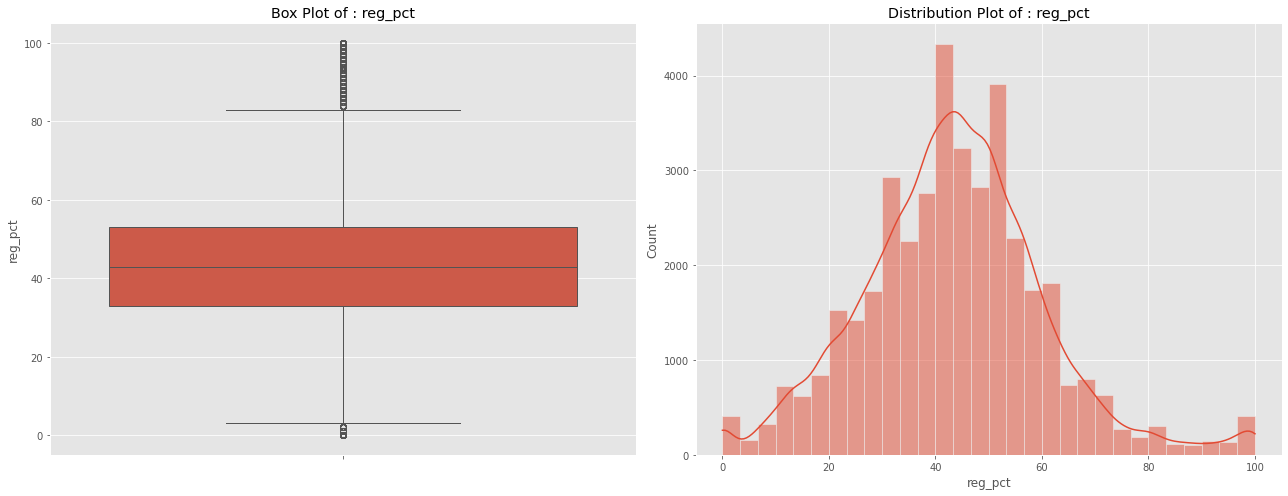

count    39674.000000
mean        43.371125
std         17.124891
min          0.000000
25%         33.000000
50%         43.000000
75%         53.000000
max        100.000000
Name: reg_pct, dtype: float64
Median : 43.0

Total Number of null values : 33478 count, 45.76 %


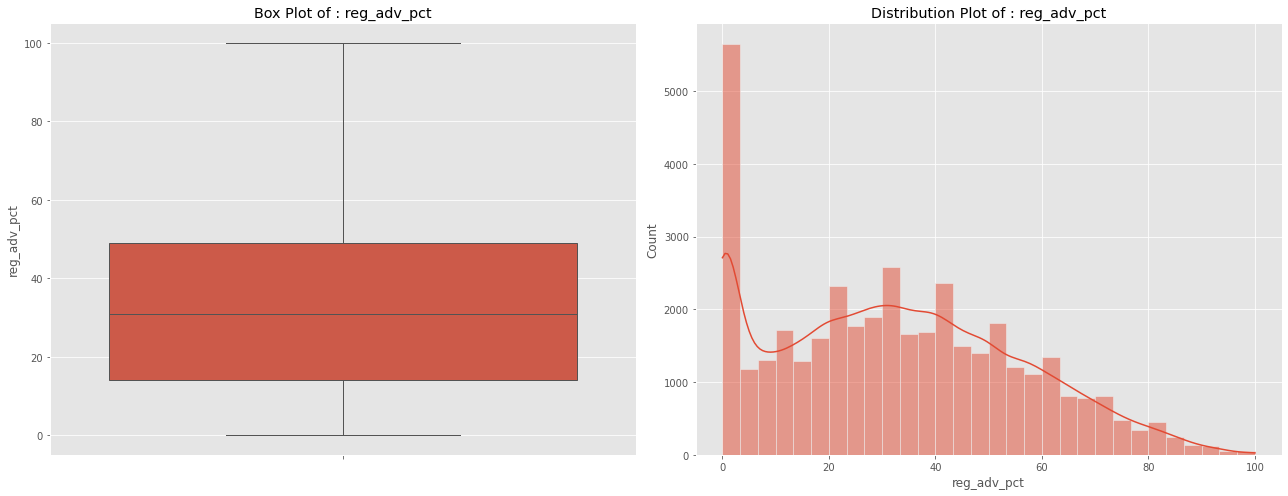

count    39674.000000
mean        32.577204
std         23.001197
min          0.000000
25%         14.000000
50%         31.000000
75%         49.000000
max        100.000000
Name: reg_adv_pct, dtype: float64
Median : 31.0

Total Number of null values : 33478 count, 45.76 %


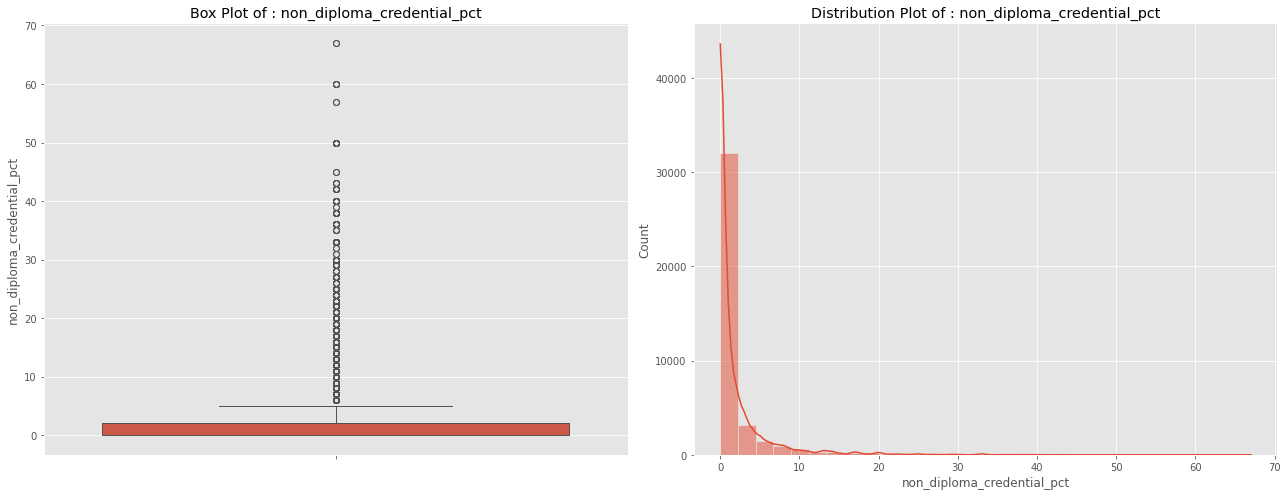

count    39674.000000
mean         1.742627
std          4.063987
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         67.000000
Name: non_diploma_credential_pct, dtype: float64
Median : 0.0

Total Number of null values : 33478 count, 45.76 %


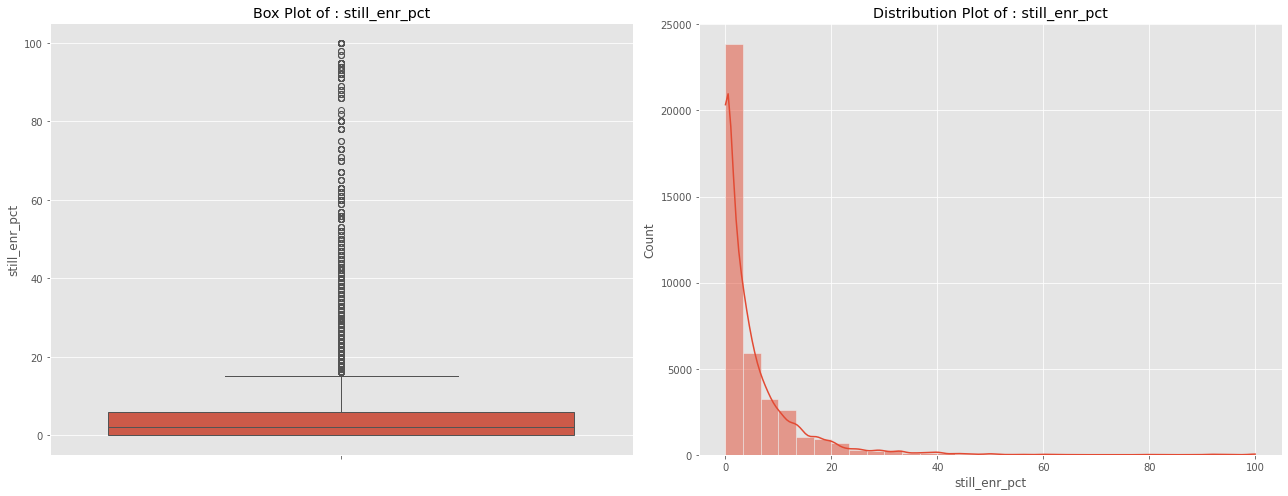

count    39674.000000
mean         5.190704
std          8.832710
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max        100.000000
Name: still_enr_pct, dtype: float64
Median : 2.0

Total Number of null values : 33478 count, 45.76 %


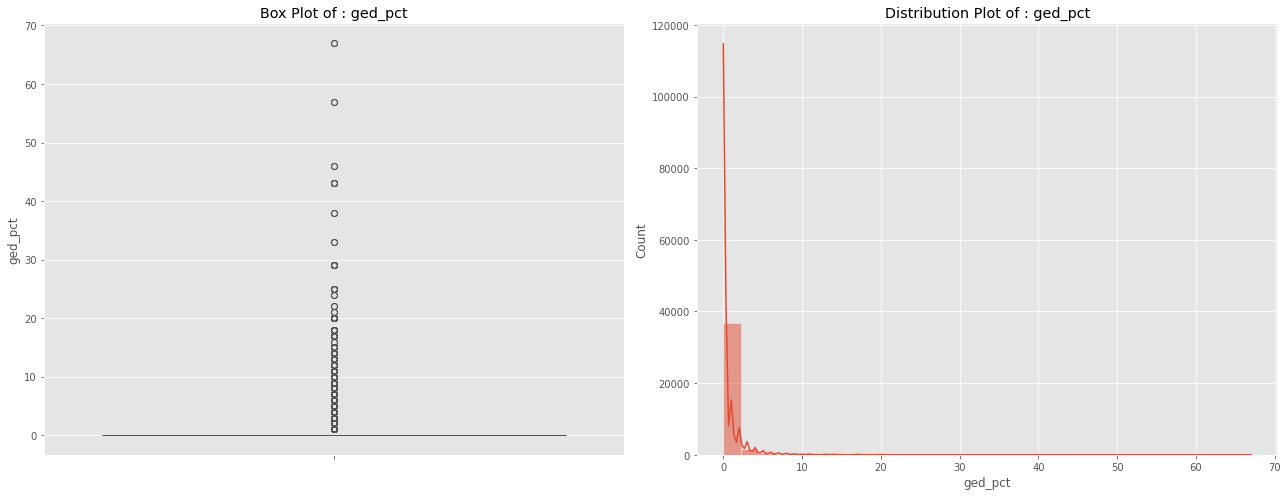

count    39674.000000
mean         0.612693
std          1.985445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         67.000000
Name: ged_pct, dtype: float64
Median : 0.0

Total Number of null values : 33478 count, 45.76 %


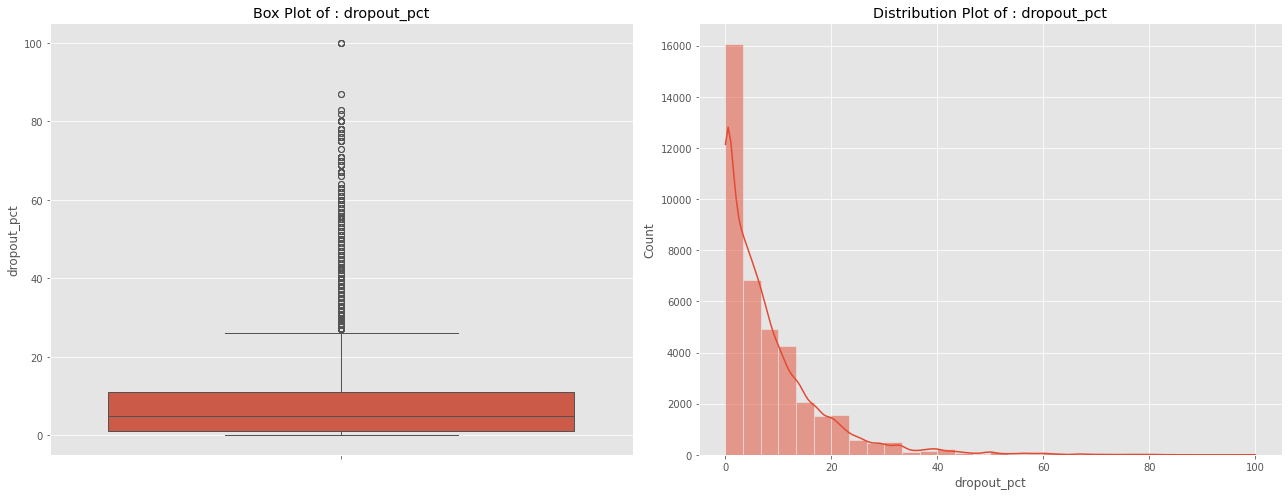

count    39674.000000
mean         7.963049
std          9.658698
min          0.000000
25%          1.000000
50%          5.000000
75%         11.000000
max        100.000000
Name: dropout_pct, dtype: float64
Median : 5.0

Total Number of null values : 33478 count, 45.76 %


In [11]:
# Calling the 'box_dist_plot_pct()' function.

box_dist_plot_pct(df) 

- `grad_pct` - It is right skewed and has null value in total 33478 

- `local_pct` -It is left skewed and has null value in total 33478 

- `reg_pct` - It is symmetric and has null value in total 33478 

- `reg_adv_pct` - It is left skewed and has null value in total 33478 

- `non_diploma_credential_pct` - It is left skewed and has null value in total 33478 

- `still_enr_pct` - It is left skewed and has null value in total 33478 

- `ged_pct` - It is left skewed and has null value in total 33478 

- `dropout_pct` - It is left skewed and has null value in total 33478 

In [12]:
# Create function to plot dist and box plot for all the numeric features with suffix '_cnt' attributes. 



def box_dist_plot_cnt(df):
    
    """
    This function is to plot box plot and distribution plot for each column, 
    column's median value, with count and percentage of null values. 
    
    Parameters:
        data : DataFrame  # DataFrame contains data.
    """
    
    plt.style.use('ggplot')
    
    # Columns with suffix '_cnt' attributes.
    columns = ['enroll_cnt', 'grad_cnt',  'local_cnt', 'reg_cnt', 'reg_adv_cnt',  'non_diploma_credential_cnt', 
               'still_enr_cnt',  'ged_cnt', 'dropout_cnt']

    for column in columns:
        
        # For changing the '-' values to NaN.
        df[column] = pd.to_numeric(df[column], errors='coerce')
        
        plt.figure( figsize = (18, 7) )  # Set the figure size

        # Box plot.
        plt.subplot(121)
        sns.boxplot(y = df[column])  # Create box plot
        plt.title(f'Box Plot of : {column}')

        # Distribution plot (histogram + KDE)
        plt.subplot(122)
        sns.histplot(df[column], bins=30, kde=True)  # Create histogram with KDE
        plt.title(f'Distribution Plot of : {column}')
        
        # Adjusting the layout.
        plt.tight_layout()
        
        plt.show()

        # Print statistics
        print(df[column].describe())
        print('Median :', df[column].median())
        print()
        print('Total Number of null values :', df[column].isnull().sum(), 'count,',
              round(df[column].isnull().mean() * 100, 2), '%')
        
        print("="*50)  # Separator for clarity


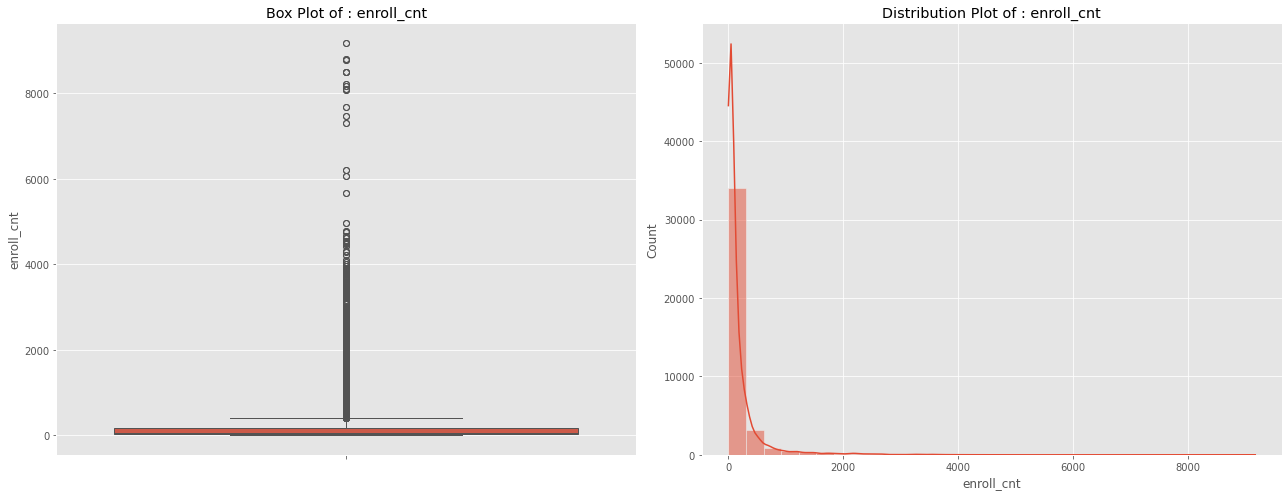

count    39674.000000
mean       192.120079
std        439.972474
min          5.000000
25%         25.000000
50%         66.000000
75%        179.000000
max       9176.000000
Name: enroll_cnt, dtype: float64
Median : 66.0

Total Number of null values : 33478 count, 45.76 %


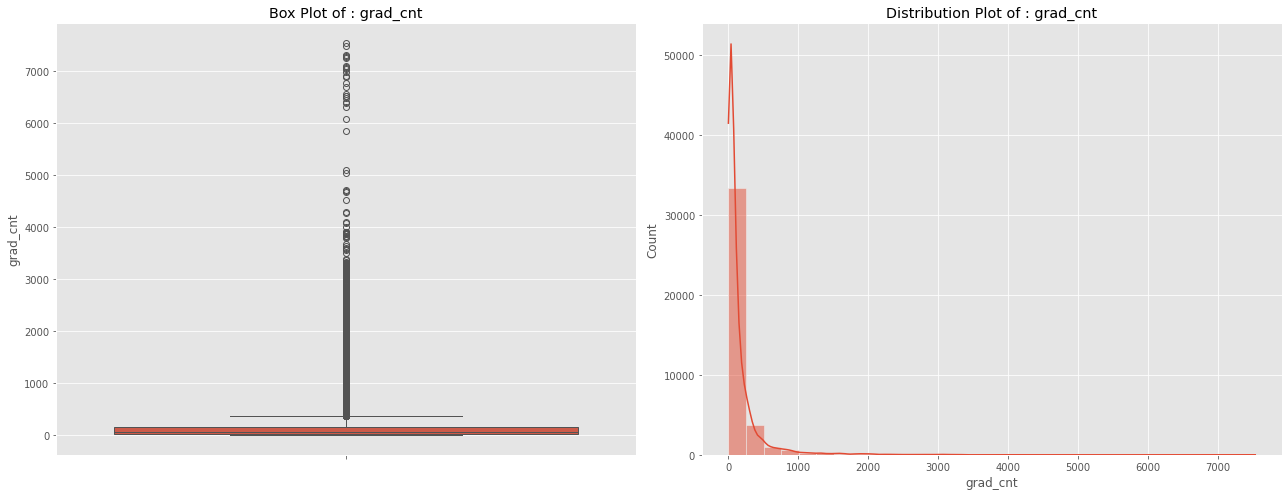

count    39674.000000
mean       161.178354
std        361.294773
min          0.000000
25%         20.000000
50%         57.000000
75%        156.000000
max       7540.000000
Name: grad_cnt, dtype: float64
Median : 57.0

Total Number of null values : 33478 count, 45.76 %


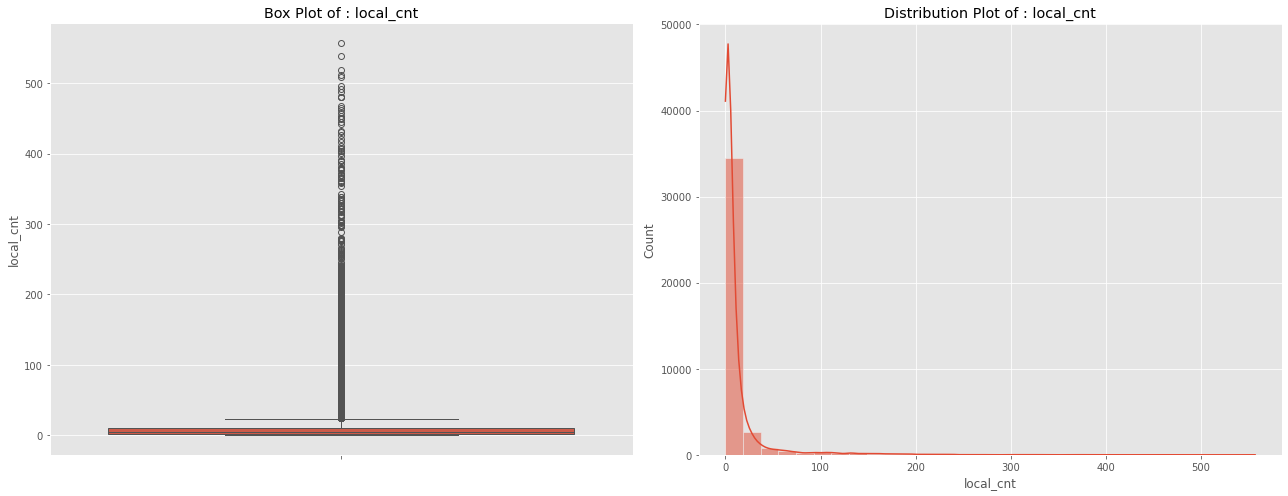

count    39674.000000
mean        12.340903
std         32.046302
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        557.000000
Name: local_cnt, dtype: float64
Median : 4.0

Total Number of null values : 33478 count, 45.76 %


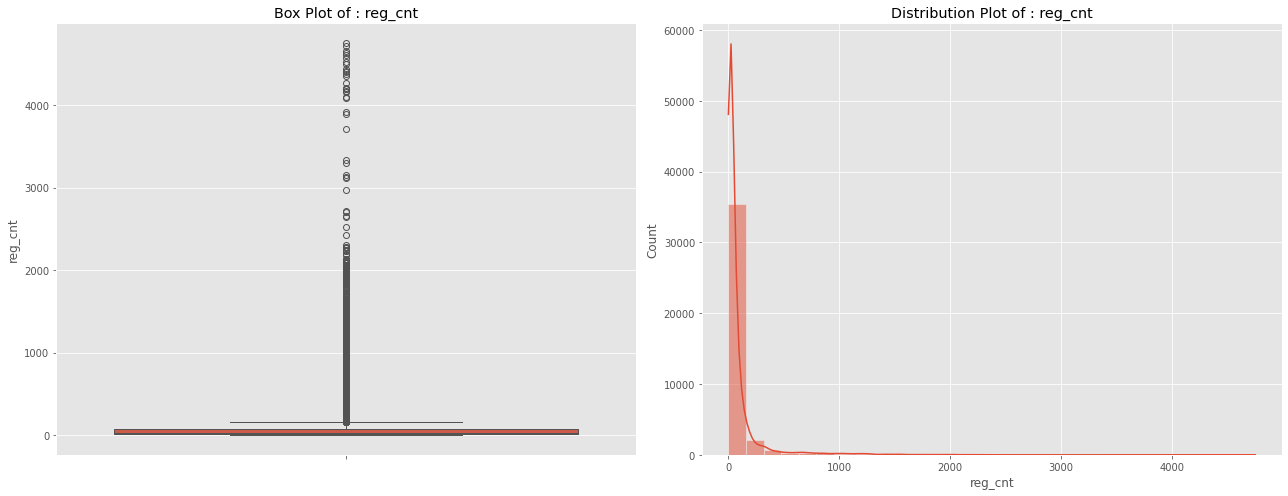

count    39674.000000
mean        86.804708
std        225.795826
min          0.000000
25%         10.000000
50%         27.000000
75%         69.000000
max       4752.000000
Name: reg_cnt, dtype: float64
Median : 27.0

Total Number of null values : 33478 count, 45.76 %


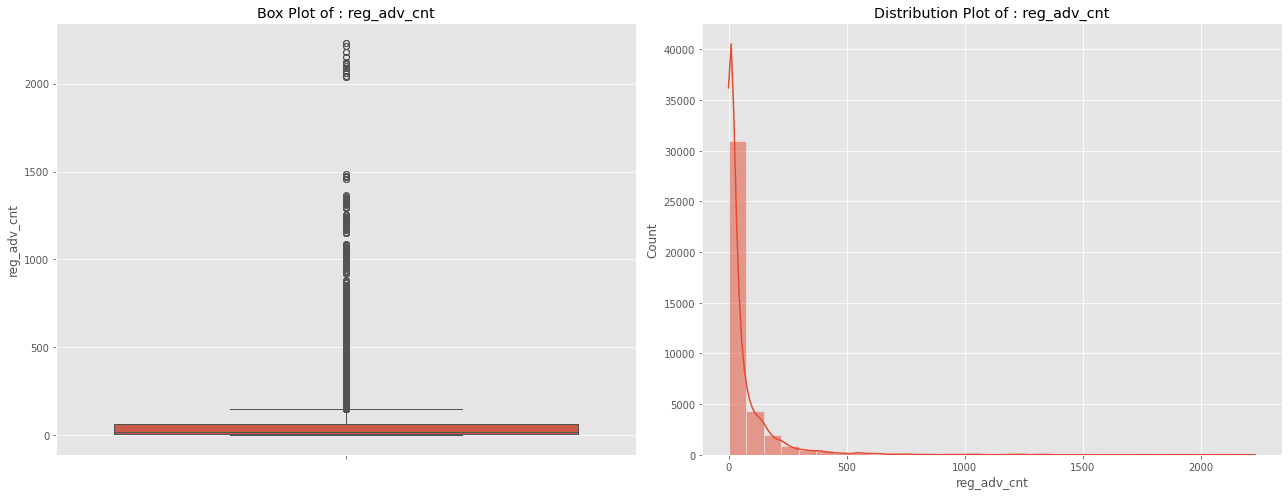

count    39674.000000
mean        62.032742
std        132.777866
min          0.000000
25%          4.000000
50%         18.000000
75%         62.000000
max       2231.000000
Name: reg_adv_cnt, dtype: float64
Median : 18.0

Total Number of null values : 33478 count, 45.76 %


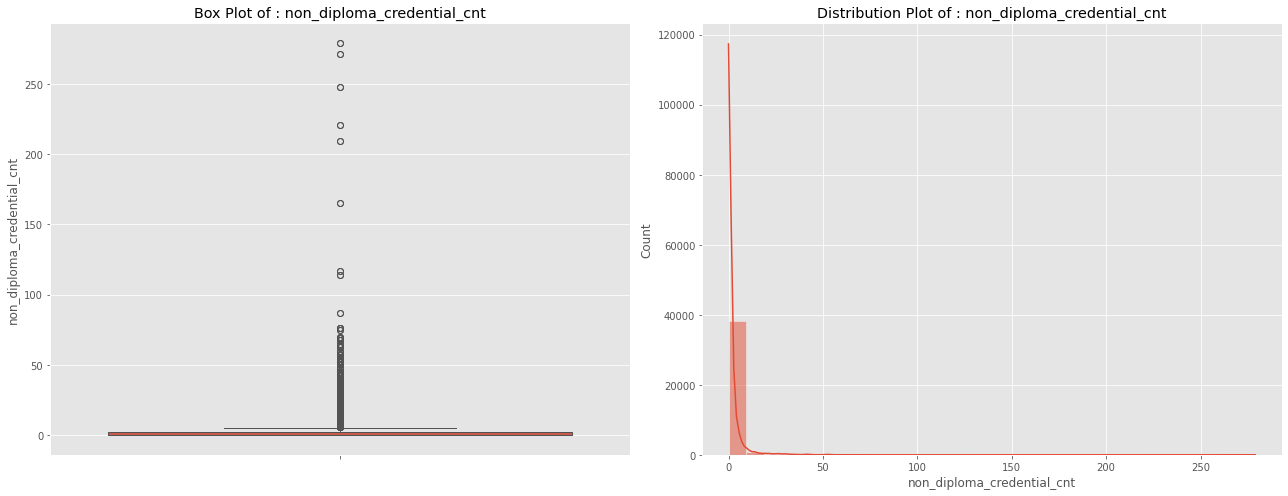

count    39674.000000
mean         1.924485
std          6.498913
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        279.000000
Name: non_diploma_credential_cnt, dtype: float64
Median : 0.0

Total Number of null values : 33478 count, 45.76 %


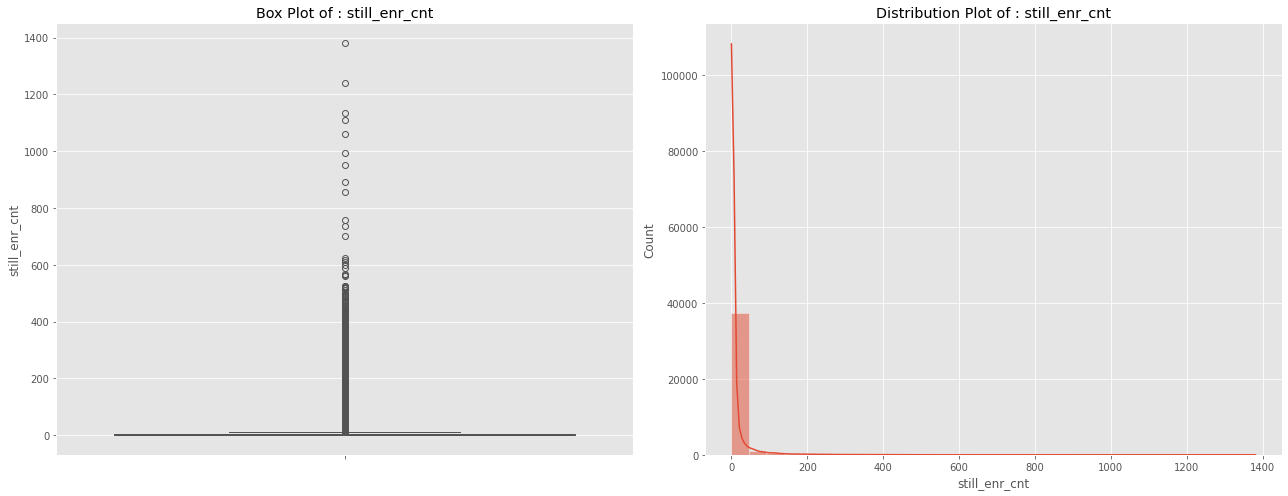

count    39674.000000
mean        11.299516
std         40.766672
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1381.000000
Name: still_enr_cnt, dtype: float64
Median : 2.0

Total Number of null values : 33478 count, 45.76 %


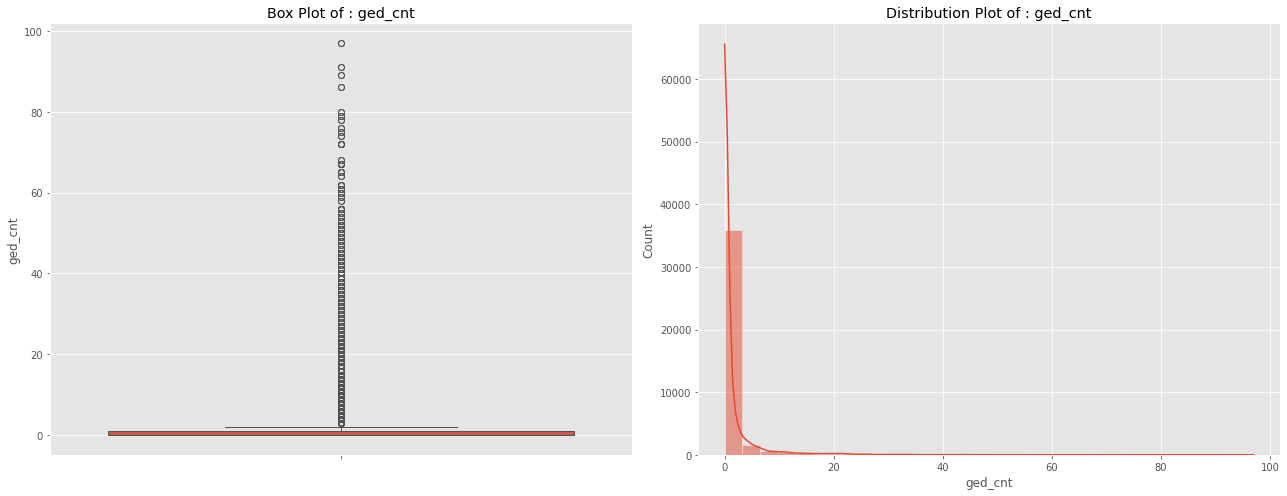

count    39674.000000
mean         1.377577
std          4.949389
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         97.000000
Name: ged_cnt, dtype: float64
Median : 0.0

Total Number of null values : 33478 count, 45.76 %


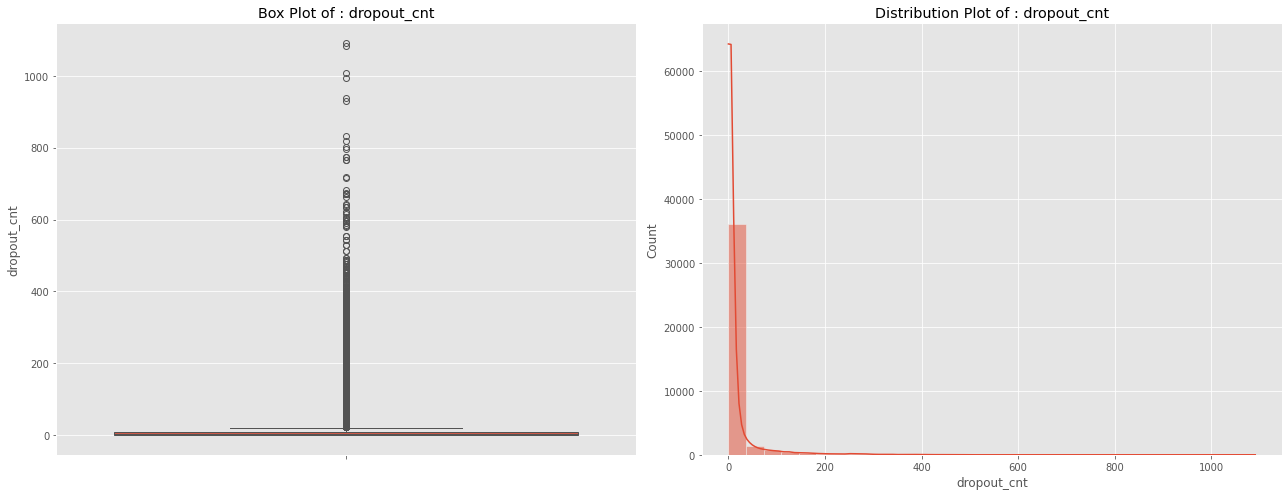

count    39674.000000
mean        16.239225
std         50.129834
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1091.000000
Name: dropout_cnt, dtype: float64
Median : 3.0

Total Number of null values : 33478 count, 45.76 %


In [13]:
# Calling the 'box_dist_plot_cnt()' function.

box_dist_plot_cnt(df)

- `enroll_cnt` - It is left skewed and has null value in total 33478

- `grad_cnt` - It is left skewed and has null value in total 33478

- `local_cnt` - It is left skewed and has null value in total 33478

- `reg_cnt` - It is left skewed and has null value in total 33478

- `reg_adv_cnt` - It is left skewed and has null value in total 33478

- `non_diploma_credential_cnt` - It is left skewed and has null value in total 33478

- `still_enr_cnt` -It is left skewed and has null value in total 33478

- `ged_cnt` - It is left skewed and has null value in total 33478

- `dropout_cnt` - It is left skewed and has null value in total 33478

In [14]:
# Re-checking the missing values, after imputing the NaN values.

columns = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 
           'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct', 
           'non_diploma_credential_cnt', 'non_diploma_credential_pct','still_enr_cnt', 
           'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct']

df[columns].isnull().sum()

enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                   33478
dropout_pct                   33478
dtype: int64

- As there are same number of missing valuess in each columns, we will use missingno library and see if there is a pattern to the missing data.

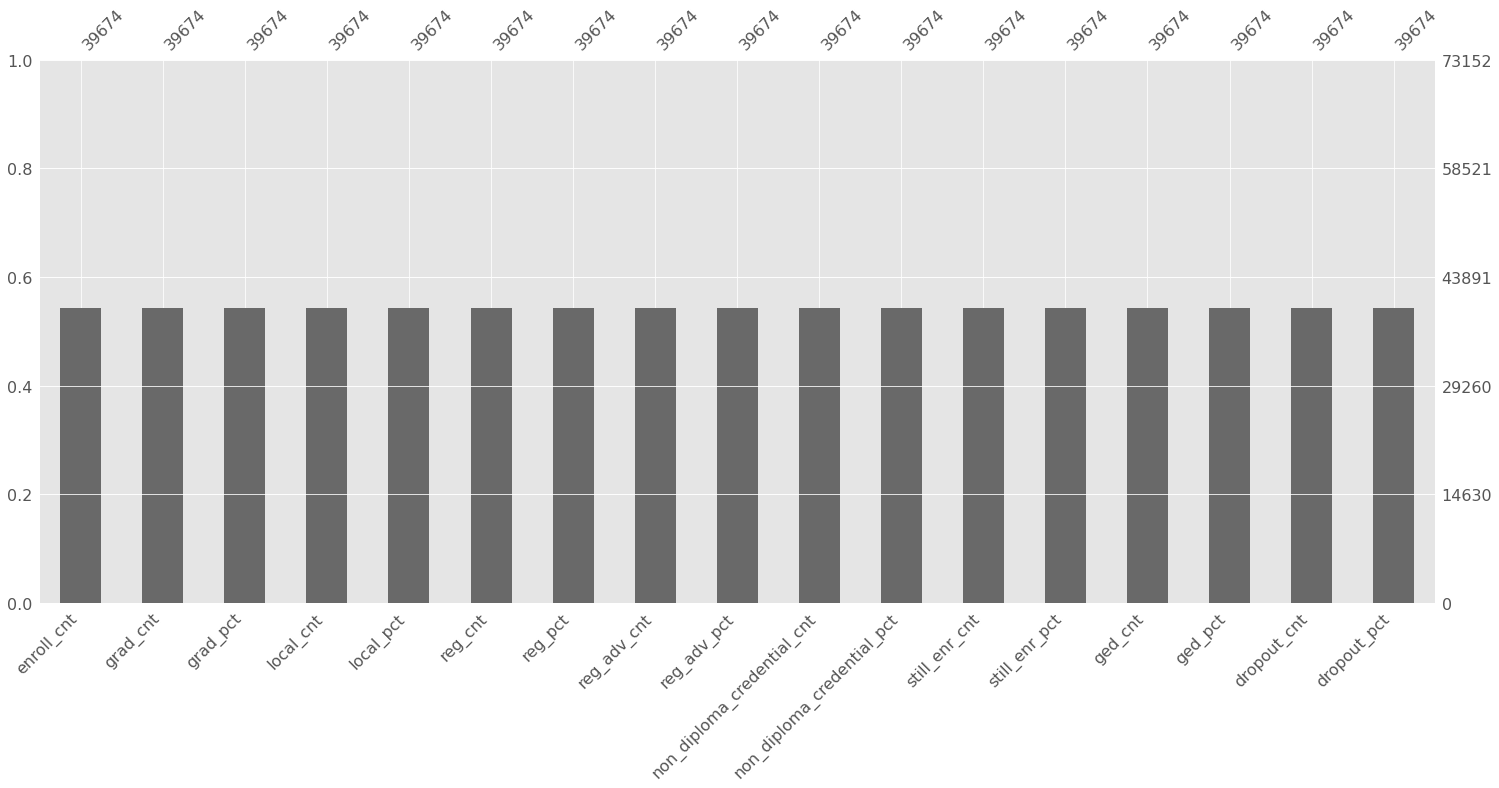

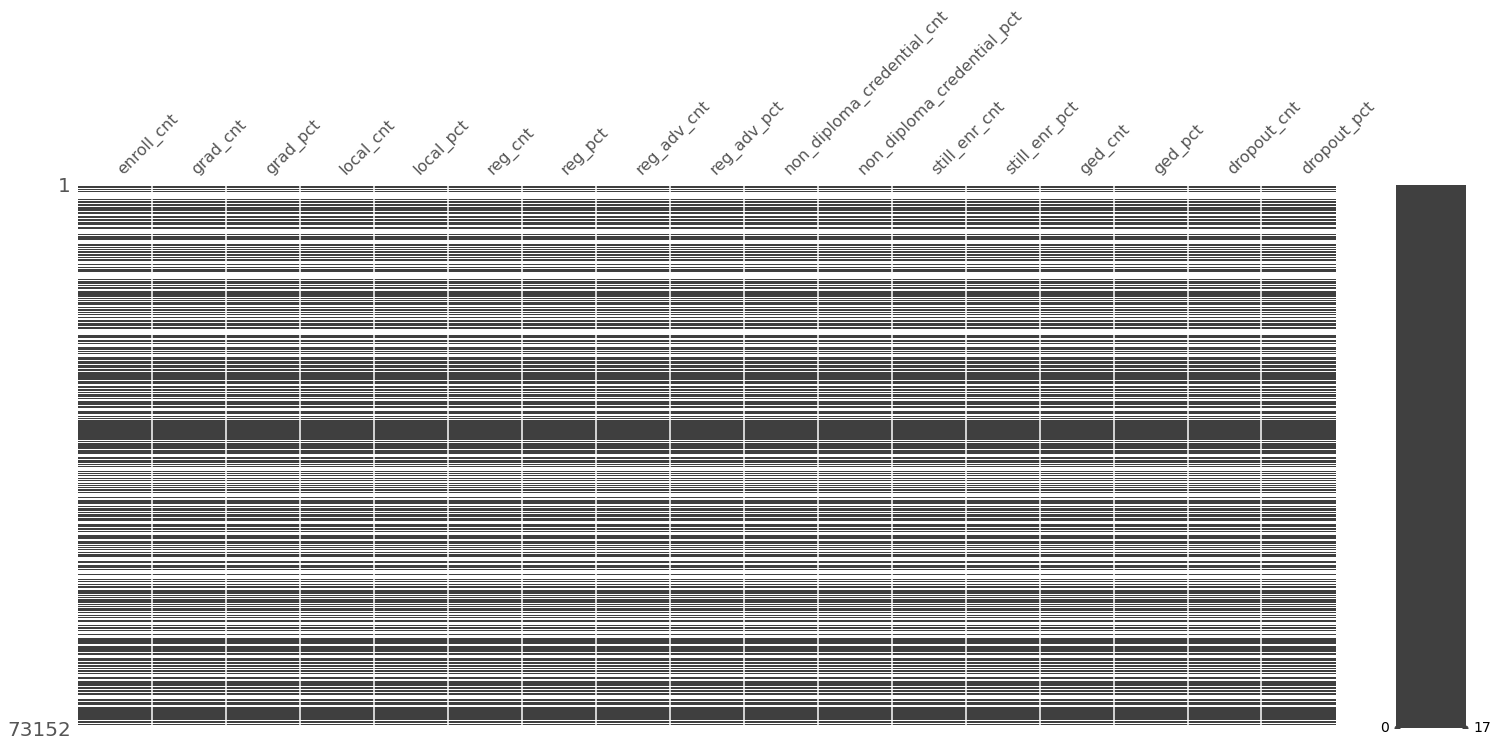

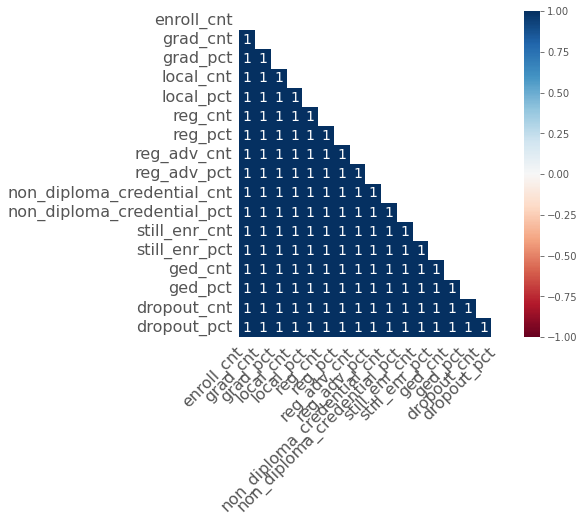

In [15]:
# Using missingnos matrix, we can check if there is any pattern to the missing data of all the numeric attributes.

# Visualize the amount of missing data using missingno's bar chart.
msno.bar(df[columns]);

# To see if there is a pattern to the missing data.
a = msno.matrix(df[columns])
a.get_figure();

# Plot a heat map of the missing data to see if the locations where the data are missing are correlated.
# Code as referenced in O'Reilley's Machine Learning Pocket Reference.

a = msno.heatmap(df[columns], figsize = (6,6))
a.get_figure();                                    # Add a ; at the end to prevent it from displaying twice.

- As per the above bar plot, patterns & heatmap -  we can clearly observe that all numeric columns have similar pattern of missing values.

- As per the heatmap, all the numeric columns have null values at the same index, due to very stong positive co-relation among all. 

- [Code : As per the reference provided.](https://yu.instructure.com/courses/68594/files/3996938?wrap=1)

----

<b> [Back to Content](#Content) </b>

### 3.2.2 For Categorical Features

- In these features, there are some features whose data types need to be changed to object instead of 'int' for better analysis.

In [16]:
df.nrc_code

0        3
1        3
2        3
3        3
4        3
        ..
73147    4
73148    4
73149    4
73150    4
73151    4
Name: nrc_code, Length: 73152, dtype: int64

In [17]:
# selecting the needed columns to change 
columns_to_convert = ['aggregation_index', 'nrc_code', 'county_code', 'nyc_ind', 'subgroup_code']

#Fixing the data type
df[columns_to_convert] = df[columns_to_convert].astype(object)

# Display the data types to verify the conversion
df.dtypes


report_school_year             object
aggregation_index              object
aggregation_type               object
aggregation_name               object
nrc_code                       object
nrc_desc                       object
county_code                    object
county_name                    object
nyc_ind                        object
membership_desc                object
subgroup_code                  object
subgroup_name                  object
enroll_cnt                    float64
grad_cnt                      float64
grad_pct                      float64
local_cnt                     float64
local_pct                     float64
reg_cnt                       float64
reg_pct                       float64
reg_adv_cnt                   float64
reg_adv_pct                   float64
non_diploma_credential_cnt    float64
non_diploma_credential_pct    float64
still_enr_cnt                 float64
still_enr_pct                 float64
ged_cnt                       float64
ged_pct     

Now the categorical column's data type has been changed.

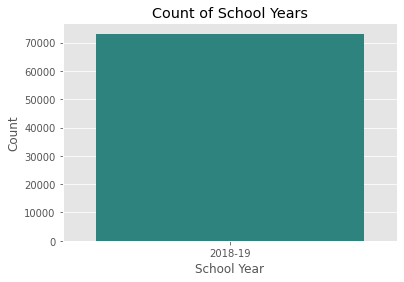

count       73152
unique          1
top       2018-19
freq        73152
Name: report_school_year, dtype: object

In [18]:
# plotting a count plot 
sns.countplot(data=df, x='report_school_year', palette="viridis")

plt.xlabel('School Year')  # Label for the x-axis
plt.ylabel('Count')         # Label for the y-axis
plt.title('Count of School Years')  # Title of the plot

# Show the plot
plt.show()

# summary  statistics
display(df['report_school_year'].describe())


- As the introduction of the DataFrame indicates, this feature contains only data entries from the year 2018-19.


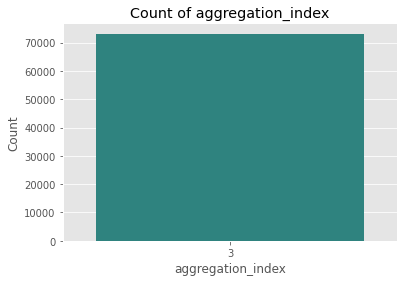

count     73152
unique        1
top           3
freq      73152
Name: aggregation_index, dtype: int64

In [19]:
# plotting a count plot 
sns.countplot(data=df, x='aggregation_index', palette="viridis")

plt.xlabel('aggregation_index')  
plt.ylabel('Count')        
plt.title('Count of aggregation_index')  

# Show the plot
plt.show()

# summary  statistics
display(df['aggregation_index'].describe())


It is clear from the above plot that it only has one value that is '3'

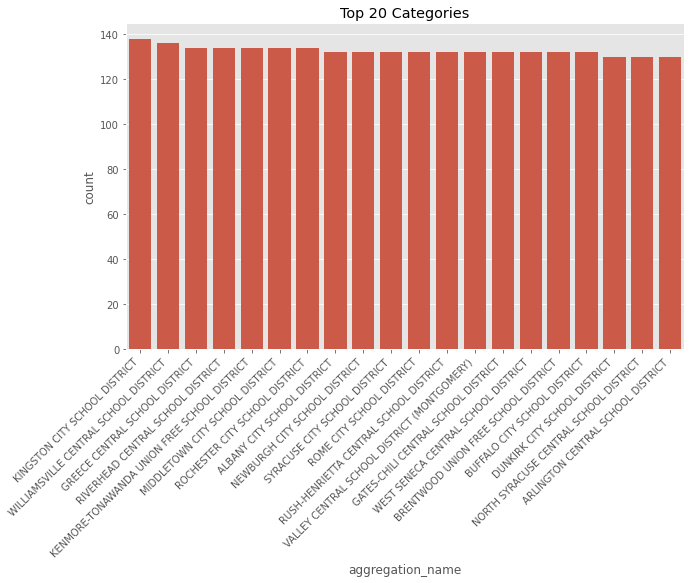

count                             73152
unique                              680
top       KINGSTON CITY SCHOOL DISTRICT
freq                                138
Name: aggregation_name, dtype: object

In [20]:

# Getting  the top 20 values and their counts
top_20 = df['aggregation_name'].value_counts().nlargest(20)

# plotting  the count plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(data=df, x='aggregation_name', order=top_20.index)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Categories')
plt.show()

# summary  statistics
display(df['aggregation_name'].describe())

As the summary statistics indicate, there are 680 unique values, but for a better view, we have taken only the top 20 values. In this case, Kingston City School has the highest count.

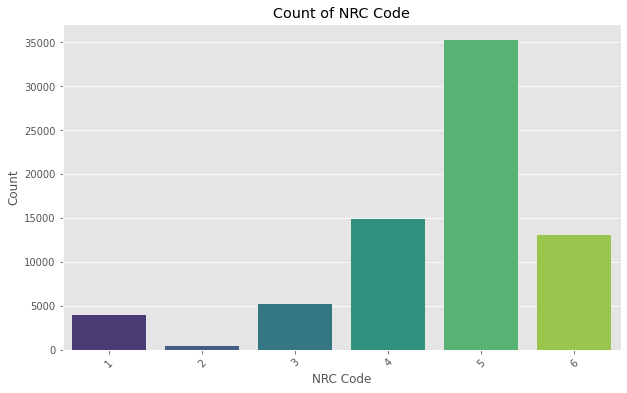

count     73152
unique        6
top           5
freq      35322
Name: nrc_code, dtype: int64

In [21]:
# Plotting a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='nrc_code', palette="viridis")

plt.xlabel('NRC Code')  
plt.ylabel('Count')      
plt.title('Count of NRC Code')  

# Display the plot
plt.xticks(rotation=45)  
plt.show()

# Summary statistics for nrc_code
display(df['nrc_code'].describe())


This is an indicator for the type of school district, which shows that indicator 5 has the highest count, followed by 4 and 6 in the second and third positions.

count             73152
unique                6
top       Average Needs
freq              35322
Name: nrc_desc, dtype: object

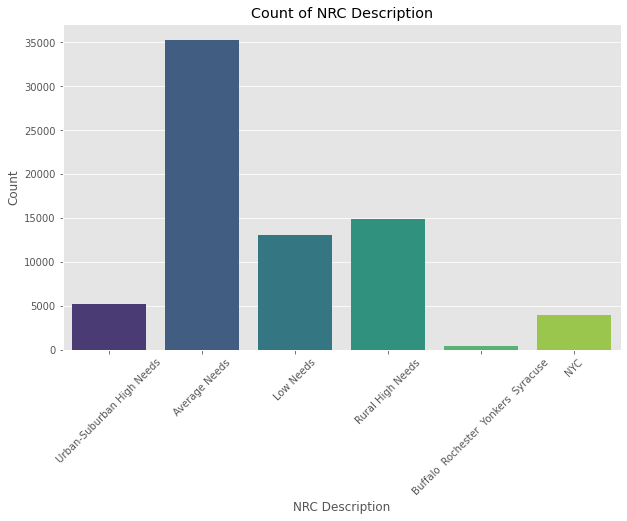

In [22]:
# Count plot for nrc_desc
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='nrc_desc', palette="viridis")

plt.xlabel('NRC Description')  
plt.ylabel('Count')             
plt.title('Count of NRC Description') 

# Display the plot 
plt.xticks(rotation=45)  

# Summary statistics for nrc_desc
display(df['nrc_desc'].describe())


We can observe that 'Average Needs' has the highest count, followed by 'Rural High Needs' with the second highest count, and 'Low Needs' in third place

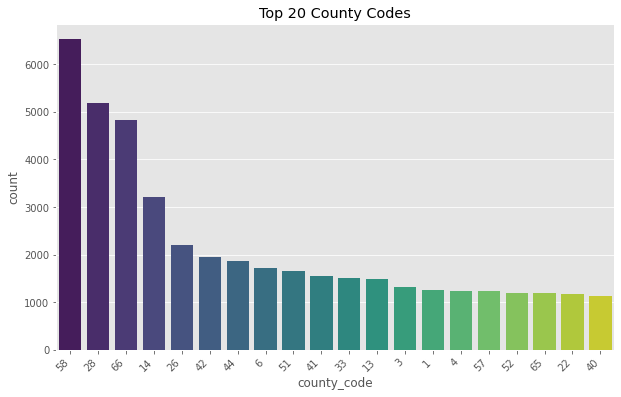

count     73152
unique       62
top          58
freq       6526
Name: county_code, dtype: int64

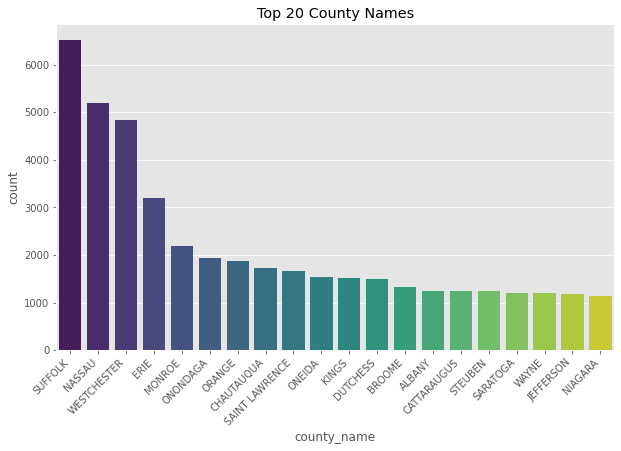

count       73152
unique         62
top       SUFFOLK
freq         6526
Name: county_name, dtype: object

In [23]:

# Top 20 for county_code
top_20_county_code = df['county_code'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='county_code', order=top_20_county_code.index, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 County Codes')

# Display plot 
plt.show()

# Summary statistics for county_code
display(df['county_code'].describe())

# Top 20 for county_name
top_20_county_name = df['county_name'].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))  


sns.countplot(data=df, x='county_name', order=top_20_county_name.index, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 County Names')

# Display plot
plt.show()

# Summary statistics for county_name
display(df['county_name'].describe())


We have plotted only the top 20 values from both county_code and county_name. In the county_code, the top 3 highest counts consist of '58', '28', and '66'.  Looking at th county_name,Suffolk county has the highest count folowed by Nassau and Westchester in 2nd and 3rd position.

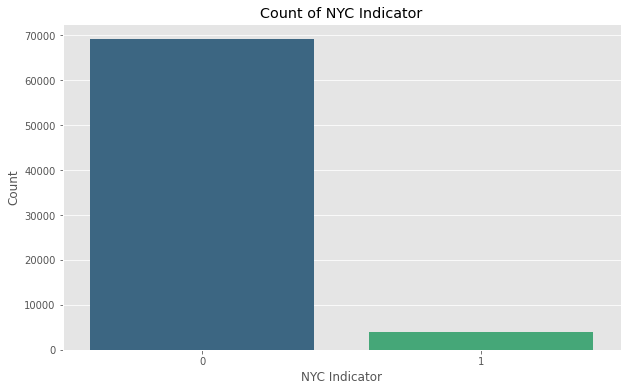

count     73152
unique        2
top           0
freq      69110
Name: nyc_ind, dtype: int64

In [24]:
# Count plot for nyc_ind

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='nyc_ind', palette="viridis")


plt.xlabel('NYC Indicator')  
plt.ylabel('Count')          
plt.title('Count of NYC Indicator') 

# Display the plot
plt.show()

# Summary statistics for nyc_ind
display(df['nyc_ind'].describe())



This shows that the number of zeros is higher compared to ones, which indicates that the majority of the school district resides outside the borders of NYC.

## have to chk this column

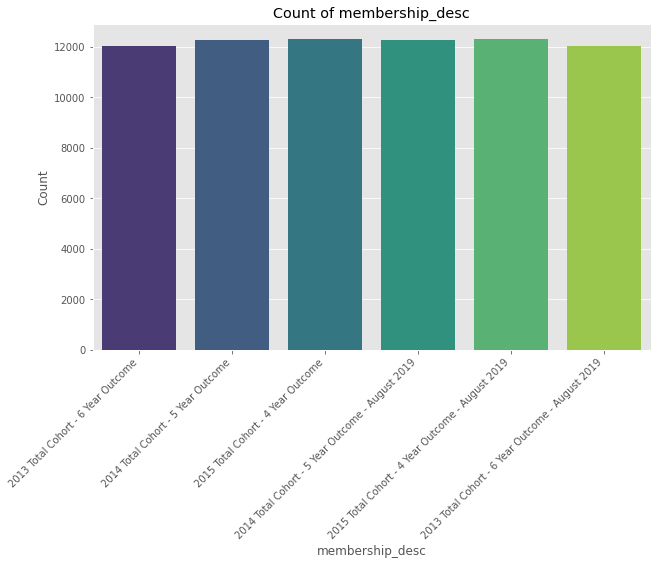

count                                  73152
unique                                     6
top       2015 Total Cohort - 4 Year Outcome
freq                                   12299
Name: membership_desc, dtype: object

In [25]:
# Count plot for membership_desc

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='membership_desc', palette="viridis")


plt.xlabel('membership_desc')  
plt.ylabel('Count')     
plt.xticks(rotation=45,ha='right')
plt.title('Count of membership_desc') 

# Display the plot
plt.show()

# Summary statistics for membership_desc
display(df['membership_desc'].describe())



explantion needed 

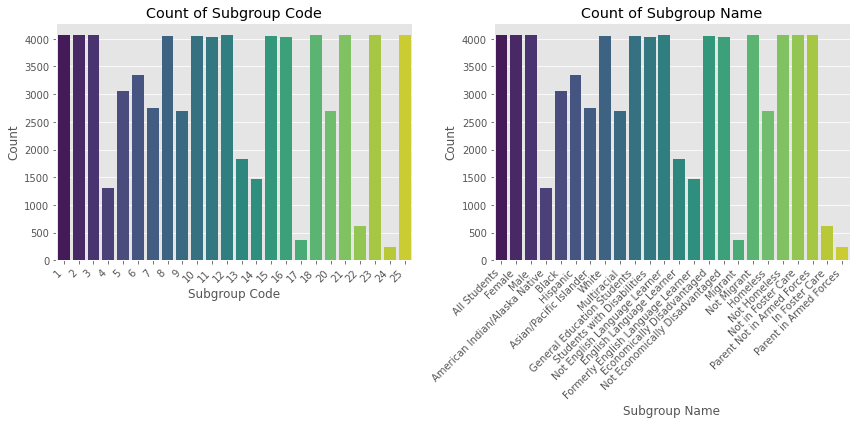

count     73152
unique       24
top           1
freq       4074
Name: subgroup_code, dtype: int64

count            73152
unique              24
top       All Students
freq              4074
Name: subgroup_name, dtype: object

In [26]:

plt.figure(figsize=(12, 6))

# Count plot for subgroup_code
plt.subplot(1, 2, 1)  
sns.countplot(data=df, x='subgroup_code', palette="viridis")
plt.xlabel('Subgroup Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Subgroup Code')

# Count plot for subgroup_name
plt.subplot(1, 2, 2)  
sns.countplot(data=df, x='subgroup_name', palette="viridis")
plt.xlabel('Subgroup Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Subgroup Name')


# Display the plot
plt.tight_layout()
plt.show()

# Summary statistics for subgroup_code and subgroup_name
display(df['subgroup_code'].describe())
display(df['subgroup_name'].describe())


----

<b> [Back to Content](#Content) </b>

### 3.3 Bivariate Analysis

In [27]:
# Code to select only numerical columns from dataset.

numerical_data = df.select_dtypes(include=['number'])

numerical_data

enroll_cnt  grad_cnt  grad_pct  local_cnt  local_pct  reg_cnt  reg_pct  \
0           658.0     464.0      71.0       63.0       10.0    310.0     47.0   
1           324.0     246.0      76.0       30.0        9.0    169.0     52.0   
2           334.0     218.0      65.0       33.0       10.0    141.0     42.0   
3             NaN       NaN       NaN        NaN        NaN      NaN      NaN   
4           367.0     248.0      68.0       42.0       11.0    183.0     50.0   
...           ...       ...       ...        ...        ...      ...      ...   
73147         NaN       NaN       NaN        NaN        NaN      NaN      NaN   
73148         NaN       NaN       NaN        NaN        NaN      NaN      NaN   
73149         NaN       NaN       NaN        NaN        NaN      NaN      NaN   
73150         NaN       NaN       NaN        NaN        NaN      NaN      NaN   
73151         NaN       NaN       NaN        NaN        NaN      NaN      NaN   

       reg_adv_cnt  reg_adv_pct  non_diploma_credential_cnt  \
0             91.0         14.0                        16.0   
1             47.0         15.0                         2.0   
2             44.0         13.0                        14.0   
3              NaN          NaN                         NaN   
4             23.0          6.0                        10.0   
...            ...          ...                         ...   
73147          NaN          NaN                         NaN   
73148          NaN          NaN                         NaN   
73149          NaN          NaN                         NaN   
73150          NaN          NaN                         NaN   
73151          NaN          NaN                         NaN   

       non_diploma_credential_pct  still_enr_cnt  still_enr_pct  ged_cnt  \
0                             2.0           30.0            5.0      0.0   
1                             1.0           11.0            3.0      0.0   
2                             4.0           19.0            6.0      0.0   
3                             NaN            NaN            NaN      NaN   
4                             3.0           18.0            5.0      0.0   
...                           ...            ...            ...      ...   
73147                         NaN            NaN            NaN      NaN   
73148                         NaN            NaN            NaN      NaN   
73149                         NaN            NaN            NaN      NaN   
73150                         NaN            NaN            NaN      NaN   
73151                         NaN            NaN            NaN      NaN   

       ged_pct  dropout_cnt  dropout_pct  
0          0.0        148.0         22.0  
1          0.0         65.0         20.0  
2          0.0         83.0         25.0  
3          NaN          NaN          NaN  
4          0.0         91.0         25.0  
...        ...          ...          ...  
73147      NaN          NaN          NaN  
73148      NaN          NaN          NaN  
73149      NaN          NaN          NaN  
73150      NaN          NaN          NaN  
73151      NaN          NaN          NaN  

[73152 rows x 17 columns]

- 

In [28]:
#Code to find correlation between columns.

numerical_data.corr()

enroll_cnt  grad_cnt  grad_pct  local_cnt  \
enroll_cnt                    1.000000  0.993603 -0.014102   0.831018   
grad_cnt                      0.993603  1.000000  0.034515   0.790687   
grad_pct                     -0.014102  0.034515  1.000000  -0.145174   
local_cnt                     0.831018  0.790687 -0.145174   1.000000   
local_pct                    -0.086368 -0.106001 -0.295822   0.113220   
reg_cnt                       0.979747  0.971027 -0.021607   0.817128   
reg_pct                       0.046173  0.041879  0.269922   0.048551   
reg_adv_cnt                   0.836960  0.878928  0.165698   0.520575   
reg_adv_pct                  -0.005524  0.039675  0.614538  -0.186843   
non_diploma_credential_cnt    0.511030  0.478744 -0.149882   0.587427   
non_diploma_credential_pct   -0.082267 -0.093745 -0.375972  -0.009024   
still_enr_cnt                 0.762840  0.708722 -0.184191   0.701385   
still_enr_pct                 0.034031 -0.000300 -0.699738   0.103389   
ged_cnt                       0.814510  0.783183 -0.121469   0.767464   
ged_pct                       0.023151  0.011166 -0.236343   0.048194   
dropout_cnt                   0.846691  0.795895 -0.190834   0.871071   
dropout_pct                   0.021982 -0.018238 -0.770431   0.135475   

                            local_pct   reg_cnt   reg_pct  reg_adv_cnt  \
enroll_cnt                  -0.086368  0.979747  0.046173     0.836960   
grad_cnt                    -0.106001  0.971027  0.041879     0.878928   
grad_pct                    -0.295822 -0.021607  0.269922     0.165698   
local_cnt                    0.113220  0.817128  0.048551     0.520575   
local_pct                    1.000000 -0.074224 -0.194961    -0.189537   
reg_cnt                     -0.074224  1.000000  0.139598     0.744442   
reg_pct                     -0.194961  0.139598  1.000000    -0.135157   
reg_adv_cnt                 -0.189537  0.744442 -0.135157     1.000000   
reg_adv_pct                 -0.508401 -0.085632 -0.471707     0.298675   
non_diploma_credential_cnt   0.062131  0.515351  0.021683     0.284526   
non_diploma_credential_pct   0.307814 -0.073567 -0.134031    -0.127803   
still_enr_cnt               -0.005837  0.737750  0.029897     0.504600   
still_enr_pct                0.150099  0.030103 -0.222952    -0.076961   
ged_cnt                     -0.020043  0.820034  0.063255     0.551338   
ged_pct                      0.040565  0.027253 -0.048471    -0.027592   
dropout_cnt                  0.004871  0.851021  0.070032     0.508226   
dropout_pct                  0.203903  0.033453 -0.166014    -0.139211   

                            reg_adv_pct  non_diploma_credential_cnt  \
enroll_cnt                    -0.005524                    0.511030   
grad_cnt                       0.039675                    0.478744   
grad_pct                       0.614538                   -0.149882   
local_cnt                     -0.186843                    0.587427   
local_pct                     -0.508401                    0.062131   
reg_cnt                       -0.085632                    0.515351   
reg_pct                       -0.471707                    0.021683   
reg_adv_cnt                    0.298675                    0.284526   
reg_adv_pct                    1.000000                   -0.146877   
non_diploma_credential_cnt    -0.146877                    1.000000   
non_diploma_credential_pct    -0.295620                    0.163185   
still_enr_cnt                 -0.145425                    0.333619   
still_enr_pct                 -0.379070                    0.040200   
ged_cnt                       -0.121083                    0.474265   
ged_pct                       -0.143278                    0.045228   
dropout_cnt                   -0.184940                    0.584549   
dropout_pct                   -0.493922                    0.129604   

                            non_diploma_credential_pct  still_enr_cnt  \
enroll_cnt                  

- 

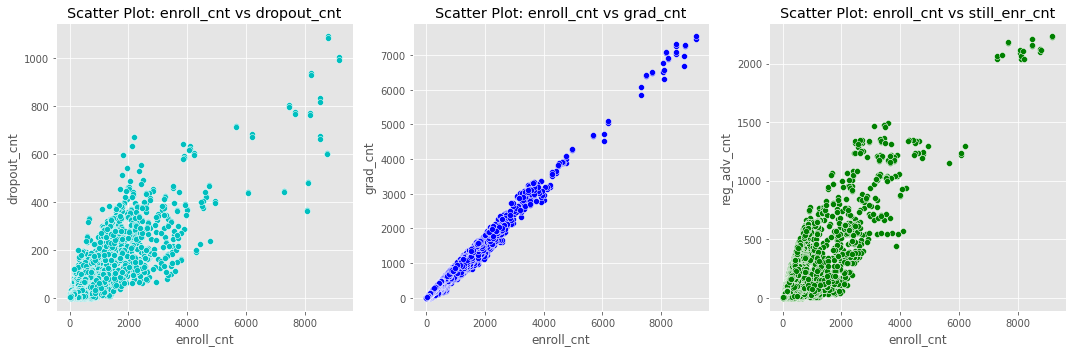

In [29]:
# Plotting scatter plot to find the insight depends on n_unique_tokens and n_non_stop_words Column.

# Create a figure with 1 row and 3 columns for horizontal placement
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# First subplot
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=numerical_data, color='c', ax=axes[0])
axes[0].set_title('Scatter Plot: enroll_cnt vs dropout_cnt')

# Second subplot 
sns.scatterplot(x='enroll_cnt', y='grad_cnt', data=numerical_data, color='b', ax=axes[1])
axes[1].set_title('Scatter Plot: enroll_cnt vs grad_cnt')

# Third subplot 
sns.scatterplot(x='enroll_cnt', y='reg_adv_cnt', data=numerical_data, color='g', ax=axes[2])
axes[2].set_title('Scatter Plot: enroll_cnt vs still_enr_cnt')

# Display the plots
plt.tight_layout()
plt.show()

- All the graphs  has strong positive correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

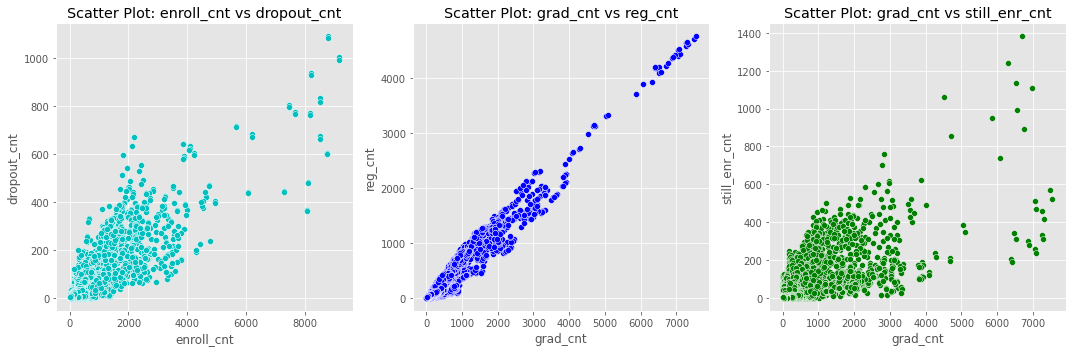

In [30]:
# Plotting Scatterplot  to find the insight 

# Create a figure with 1 row and 3 columns for horizontal placement
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# First subplot
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=numerical_data, color='c', ax=axes[0])
axes[0].set_title('Scatter Plot: enroll_cnt vs dropout_cnt')

# Second subplot 
sns.scatterplot(x='grad_cnt', y='reg_cnt', data=numerical_data, color='b', ax=axes[1])
axes[1].set_title('Scatter Plot: grad_cnt vs reg_cnt')

# Third subplot 
sns.scatterplot(x='grad_cnt', y='still_enr_cnt', data=numerical_data, color='g', ax=axes[2])
axes[2].set_title('Scatter Plot: grad_cnt vs still_enr_cnt')

# Display the plots
plt.tight_layout()
plt.show()

- All the graphs  has strong positive correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

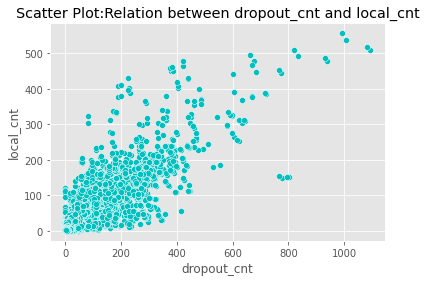

In [31]:
# Plotting Scatterplot  to find the insight 

sns.scatterplot(x='dropout_cnt', y='local_cnt' ,data=numerical_data, color='c')  # code to plot bargraph
plt.title('Scatter Plot:Relation between dropout_cnt and local_cnt')
plt.show()

- All the graphs  has strong positive correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

In [32]:
# Creating the fuction to plot bargraph between Categorical and numerical columns.

def plot_bar(df, x_col, y_col, title="Bar Plot", x_label=None, y_label=None, color='b', size=(10, 6), rotate_xticks=True, xticks_rotation=45):
    
    
    
    # Create the bar plot
    plt.figure(figsize=size)
    sns.barplot(x=x_col, y=y_col, data=df, color=color)

    # Set the title and axis labels
    plt.title(title, fontsize=16)
    plt.xlabel(x_label if x_label else x_col, fontsize=14)
    plt.ylabel(y_label if y_label else y_col, fontsize=14)
    
# Optionally rotate x-axis labels
# It helps to Adjust the columns in corrected horizontal way. 
    if rotate_xticks:
        plt.xticks(rotation=45, ha='right')
    
# Display the plot
    plt.tight_layout()
    plt.show()



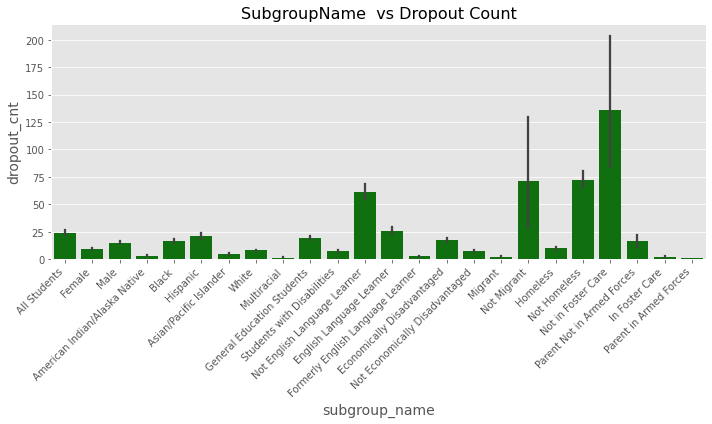

In [33]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'dropout_cnt', title="SubgroupName  vs Dropout Count", x_label="subgroup_name", y_label="dropout_cnt", color='g')



- Enrolled students of the 'Not in Foster Care' discontinued their high school enrollment during the school year has most number of dropout count

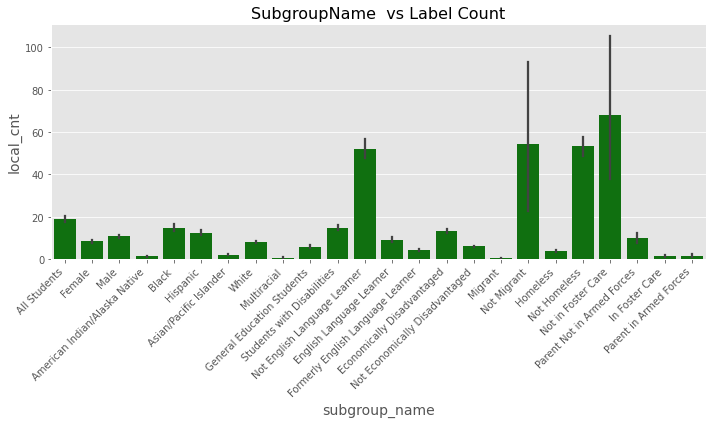

In [34]:
#Calling the function to plot bargraph


plot_bar(df, 'subgroup_name', 'local_cnt', title="SubgroupName  vs Label Count", x_label="subgroup_name", y_label="local_cnt", color='g')



- Enrolled students of the 'Not in Foster Care' were awarded a most number of  "Local" diploma.

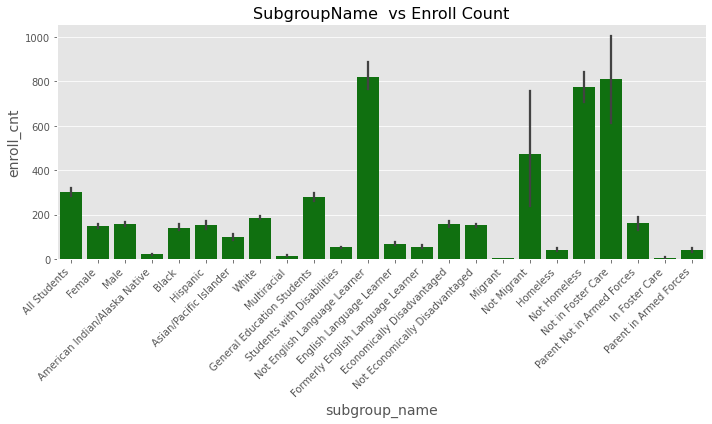

In [35]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'enroll_cnt', title="SubgroupName  vs Enroll Count", x_label="subgroup_name", y_label="enroll_cnt", color='g')



- Students of the 'Not English Language learner'  has most number of enrollment  .

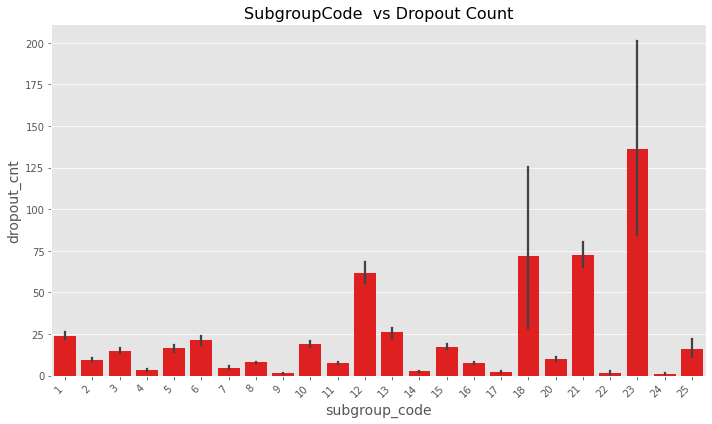

In [36]:
#Calling the function to plot bargraph


plot_bar(df, 'subgroup_code', 'dropout_cnt', title="SubgroupCode  vs Dropout Count", x_label="subgroup_code", y_label="dropout_cnt", color='r')



- Enrolled students of the Subgroup '23' discontinued their high school enrollment during the school year has the highest number.

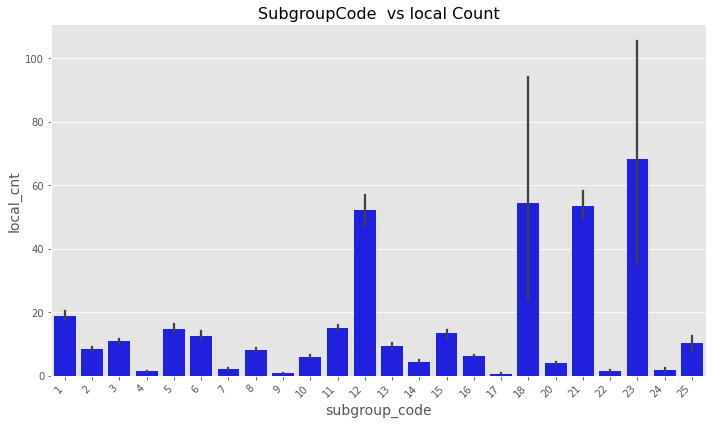

In [37]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_code', 'local_cnt', title="SubgroupCode  vs local Count", x_label="subgroup_code", y_label="local_cnt", color='b')




- Enrolled students of the SubgroupCode '23' were awarded a most number of "Local" diploma.

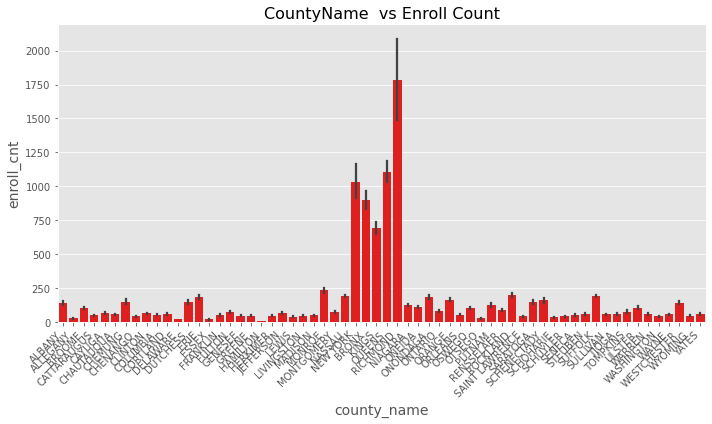

In [38]:
#Calling the function to plot bargraph

plot_bar(df, 'county_name', 'enroll_cnt', title="CountyName  vs Enroll Count", x_label="county_name", y_label="enroll_cnt", color='r')



- Students of the CountyName='Richmond' has most number of enrollment .

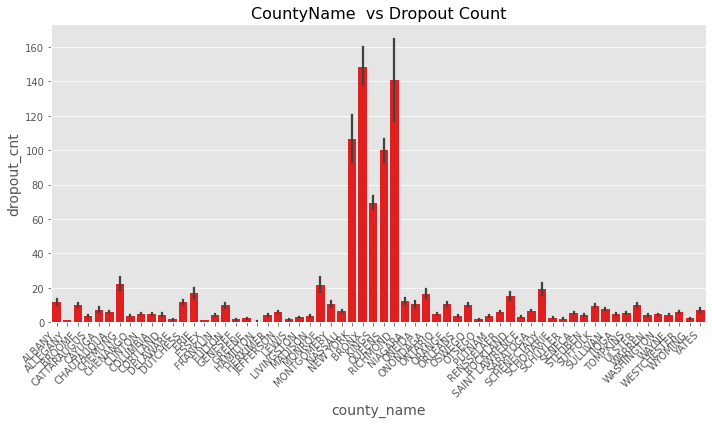

In [39]:
#Calling the function to plot bargraph

plot_bar(df, 'county_name', 'dropout_cnt', title="CountyName  vs Dropout Count", x_label="county_name", y_label="dropout_cnt", color='r')



- CountyName='Bronx' has the most number of dropout count .

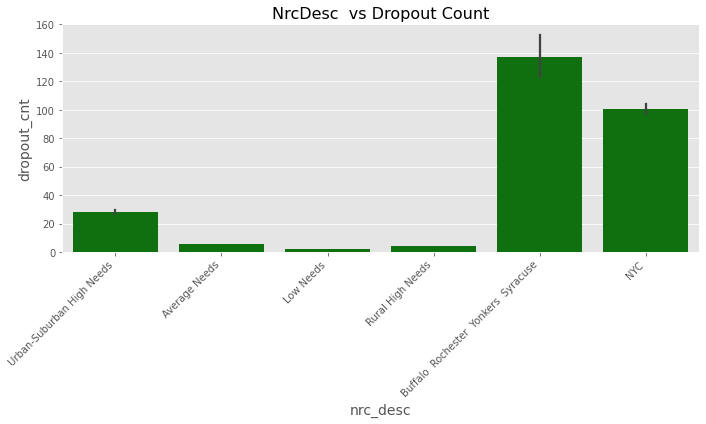

In [40]:
#Calling the function to plot bargraph

plot_bar(df, 'nrc_desc', 'dropout_cnt', title="NrcDesc  vs Dropout Count", x_label="nrc_desc", y_label="dropout_cnt", color='g')



- School district 'Buffalo Rochester Yonkers Syracuse' has the most number of dropout count . 

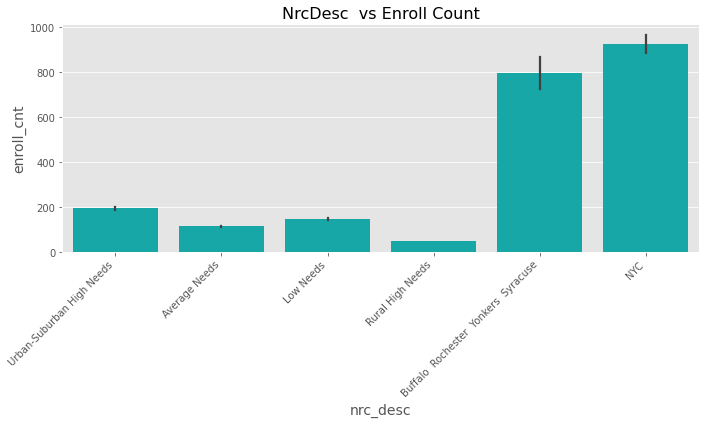

In [41]:
#Calling the function to plot bargraph

plot_bar(df, 'nrc_desc', 'enroll_cnt', title="NrcDesc  vs Enroll Count", x_label="nrc_desc", y_label="enroll_cnt", color='c')



- School district 'NYC' has the most number of Enrollment count . 

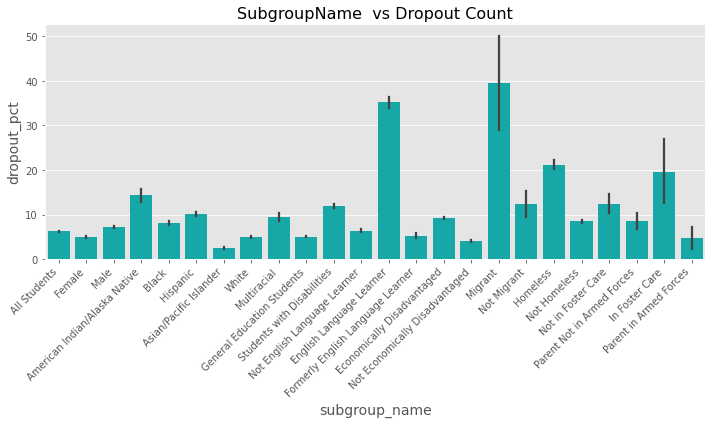

In [42]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'dropout_pct', title="SubgroupName  vs Dropout Count", x_label="subgroup_name", y_label="dropout_pct", color='c')



- SubgroupName 'Migrant' has the highest percentage of dropout .

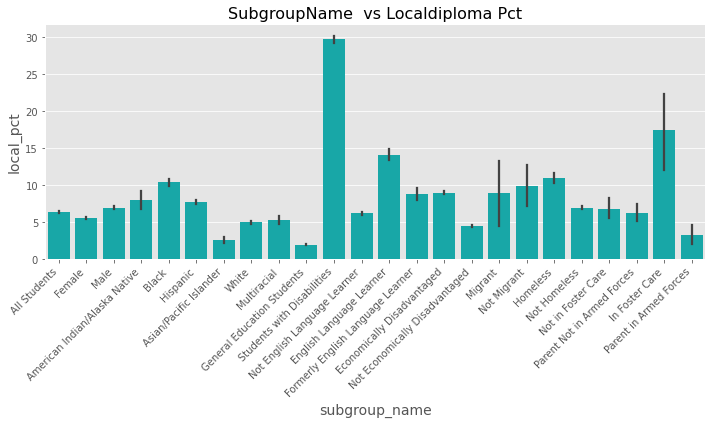

In [43]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'local_pct', title="SubgroupName  vs Localdiploma Pct", x_label="subgroup_name", y_label="local_pct", color='c')


- 'Students with disabilities ' has the highest percentage of local Diploma awarded.

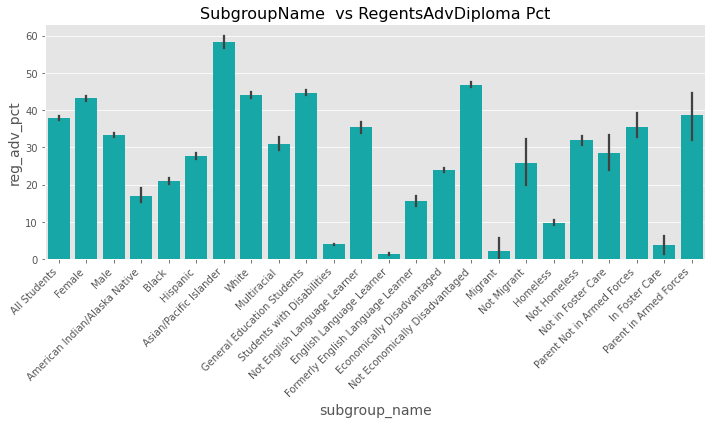

In [44]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'reg_adv_pct', title="SubgroupName  vs RegentsAdvDiploma Pct", x_label="subgroup_name", y_label="reg_adv_pct", color='c')


- 'Asian/Pacific islander'subgroup  has the highest percentage of 'Regents Adv Diploma' awarded.

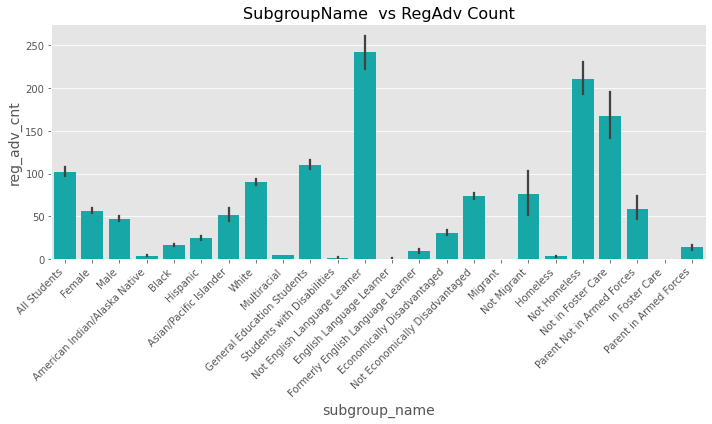

In [45]:
#Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'reg_adv_cnt', title="SubgroupName  vs RegAdv Count", x_label="subgroup_name", y_label="reg_adv_cnt", color='c')



- Subgroup 'Not English language learner ' has the most number of students  awarded a "Regents Advanced" diploma"

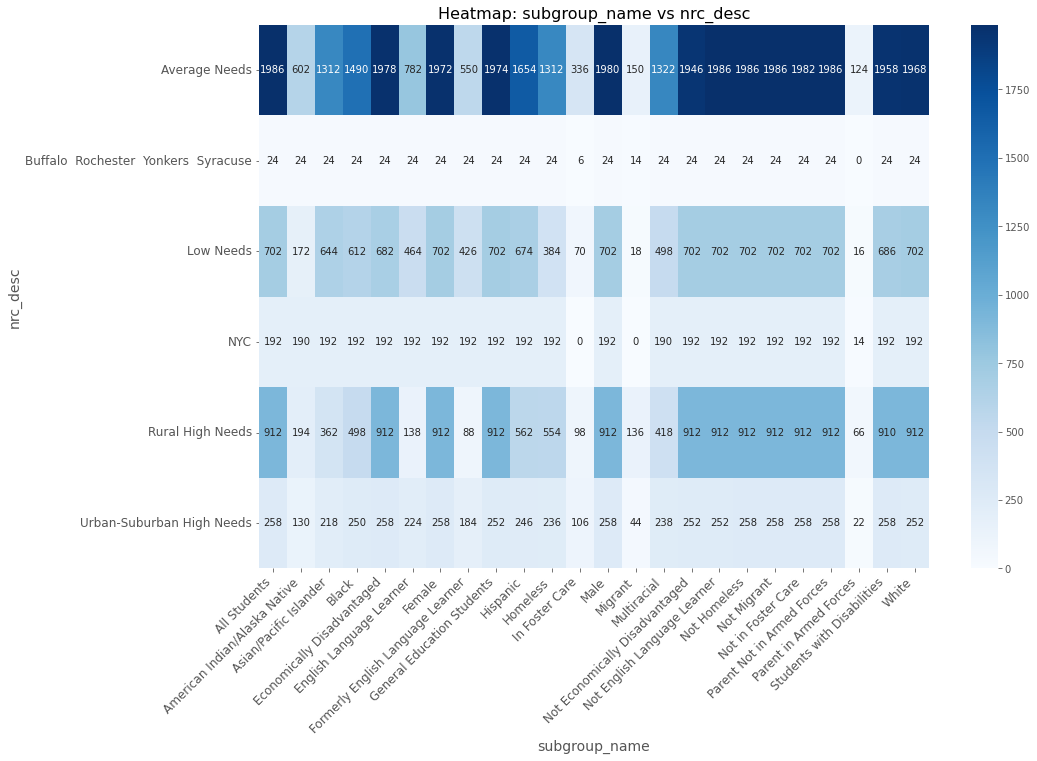

In [46]:
# Create a pivot table for the heatmap
#Pivot table arrange the data in 2d format for easy visualization in heatmap.
pivot_table = df.pivot_table(index='nrc_desc', columns='subgroup_name', aggfunc='size', fill_value=0)

# Increase figure size
plt.figure(figsize=(15, 10)) 

# Plot the heatmap
# Use fmt='d' for integer formatting
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt='d') 

plt.title('Heatmap: subgroup_name vs nrc_desc', fontsize=16) 
plt.xlabel('subgroup_name', fontsize=14)  
plt.ylabel('nrc_desc', fontsize=14)  
plt.xticks(rotation=45, ha='right',fontsize=12)  # Rotate x-ticks for better readability
plt.yticks(fontsize=12)  
plt.show()

- School district Description 'Average Needs' has most number of positive correlation with different subgroup.

- Examples: Average Needs and All students , Average Needs and Not Migrant , Average Needs and Not Homeless.

 - The blocks which is darkest in colour has the strongest positive correlation

----

<b> [Back to Content](#Content) </b>

### 3.4 Multivariate Analysis

In [47]:
# Defining variables for multivariate analysis.

column1 = ['enroll_cnt', 'grad_cnt',  'local_cnt', 'reg_cnt', 'reg_adv_cnt',  'non_diploma_credential_cnt', 
           'still_enr_cnt',  'ged_cnt', 'dropout_cnt']

column2 = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 
            'still_enr_pct', 'ged_pct', 'dropout_pct']

columns = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 
           'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct', 
           'non_diploma_credential_cnt', 'non_diploma_credential_pct','still_enr_cnt', 
           'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt', 'dropout_pct']

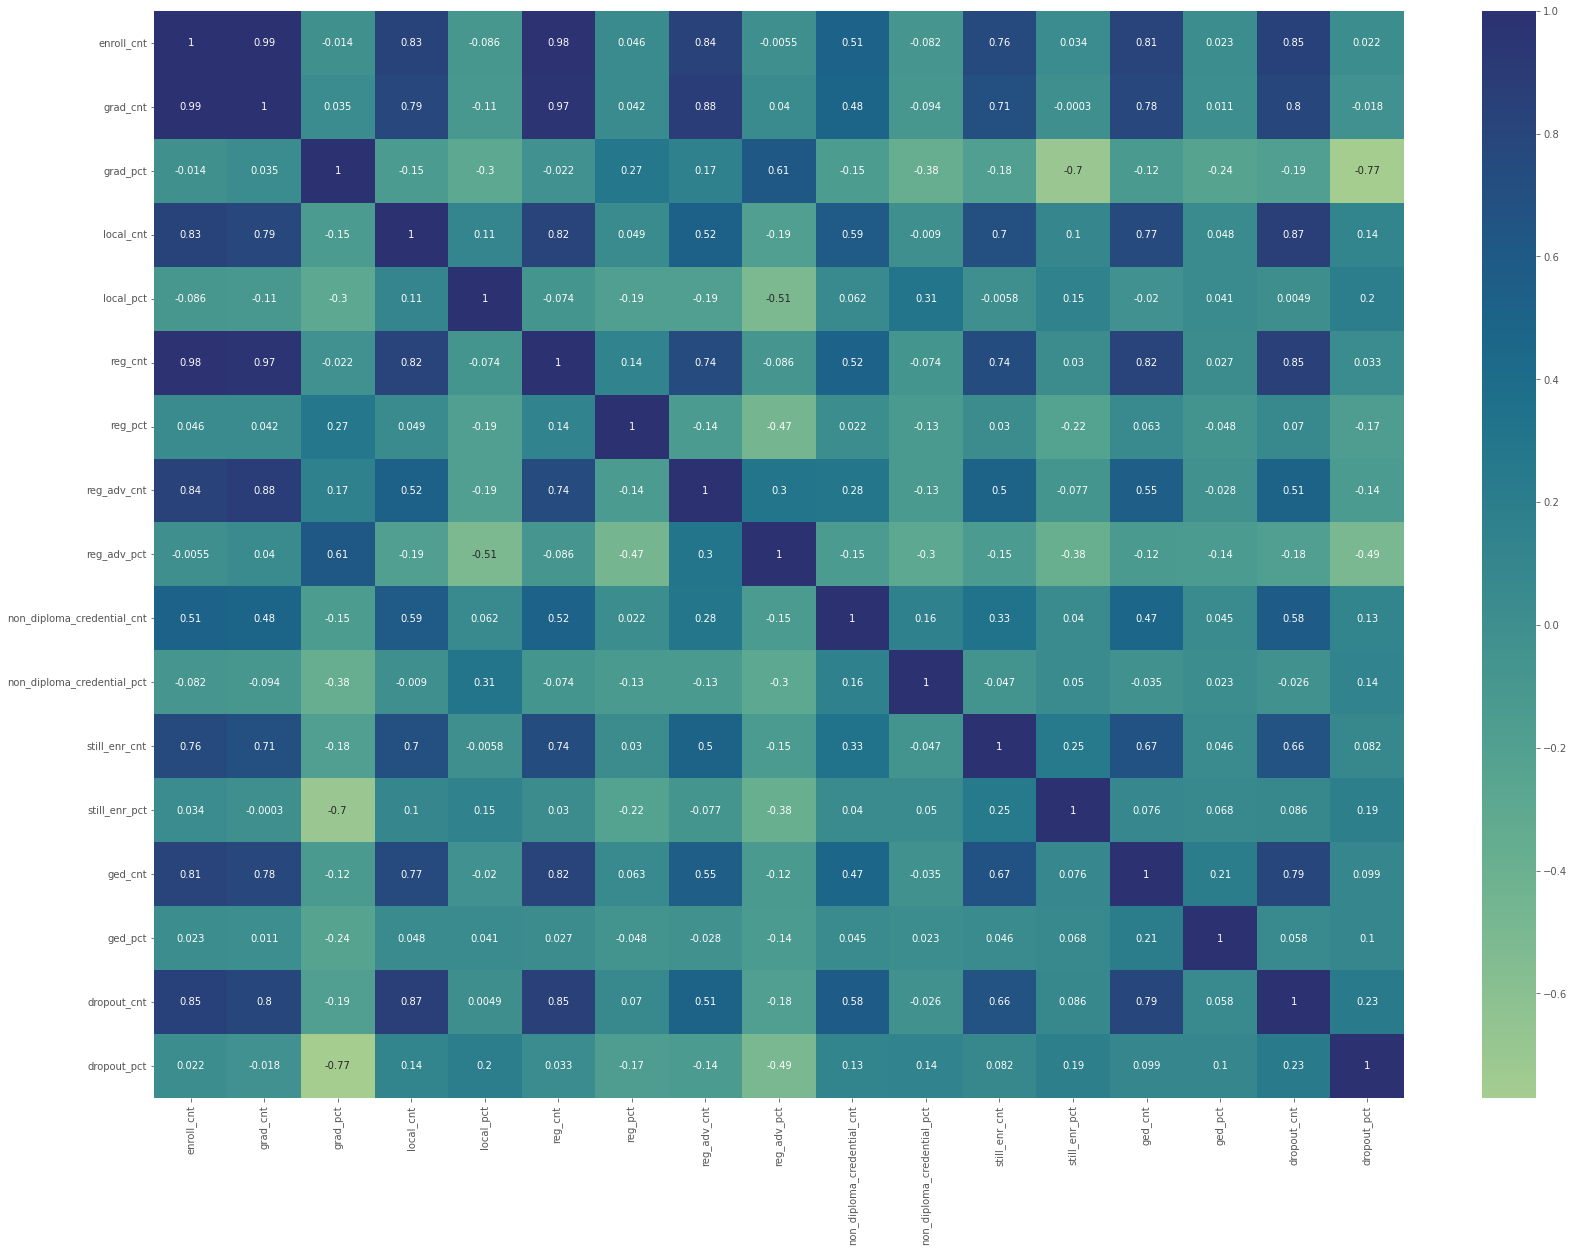

In [48]:
# Heatmap to show correlations between all numeric values. 

plt.figure(figsize=(28,20))

sns.heatmap(df[columns].corr(), annot=True, cmap='crest')
plt.show()

- Here we can see that all numerical attributes with suffix **'_cnt'** are making stronger correlations than the attributes with suffix **'_pct'**. So, we can check both separately.

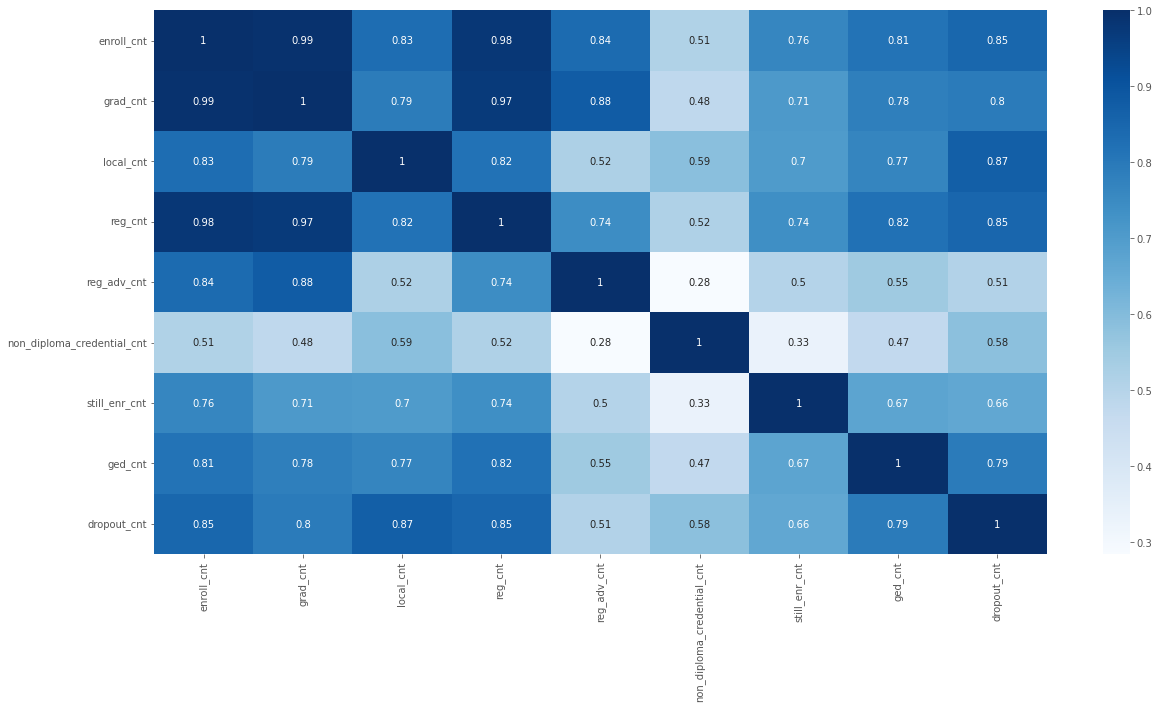

In [49]:
# Heatmap to show correlations between all numeric values with suffix '_cnt'. 

plt.figure(figsize=(20,10))

sns.heatmap(df[column1].corr(), annot=True, cmap='Blues')
plt.show()

- Yes, here most of the attributes are making a strong correlations, where :-
  - enroll_cnt has very high correlation with grad_cnt & reg_cnt.

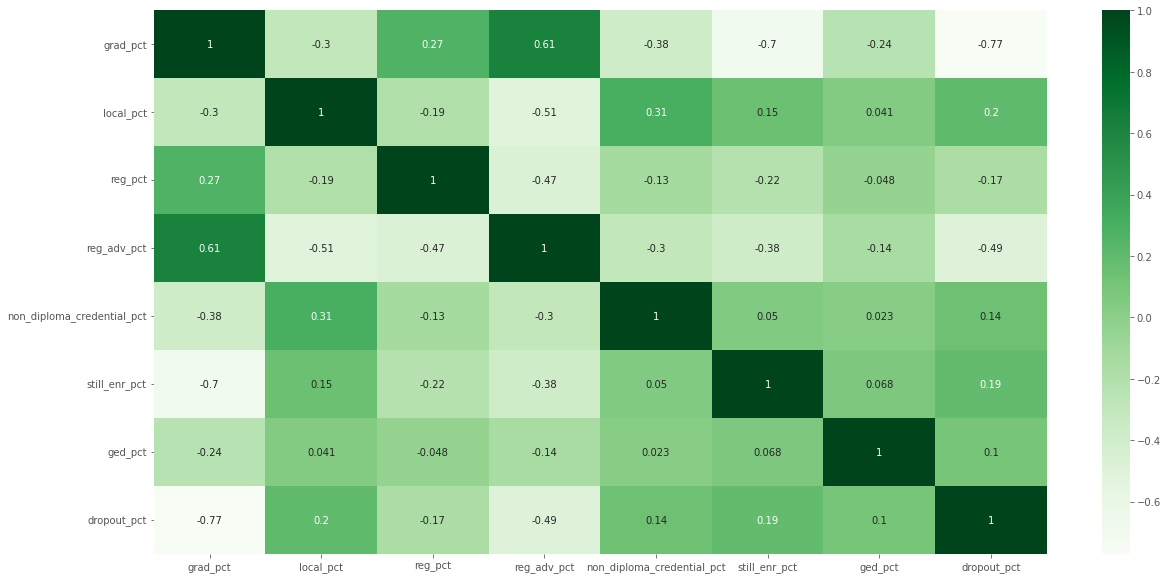

In [50]:
# Heatmap to show correlations between all numeric values with suffix '_pct'. 

plt.figure(figsize=(20,10))

sns.heatmap(df[column2].corr(), annot=True, cmap='Greens')
plt.show()

- Yes, here most of the attributes are making a less correlations.

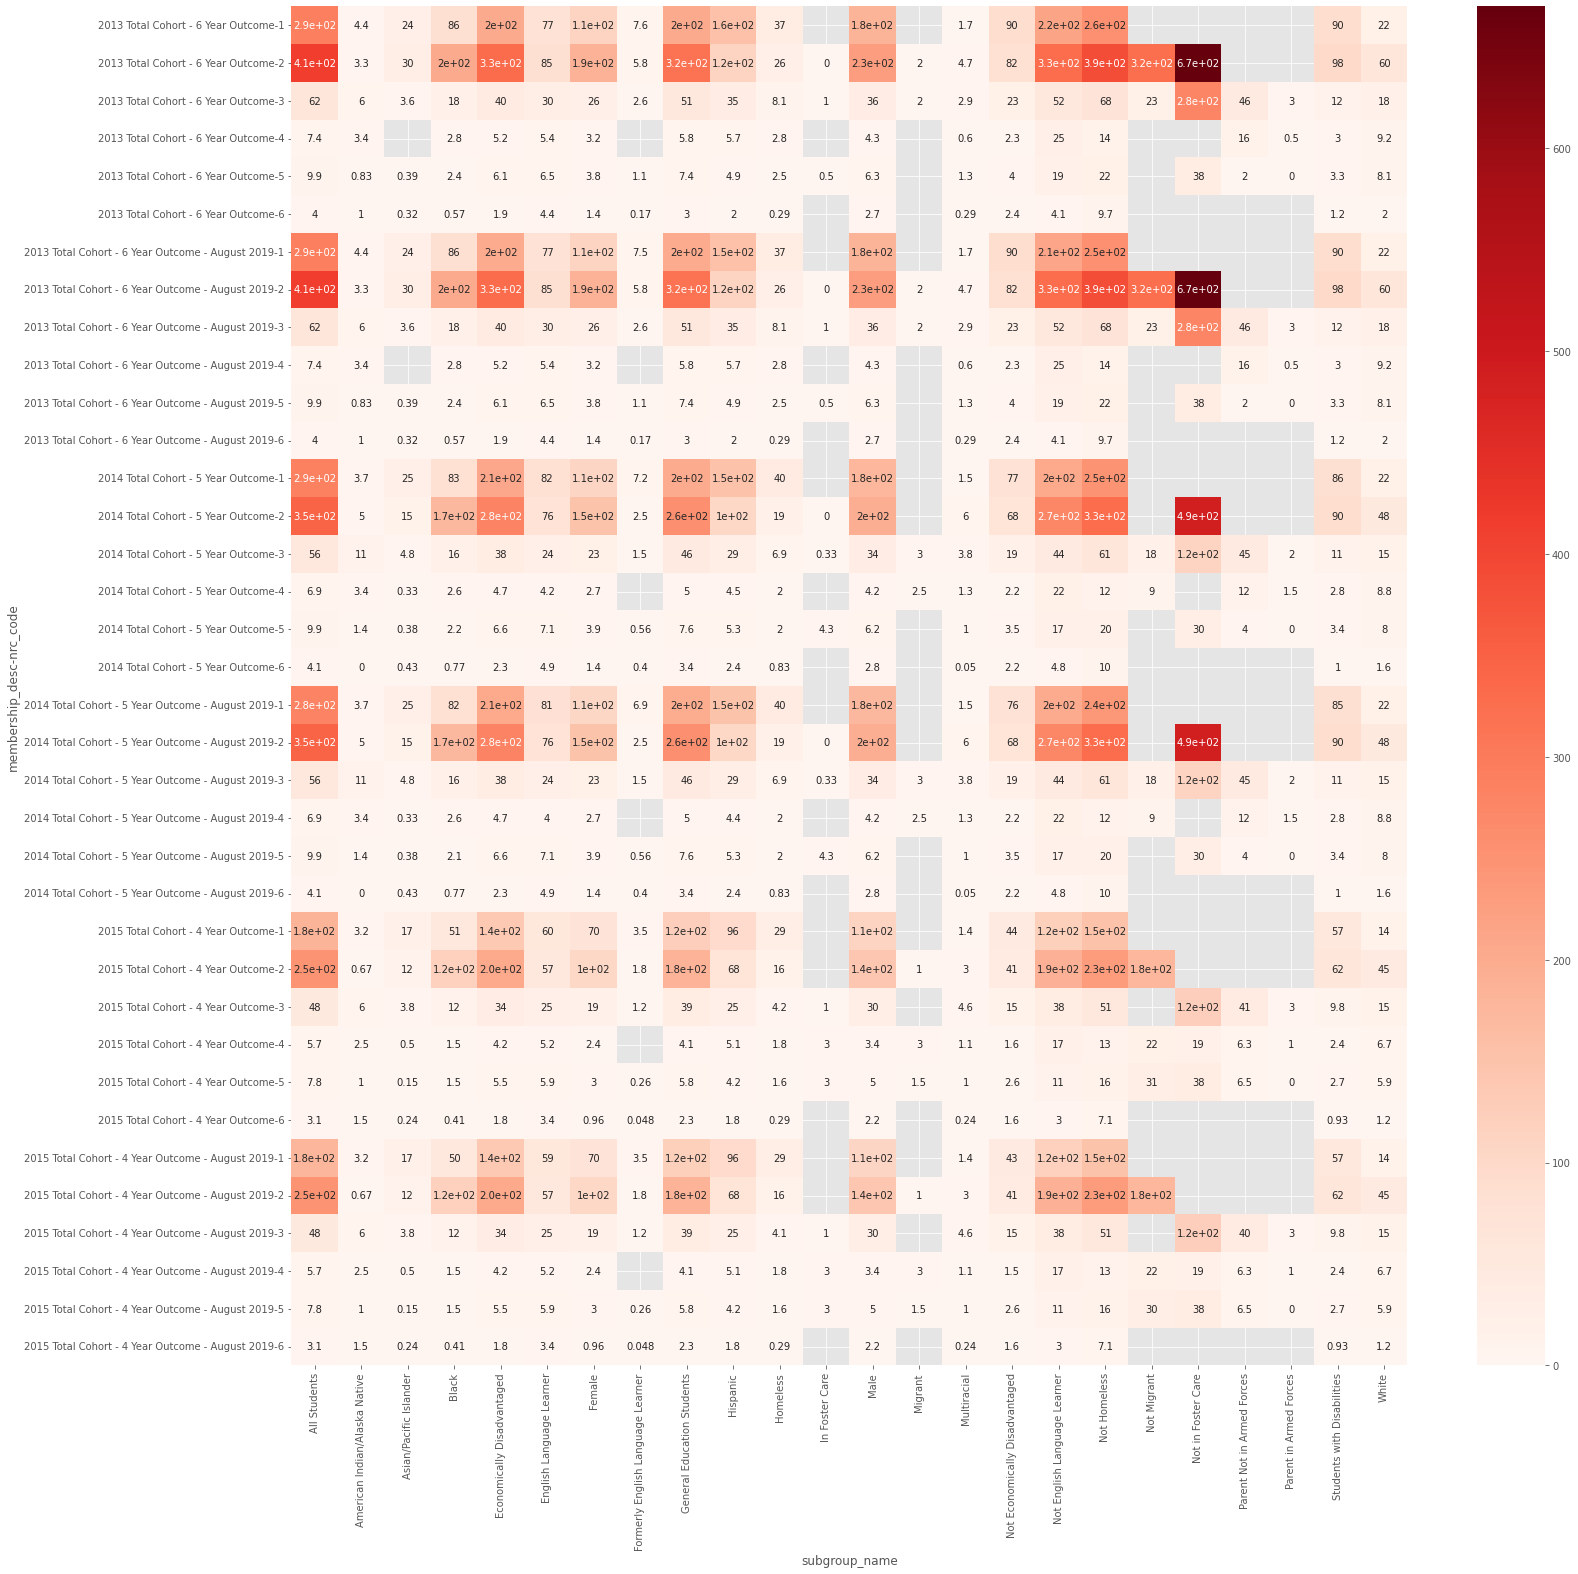

In [51]:
# Heatmap for 'membership_desc', 'nrc_code', 'subgroup_name' with respect to response variable ('dropout_cnt').

plt.figure(figsize=(25,25))
sns.heatmap(df.groupby(['membership_desc', 'nrc_code', 'subgroup_name'])['dropout_cnt'].mean().
            unstack(), cmap='Reds', annot=True)
plt.show()

- Here from the above analysis using groupby function, we can conclude the following insights :-

  - '2013 Total Cohort' with 'nrc_code - 2' have very high correlation with 'Not in Foster Care'.

- __Note__ - Grey cells with no values are the null values because it does not have any type of correlations.

----

<b> [Back to Content](#Content) </b>

## 4. Data Cleaning

In [52]:
# Check for missing values in each columns.

df.isnull().sum()

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                 

In [53]:
# Imputing values of 'NaN' with KNNImputer.

# Selecting only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Applying the KNNImputer only on numeric columns
imputer = KNNImputer(n_neighbors=5)
df_num = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# If you want to keep the original non-numeric columns
df_num

enroll_cnt    grad_cnt   grad_pct  local_cnt  local_pct     reg_cnt  \
0      658.000000  464.000000  71.000000  63.000000  10.000000  310.000000   
1      324.000000  246.000000  76.000000  30.000000   9.000000  169.000000   
2      334.000000  218.000000  65.000000  33.000000  10.000000  141.000000   
3      192.120079  161.178354  84.406614  12.340903   8.479936   86.804708   
4      367.000000  248.000000  68.000000  42.000000  11.000000  183.000000   
...           ...         ...        ...        ...        ...         ...   
73147  192.120079  161.178354  84.406614  12.340903   8.479936   86.804708   
73148  192.120079  161.178354  84.406614  12.340903   8.479936   86.804708   
73149  192.120079  161.178354  84.406614  12.340903   8.479936   86.804708   
73150  192.120079  161.178354  84.406614  12.340903   8.479936   86.804708   
73151  192.120079  161.178354  84.406614  12.340903   8.479936   86.804708   

         reg_pct  reg_adv_cnt  reg_adv_pct  non_diploma_credential_cnt  \
0      47.000000    91.000000    14.000000                   16.000000   
1      52.000000    47.000000    15.000000                    2.000000   
2      42.000000    44.000000    13.000000                   14.000000   
3      43.371125    62.032742    32.577204                    1.924485   
4      50.000000    23.000000     6.000000                   10.000000   
...          ...          ...          ...                         ...   
73147  43.371125    62.032742    32.577204                    1.924485   
73148  43.371125    62.032742    32.577204                    1.924485   
73149  43.371125    62.032742    32.577204                    1.924485   
73150  43.371125    62.032742    32.577204                    1.924485   
73151  43.371125    62.032742    32.577204                    1.924485   

       non_diploma_credential_pct  still_enr_cnt  still_enr_pct   ged_cnt  \
0                        2.000000      30.000000       5.000000  0.000000   
1                        1.000000      11.000000       3.000000  0.000000   
2                        4.000000      19.000000       6.000000  0.000000   
3                        1.742627      11.299516       5.190704  1.377577   
4                        3.000000      18.000000       5.000000  0.000000   
...                           ...            ...            ...       ...   
73147                    1.742627      11.299516       5.190704  1.377577   
73148                    1.742627      11.299516       5.190704  1.377577   
73149                    1.742627      11.299516       5.190704  1.377577   
73150                    1.742627      11.299516       5.190704  1.377577   
73151                    1.742627      11.299516       5.190704  1.377577   

        ged_pct  dropout_cnt  dropout_pct  
0      0.000000   148.000000    22.000000  
1      0.000000    65.000000    20.000000  
2      0.000000    83.000000    25.000000  
3      0.612693    16.239225     7.963049  
4      0.000000    91.000000    25.000000  
...         ...          ...          ...  
73147  0.612693    16.239225     7.963049  
73148  0.612693    16.239225     7.963049  
73149  0.612693    16.239225     7.963049  
73150  0.612693    16.239225     7.963049  
73151  0.612693    16.239225     7.963049  

[73152 rows x 17 columns]

### 4.1 Handling Skewness

- We observed that the majority of the numerical columns have skewness. To address this issue, we are implementing the Box-Cox method. Before proceeding checking if there are any zero values or negative values in each feature since Box-Cox works better with positive values.

In [249]:
# Checking for negative value.

negative_check = df_num[columns].apply(lambda x: (x < 0).any())

print(negative_check)

enroll_cnt                    False
grad_cnt                      False
grad_pct                      False
local_cnt                     False
local_pct                     False
reg_cnt                       False
reg_pct                       False
reg_adv_cnt                   False
reg_adv_pct                   False
non_diploma_credential_cnt    False
non_diploma_credential_pct    False
still_enr_cnt                 False
still_enr_pct                 False
ged_cnt                       False
ged_pct                       False
dropout_cnt                   False
dropout_pct                   False
dtype: bool


- Clearly we dont have any negative values in our features.

In [250]:
# Checking for zero values.

zero_check = df_num[columns].apply(lambda x: (x == 0).any())

print(zero_check)

enroll_cnt                    False
grad_cnt                       True
grad_pct                       True
local_cnt                      True
local_pct                      True
reg_cnt                        True
reg_pct                        True
reg_adv_cnt                    True
reg_adv_pct                    True
non_diploma_credential_cnt     True
non_diploma_credential_pct     True
still_enr_cnt                  True
still_enr_pct                  True
ged_cnt                        True
ged_pct                        True
dropout_cnt                    True
dropout_pct                    True
dtype: bool


- Except for the enroll_cnt column, all other features have zero values. To handle them, we will add a small constant in the Box-Cox method. Reference : https://zahin178.medium.com/managing-skewness-in-zero-valued-columns-strategies-and-techniques-ee5be108d0fb 

In [251]:
columns = ['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 
           'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct', 
           'non_diploma_credential_cnt', 'non_diploma_credential_pct', 
           'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 
           'dropout_cnt', 'dropout_pct']

# Applying  Box-Cox transformation to each column.

for col in columns:
    
    # Increasing  values by 1 to handle zeros
    df_num[col] += 1
    
    # Performing Box-Cox transformation and save the lambda value
    fitted_data, fitted_lambda = stats.boxcox(df_num[col])
    
    # Replacing original column with transformed data
    df_num[col] = fitted_data
    
    # Optional: Print lambda value for each column
    print(f"Lambda value for {col}: {fitted_lambda}")

Lambda value for enroll_cnt: 0.9999999996471433
Lambda value for grad_cnt: 1.000000014805016
Lambda value for grad_pct: 0.999999970462548
Lambda value for local_cnt: 1.000000105060641
Lambda value for local_pct: 1.0000000151057968
Lambda value for reg_cnt: 1.0000000024048095
Lambda value for reg_pct: 0.9999999852582265
Lambda value for reg_adv_cnt: 0.9999970707047973
Lambda value for reg_adv_pct: 0.9999989478677012
Lambda value for non_diploma_credential_cnt: 0.9999060265468551
Lambda value for non_diploma_credential_pct: 0.999277847158968
Lambda value for still_enr_cnt: 0.9999030276274801
Lambda value for still_enr_pct: 0.99999336678393
Lambda value for ged_cnt: 0.9774711106433758
Lambda value for ged_pct: 0.9358959869994525
Lambda value for dropout_cnt: 0.9999895979649082
Lambda value for dropout_pct: 0.9999995682094754


#### [Reference](https://www.geeksforgeeks.org/box-cox-transformation-using-python/)

### 4.2 Handling Outliers

In [252]:
# Simplyfying dataframe for further analysis.

# Selecting categorical columns from the DataFrame
df_cat = df.select_dtypes(exclude=['float64', 'int64'])

df_clean = pd.concat([df_num, df_cat], axis=1)

----

<b> [Back to Content](#Content) </b>

## 5. Prepped Data Review

In [253]:
# Checking every columns has the correct data types.

df_clean.dtypes

enroll_cnt                    float64
grad_cnt                      float64
grad_pct                      float64
local_cnt                     float64
local_pct                     float64
reg_cnt                       float64
reg_pct                       float64
reg_adv_cnt                   float64
reg_adv_pct                   float64
non_diploma_credential_cnt    float64
non_diploma_credential_pct    float64
still_enr_cnt                 float64
still_enr_pct                 float64
ged_cnt                       float64
ged_pct                       float64
dropout_cnt                   float64
dropout_pct                   float64
report_school_year             object
aggregation_index              object
aggregation_type               object
aggregation_name               object
nrc_code                       object
nrc_desc                       object
county_code                    object
county_name                    object
nyc_ind                        object
membership_d

In [254]:
# Ensure that there are no duplicates.

df_clean.duplicated().sum()

0

In [255]:
# Checking the descriptive statistics.

df_clean.describe()

enroll_cnt      grad_cnt      grad_pct     local_cnt     local_pct  \
count  73152.000000  73152.000000  7.315200e+04  73152.000000  73152.000000   
mean       7.519414      7.708895  6.251481e+06      2.327712      2.910940   
std        2.443645      2.729246  2.243157e+06      1.190178      1.407064   
min        2.102554      0.000000  0.000000e+00      0.000000      0.000000   
25%        5.919944      5.982685  5.791033e+06      1.471306      2.398067   
50%        8.571429      8.837024  5.791033e+06      2.895942      3.255058   
75%        8.571429      8.837024  7.370862e+06      2.895942      3.255058   
max       22.057436     24.730198  1.095725e+07      8.329847     10.256492   

            reg_cnt       reg_pct   reg_adv_cnt   reg_adv_pct  \
count  73152.000000  73152.000000  73152.000000  73152.000000   
mean       5.674557     38.849685      5.745753     18.921731   
std        2.144331     10.946986      2.852382      8.649905   
min        0.000000      0.000000      0.000000      0.000000   
25%        4.271296     37.724469      3.860106     17.666655   
50%        6.658576     38.913050      6.922998     19.447606   
75%        6.658576     40.323266      6.922998     20.145179   
max       18.478336     87.116530     21.681240     48.633233   

       non_diploma_credential_cnt  non_diploma_credential_pct  still_enr_cnt  \
count                73152.000000                73152.000000   73152.000000   
mean                     0.666262                    0.588273       1.738508   
std                      0.475842                    0.440030       1.075954   
min                      0.000000                    0.000000       0.000000   
25%                      0.000000                    0.000000       0.678337   
50%                      0.907571                    0.808795       2.387664   
75%                      0.907571                    0.808795       2.387664   
max                      2.732523                    2.036102       6.775414   

       still_enr_pct       ged_cnt       ged_pct   dropout_cnt   dropout_pct  
count   73152.000000  73152.000000  73152.000000  73152.000000  73152.000000  
mean        1.687323      0.349382      0.180912      2.274054      2.841240  
std         1.007945      0.297296      0.159648      1.255489      1.479220  
min         0.000000      0.000000      0.000000      0.000000      0.000000  
25%         1.173677      0.000000      0.000000      1.411133      2.114387  
50%         2.041298      0.553910      0.286877      2.982303      3.201196  
75%         2.041298      0.553910      0.286877      2.982303      3.201196  
max         6.287645      1.077679      0.519493      8.111368     10.782545

In [256]:
# Ensuring that there is no null value present.

df_clean.isnull().sum()

enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
dtype: int64

#### Ensuring Univariate

In [257]:
# Ensure with a function to plot dist and box plot for all the numeric features with suffix '_pct' attributes,
# after using box-cox, handelling skewness, and working on outliers.

def box_dist_plot_pct(df):
    
    """
    This function is to plot box plot and distribution plot for each column, 
    column's median value, with count and percentage of null values. 
    
    Parameters:
        data : DataFrame  # DataFrame contains data.
    """
    
    plt.style.use('ggplot')
    
    # Columns with suffix '_pct' attributes.
    columns = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct', 
               'still_enr_pct', 'ged_pct', 'dropout_pct' ]

    for column in columns:
        
        plt.figure( figsize = (18, 7) )  # Set the figure size

        # Box plot.
        plt.subplot(121)
        sns.boxplot(y = df[column])  # Create box plot
        plt.title(f'Box Plot of : {column}')

        # Distribution plot.
        plt.subplot(122)
        sns.histplot(df[column], bins=30, kde=True)  # Create histogram with KDE
        plt.title(f'Distribution Plot of : {column}')
        
        # Adjusting the layout.
        plt.tight_layout() 
        
        plt.show()  

        # To print statistics.
        print(df[column].describe())
        print('Median :', df[column].median())
        print()
        print('Total Number of null values :', df[column].isnull().sum(), 'count,',
              round(df[column].isnull().mean() * 100, 2), '%')
        
        # To clearly seperate one entiny from another
        print("="*50)
 

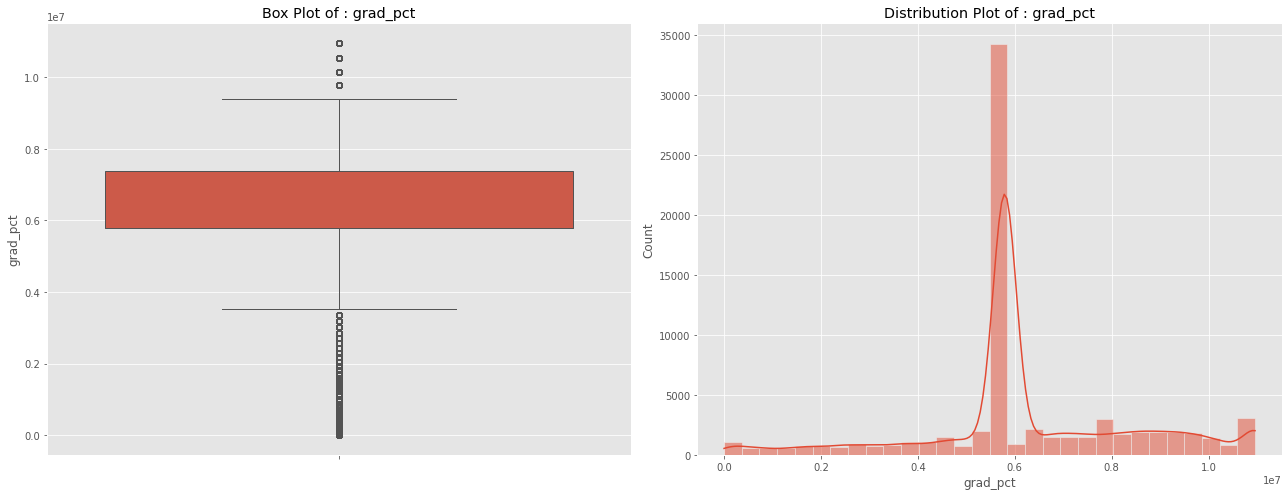

count    7.315200e+04
mean     6.251481e+06
std      2.243157e+06
min      0.000000e+00
25%      5.791033e+06
50%      5.791033e+06
75%      7.370862e+06
max      1.095725e+07
Name: grad_pct, dtype: float64
Median : 5791033.200653735

Total Number of null values : 0 count, 0.0 %


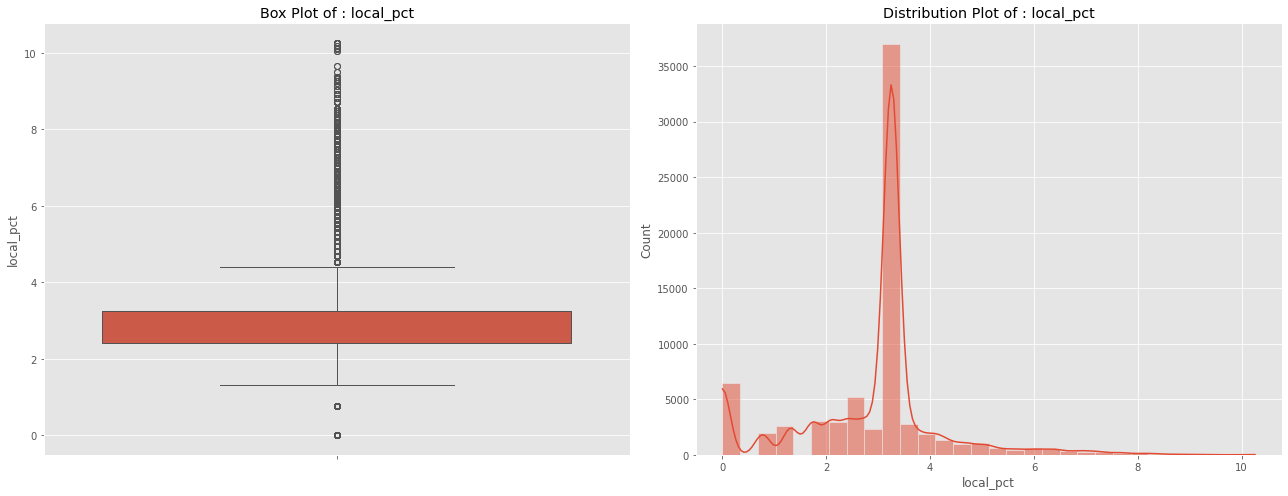

count    73152.000000
mean         2.910940
std          1.407064
min          0.000000
25%          2.398067
50%          3.255058
75%          3.255058
max         10.256492
Name: local_pct, dtype: float64
Median : 3.2550575723734303

Total Number of null values : 0 count, 0.0 %


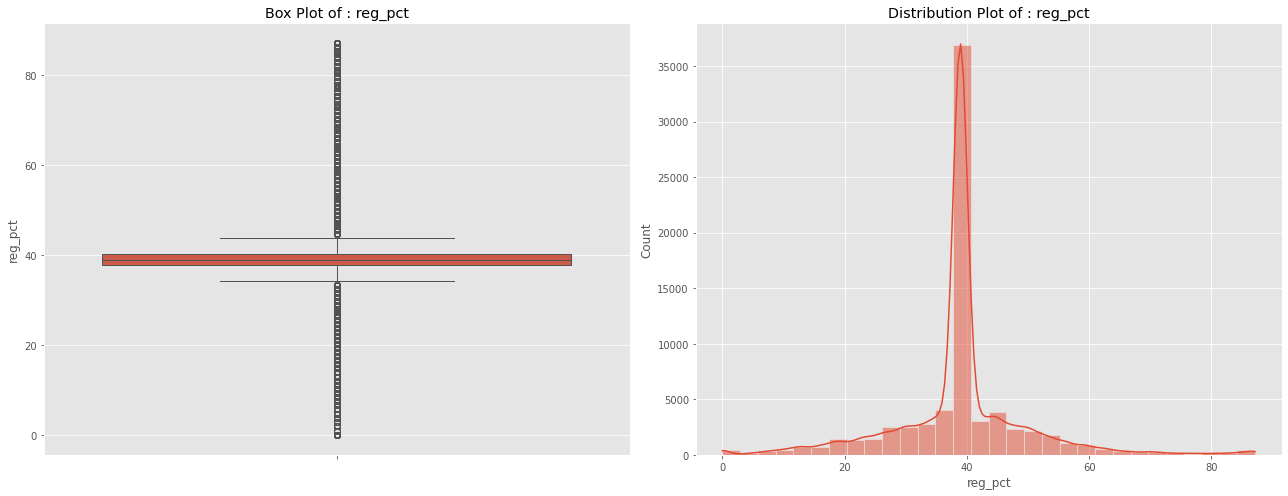

count    73152.000000
mean        38.849685
std         10.946986
min          0.000000
25%         37.724469
50%         38.913050
75%         40.323266
max         87.116530
Name: reg_pct, dtype: float64
Median : 38.913050127505784

Total Number of null values : 0 count, 0.0 %


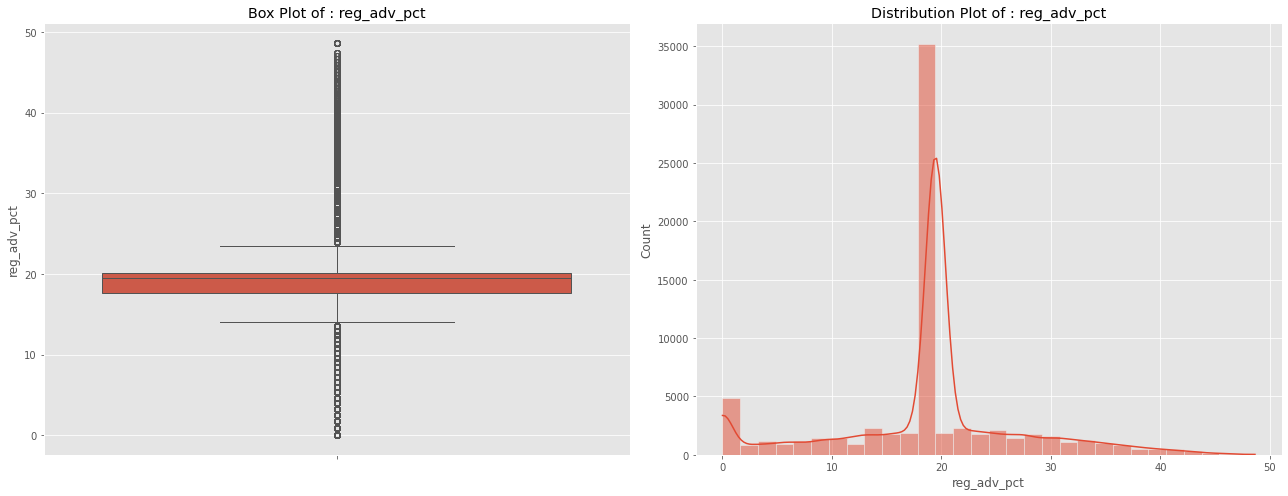

count    73152.000000
mean        18.921731
std          8.649905
min          0.000000
25%         17.666655
50%         19.447606
75%         20.145179
max         48.633233
Name: reg_adv_pct, dtype: float64
Median : 19.447606274472825

Total Number of null values : 0 count, 0.0 %


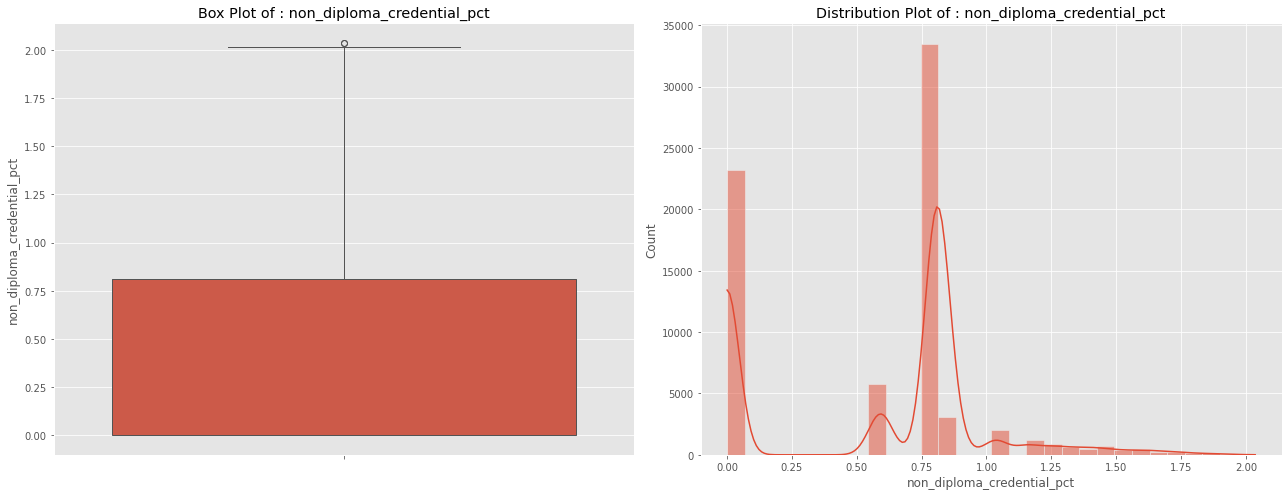

count    73152.000000
mean         0.588273
std          0.440030
min          0.000000
25%          0.000000
50%          0.808795
75%          0.808795
max          2.036102
Name: non_diploma_credential_pct, dtype: float64
Median : 0.8087953839790093

Total Number of null values : 0 count, 0.0 %


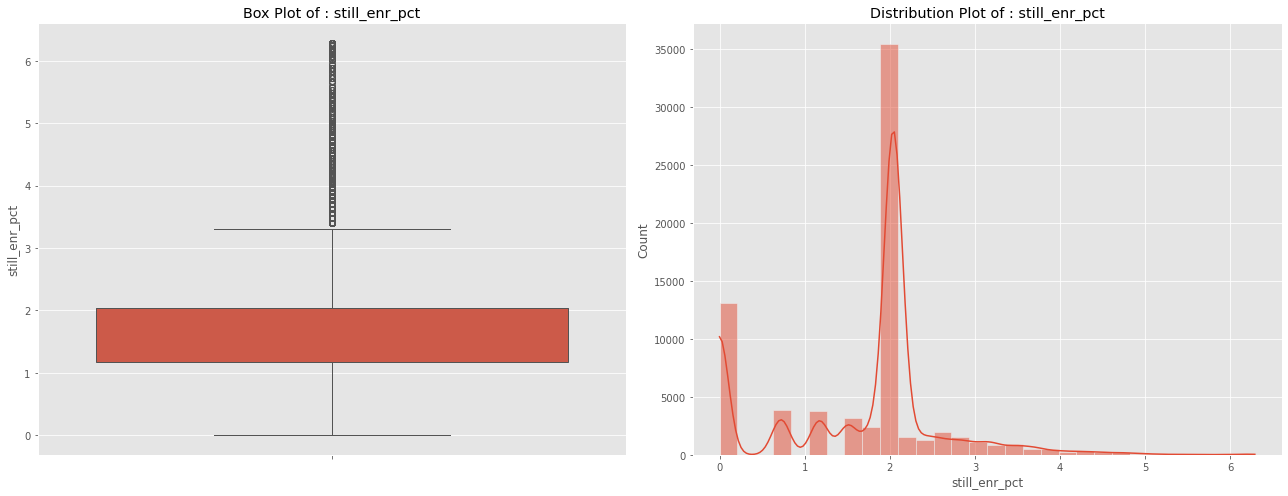

count    73152.000000
mean         1.687323
std          1.007945
min          0.000000
25%          1.173677
50%          2.041298
75%          2.041298
max          6.287645
Name: still_enr_pct, dtype: float64
Median : 2.0412976277661277

Total Number of null values : 0 count, 0.0 %


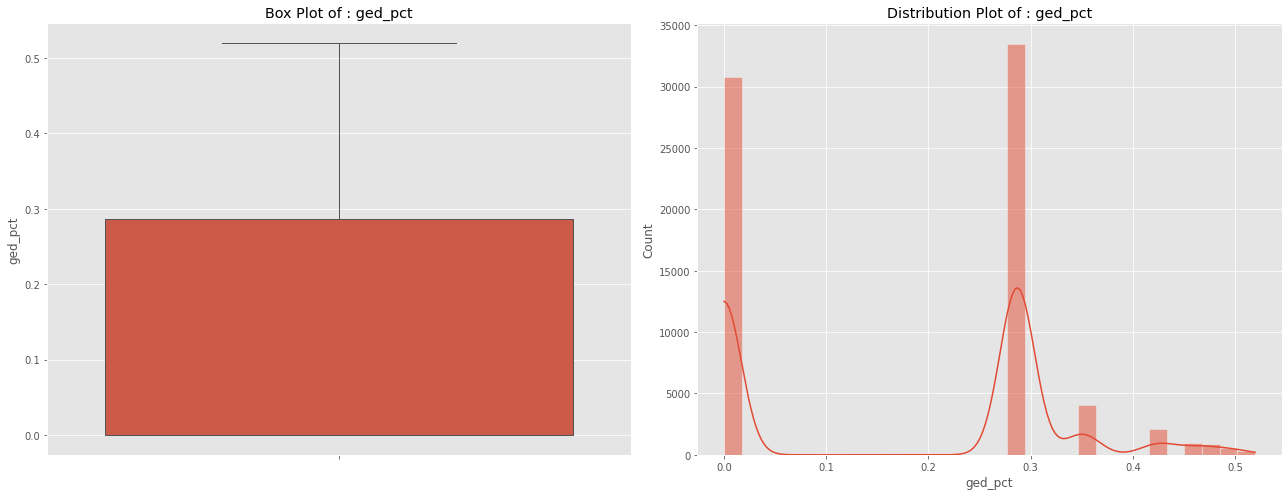

count    73152.000000
mean         0.180912
std          0.159648
min          0.000000
25%          0.000000
50%          0.286877
75%          0.286877
max          0.519493
Name: ged_pct, dtype: float64
Median : 0.2868769244818631

Total Number of null values : 0 count, 0.0 %


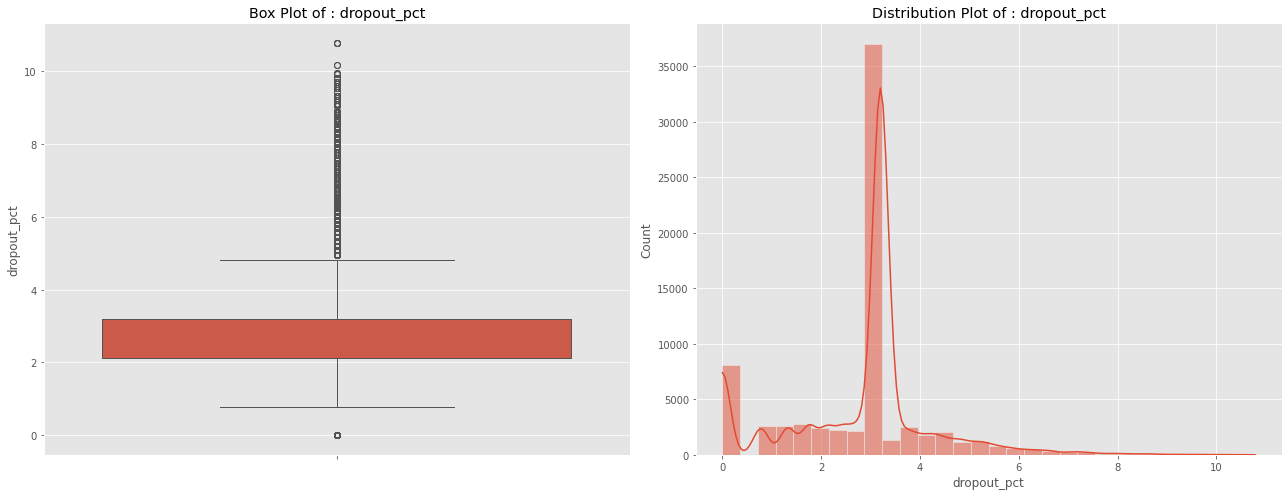

count    73152.000000
mean         2.841240
std          1.479220
min          0.000000
25%          2.114387
50%          3.201196
75%          3.201196
max         10.782545
Name: dropout_pct, dtype: float64
Median : 3.2011955359562427

Total Number of null values : 0 count, 0.0 %


In [258]:
# Calling the function 'box_dist_plot_pct()'.

box_dist_plot_pct(df_clean)

- The distribution, of these 8 features which was skewed earlier, has changed its distribution to a normal distribution.

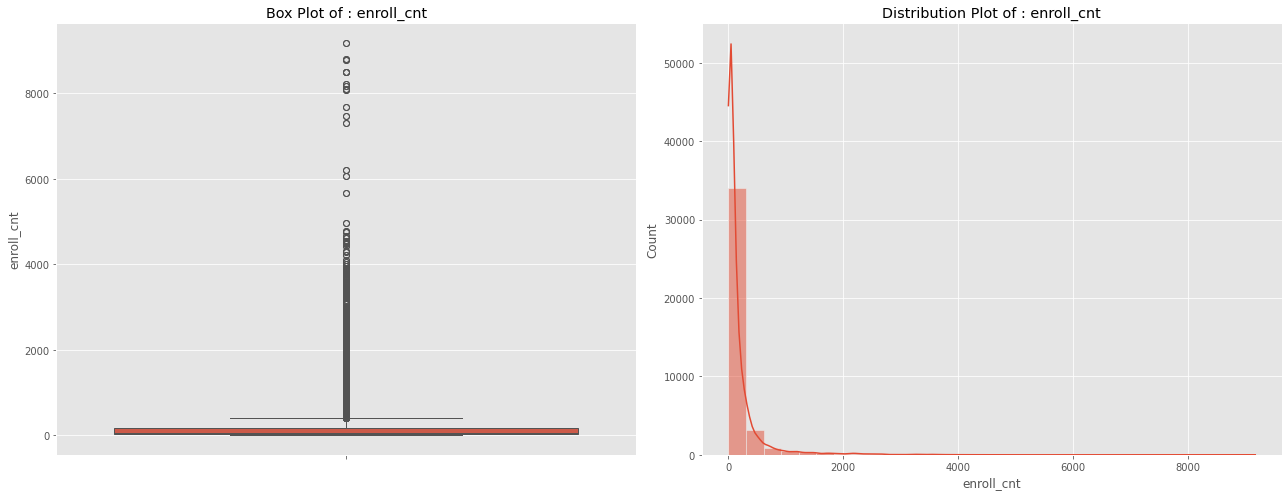

count    39674.000000
mean       192.120079
std        439.972474
min          5.000000
25%         25.000000
50%         66.000000
75%        179.000000
max       9176.000000
Name: enroll_cnt, dtype: float64
Median : 66.0

Total Number of null values : 33478 count, 45.76 %


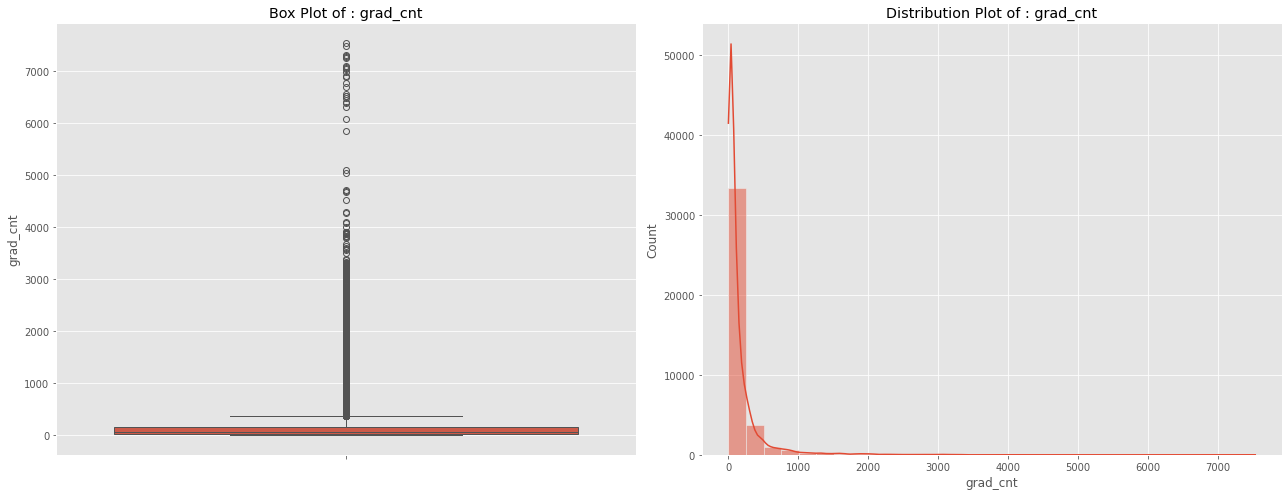

count    39674.000000
mean       161.178354
std        361.294773
min          0.000000
25%         20.000000
50%         57.000000
75%        156.000000
max       7540.000000
Name: grad_cnt, dtype: float64
Median : 57.0

Total Number of null values : 33478 count, 45.76 %


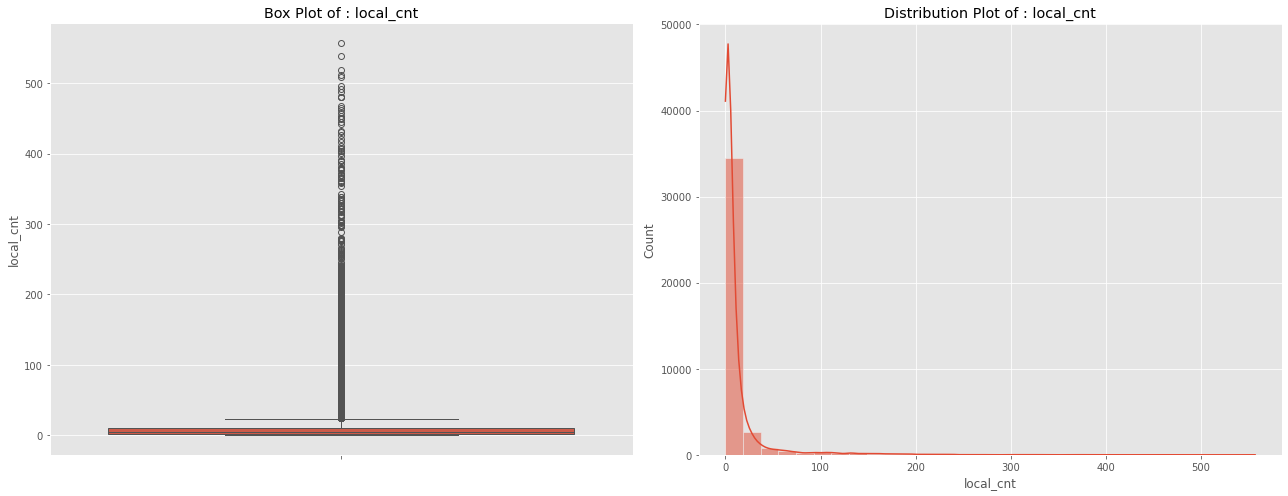

count    39674.000000
mean        12.340903
std         32.046302
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max        557.000000
Name: local_cnt, dtype: float64
Median : 4.0

Total Number of null values : 33478 count, 45.76 %


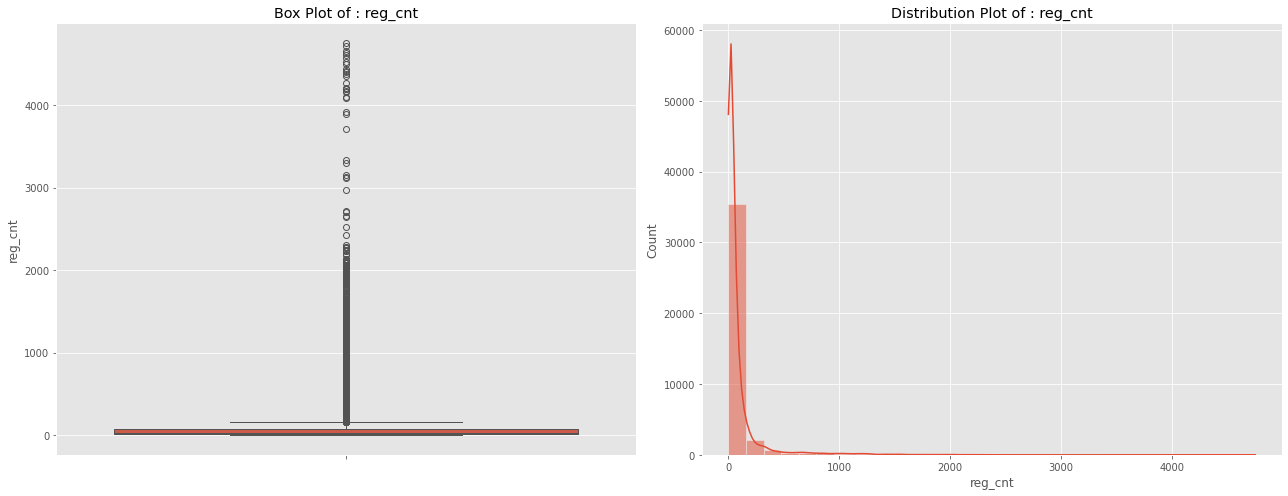

count    39674.000000
mean        86.804708
std        225.795826
min          0.000000
25%         10.000000
50%         27.000000
75%         69.000000
max       4752.000000
Name: reg_cnt, dtype: float64
Median : 27.0

Total Number of null values : 33478 count, 45.76 %


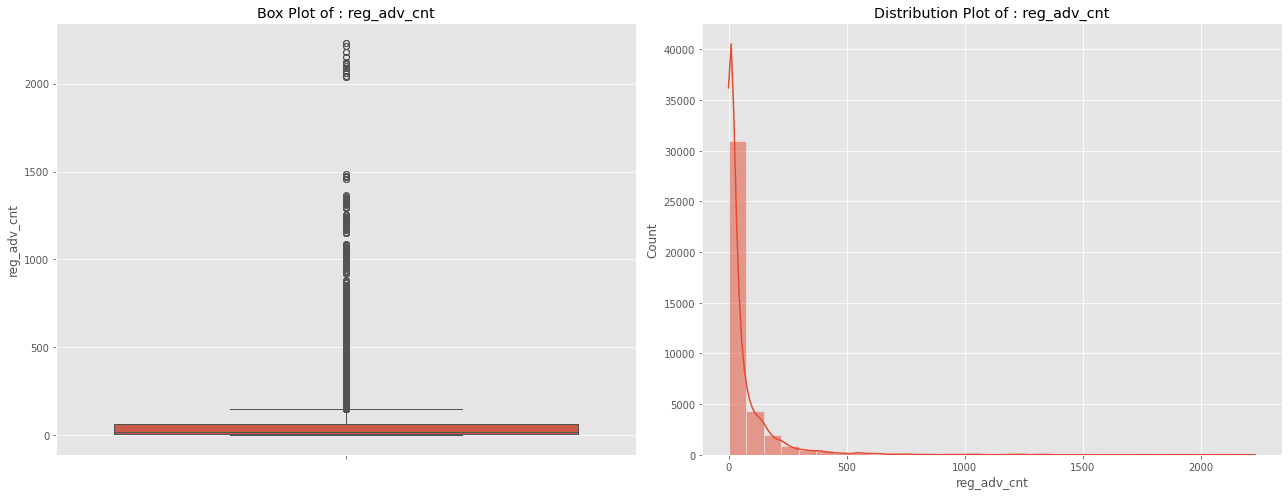

count    39674.000000
mean        62.032742
std        132.777866
min          0.000000
25%          4.000000
50%         18.000000
75%         62.000000
max       2231.000000
Name: reg_adv_cnt, dtype: float64
Median : 18.0

Total Number of null values : 33478 count, 45.76 %


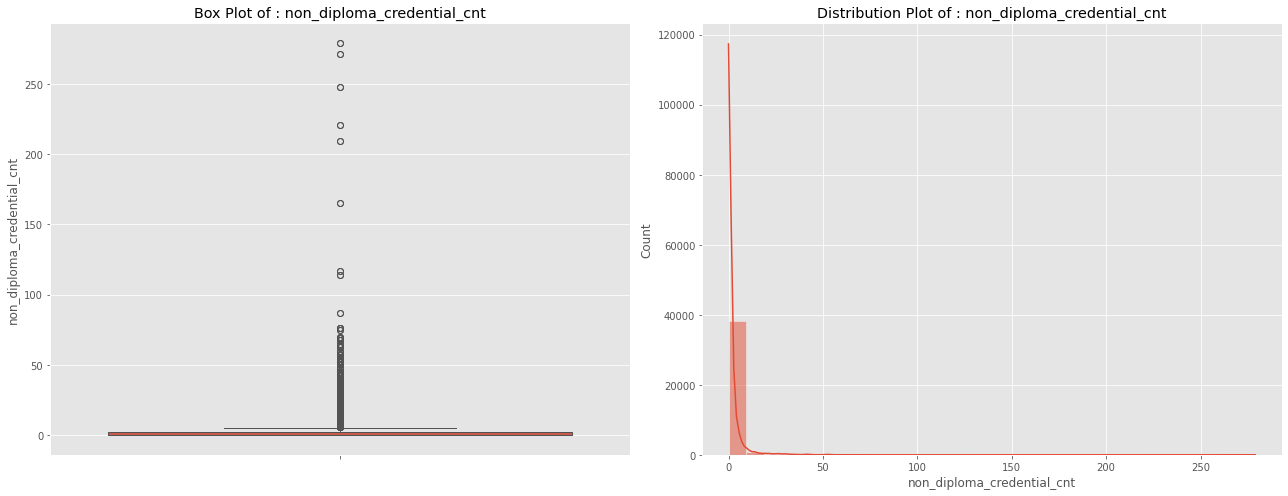

count    39674.000000
mean         1.924485
std          6.498913
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        279.000000
Name: non_diploma_credential_cnt, dtype: float64
Median : 0.0

Total Number of null values : 33478 count, 45.76 %


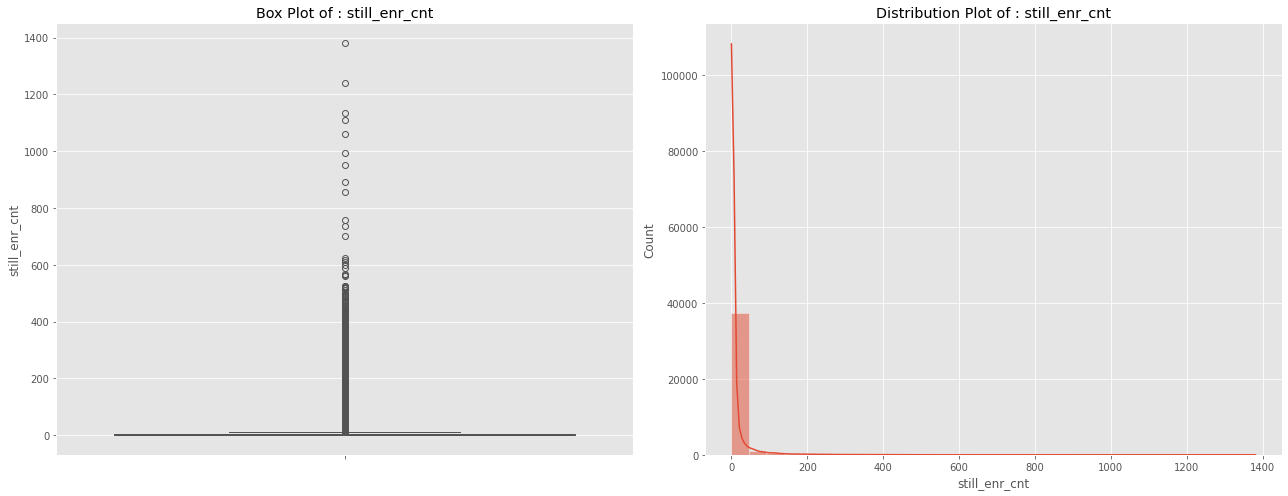

count    39674.000000
mean        11.299516
std         40.766672
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1381.000000
Name: still_enr_cnt, dtype: float64
Median : 2.0

Total Number of null values : 33478 count, 45.76 %


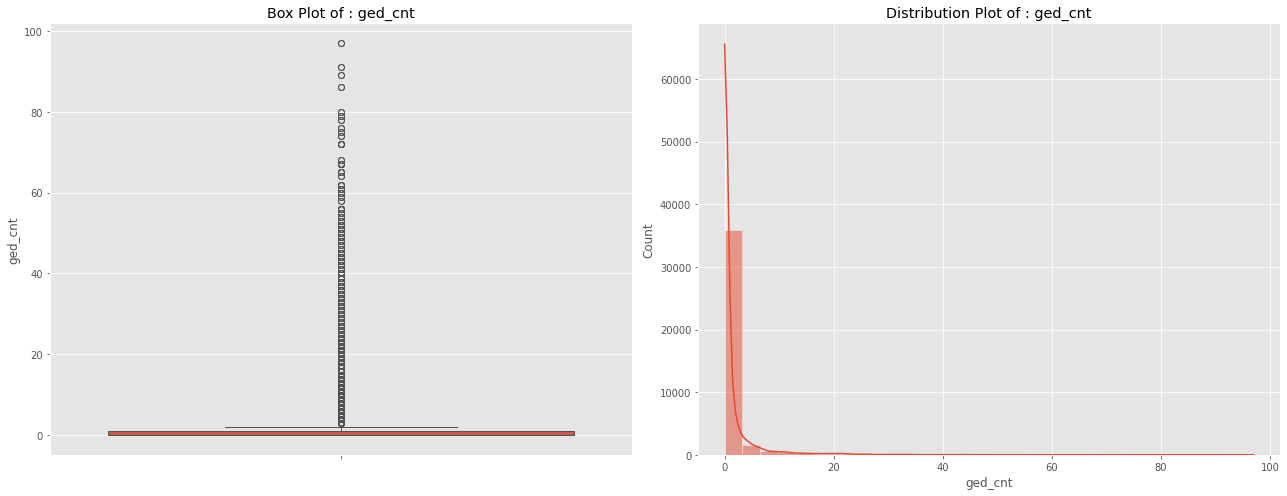

count    39674.000000
mean         1.377577
std          4.949389
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         97.000000
Name: ged_cnt, dtype: float64
Median : 0.0

Total Number of null values : 33478 count, 45.76 %


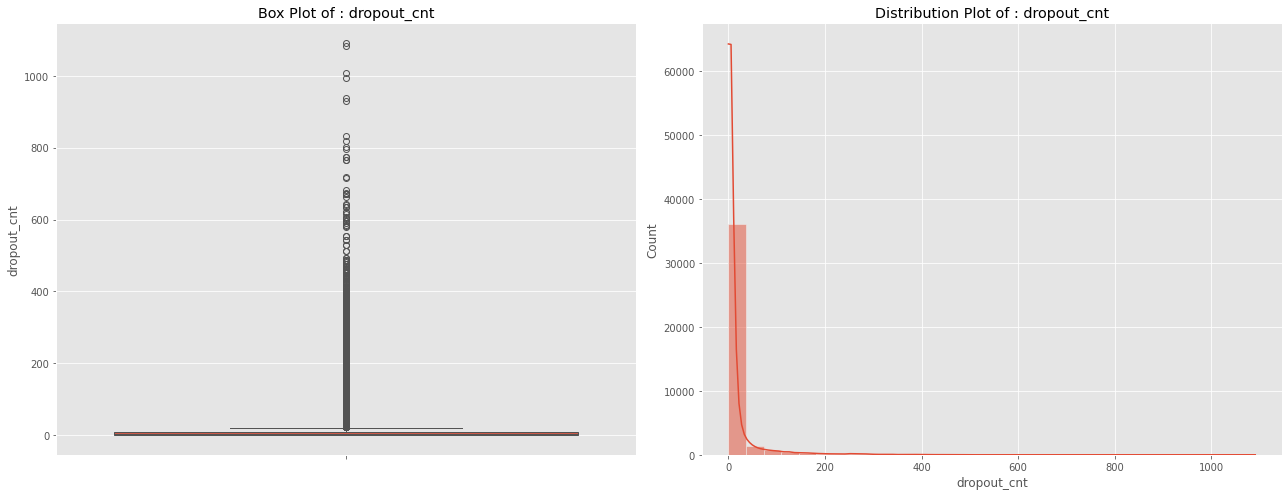

count    39674.000000
mean        16.239225
std         50.129834
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max       1091.000000
Name: dropout_cnt, dtype: float64
Median : 3.0

Total Number of null values : 33478 count, 45.76 %


In [259]:
# Calling the function 'box_dist_plot_cnt()'.

box_dist_plot_cnt(df)

- All nine features above had skewness before, but after the Box-Cox transformation, they have changed to a normal distribution."

#### Ensuring Bivariate

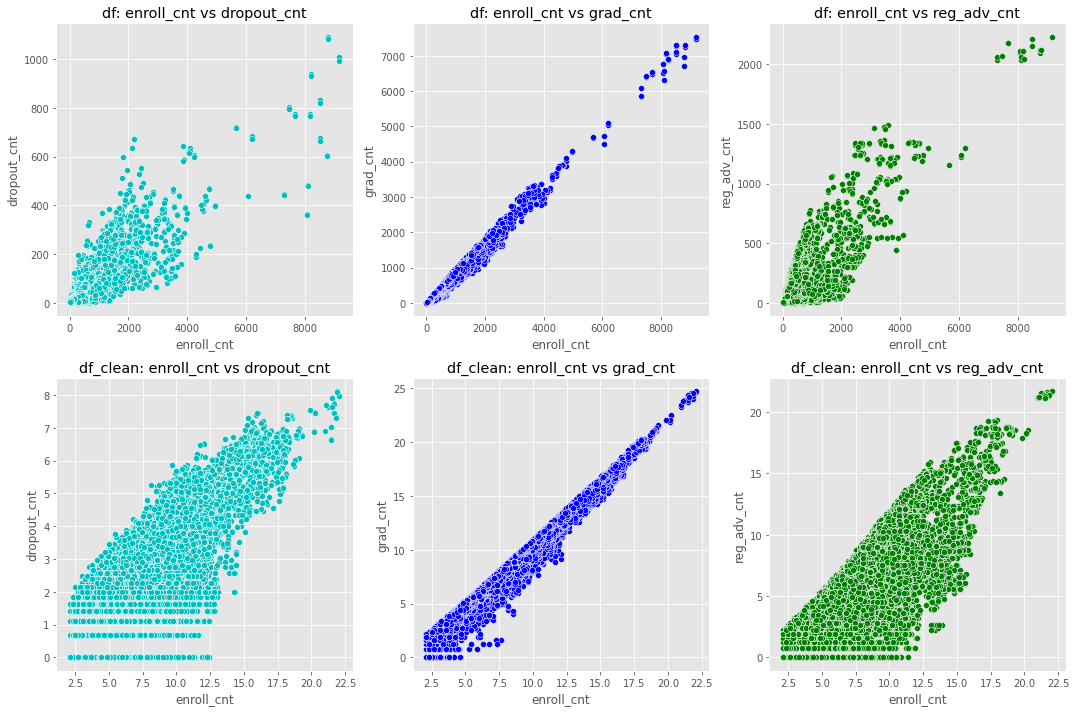

In [260]:
# Create a figure with 2 rows and 3 columns for side-by-side comparison of df and df_clean
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# First row - Original df
# First subplot
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=df, color='c', ax=axes[0, 0])
axes[0, 0].set_title('df: enroll_cnt vs dropout_cnt')

# Second subplot 
sns.scatterplot(x='enroll_cnt', y='grad_cnt', data=df, color='b', ax=axes[0, 1])
axes[0, 1].set_title('df: enroll_cnt vs grad_cnt')

# Third subplot 
sns.scatterplot(x='enroll_cnt', y='reg_adv_cnt', data=df, color='g', ax=axes[0, 2])
axes[0, 2].set_title('df: enroll_cnt vs reg_adv_cnt')

# Second row - Updated df_clean
# First subplot
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=df_clean, color='c', ax=axes[1, 0])
axes[1, 0].set_title('df_clean: enroll_cnt vs dropout_cnt')

# Second subplot 
sns.scatterplot(x='enroll_cnt', y='grad_cnt', data=df_clean, color='b', ax=axes[1, 1])
axes[1, 1].set_title('df_clean: enroll_cnt vs grad_cnt')

# Third subplot 
sns.scatterplot(x='enroll_cnt', y='reg_adv_cnt', data=df_clean, color='g', ax=axes[1, 2])
axes[1, 2].set_title('df_clean: enroll_cnt vs reg_adv_cnt')

# Display the plots
plt.tight_layout()
plt.show()

- All the graphs  has strong positive correlation between the columns.
- It might indicate a relationship where changes in one variable can be used to reliably predict changes in the other variable.

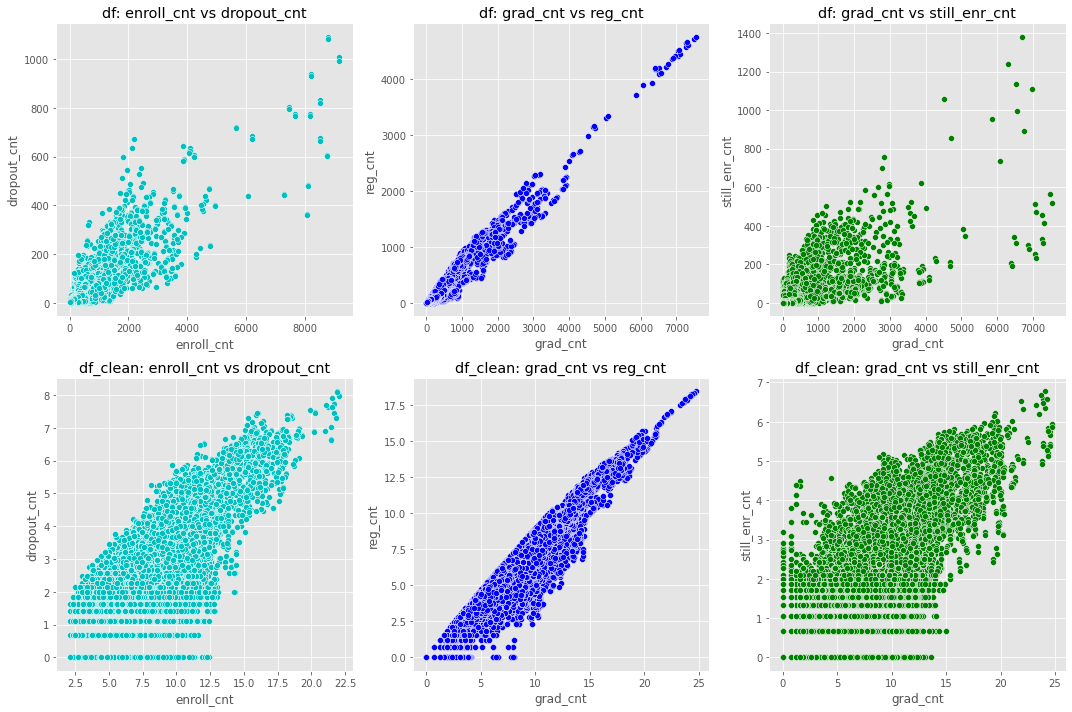

In [261]:
# Create a figure with 2 rows and 3 columns for side-by-side comparison of df and df_clean
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

# First row - Original df
# First subplot
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=df, color='c', ax=axes[0, 0])
axes[0, 0].set_title('df: enroll_cnt vs dropout_cnt')

# Second subplot 
sns.scatterplot(x='grad_cnt', y='reg_cnt', data=df, color='b', ax=axes[0, 1])
axes[0, 1].set_title('df: grad_cnt vs reg_cnt')

# Third subplot 
sns.scatterplot(x='grad_cnt', y='still_enr_cnt', data=df, color='g', ax=axes[0, 2])
axes[0, 2].set_title('df: grad_cnt vs still_enr_cnt')

# Second row - Updated df_clean
# First subplot
sns.scatterplot(x='enroll_cnt', y='dropout_cnt', data=df_clean, color='c', ax=axes[1, 0])
axes[1, 0].set_title('df_clean: enroll_cnt vs dropout_cnt')

# Second subplot 
sns.scatterplot(x='grad_cnt', y='reg_cnt', data=df_clean, color='b', ax=axes[1, 1])
axes[1, 1].set_title('df_clean: grad_cnt vs reg_cnt')

# Third subplot 
sns.scatterplot(x='grad_cnt', y='still_enr_cnt', data=df_clean, color='g', ax=axes[1, 2])
axes[1, 2].set_title('df_clean: grad_cnt vs still_enr_cnt')

# Display the plots
plt.tight_layout()
plt.show()

- - Overall, the scatter plot provides clear evidence of a strong relationship between the columns .

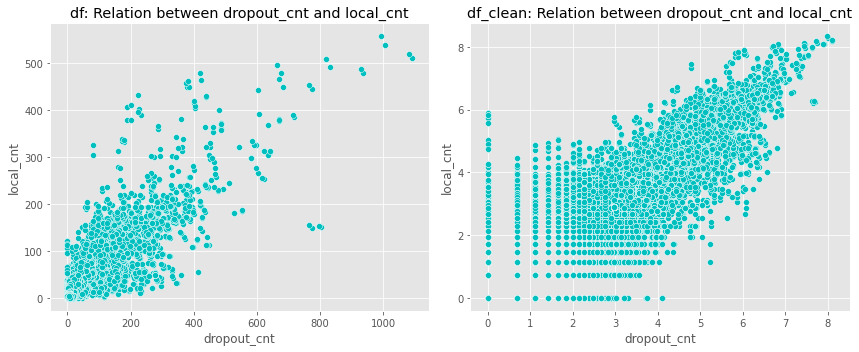

In [262]:
# Create a figure with 1 row and 2 columns for side-by-side comparison of df and df_clean
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First subplot - Original df
sns.scatterplot(x='dropout_cnt', y='local_cnt', data=df, color='c', ax=axes[0])
axes[0].set_title('df: Relation between dropout_cnt and local_cnt')

# Second subplot - Updated df_clean
sns.scatterplot(x='dropout_cnt', y='local_cnt', data=df_clean, color='c', ax=axes[1])
axes[1].set_title('df_clean: Relation between dropout_cnt and local_cnt')

# Display the plots
plt.tight_layout()
plt.show()

- - Overall, the scatter plot provides clear evidence of a strong relationship between the columns .

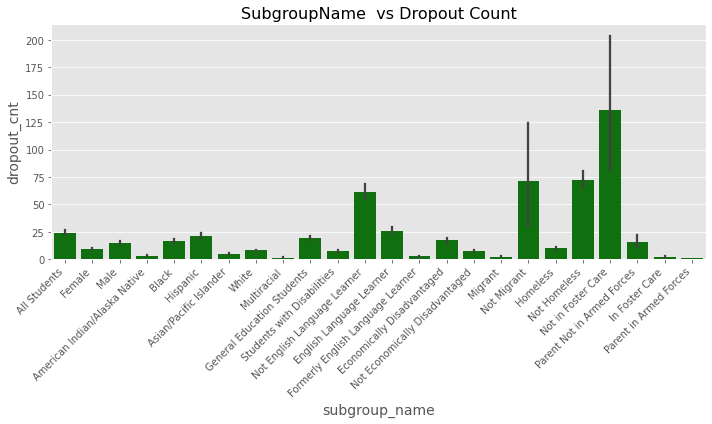

In [263]:
# Calling the function to plot bargraph.

plot_bar(df, 'subgroup_name', 'dropout_cnt', title="SubgroupName  vs Dropout Count", 
         x_label="subgroup_name", y_label="dropout_cnt", color='g')

- 

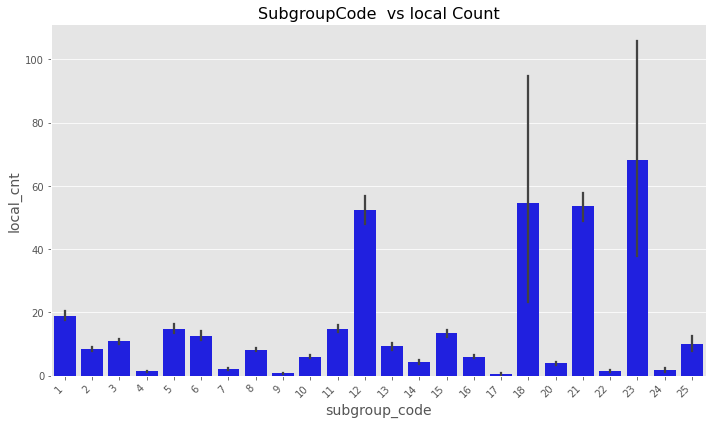

In [264]:
# Calling the function to plot bargraph.

plot_bar(df, 'subgroup_code', 'local_cnt', title="SubgroupCode  vs local Count", x_label="subgroup_code", 
         y_label="local_cnt", color='b')

- 

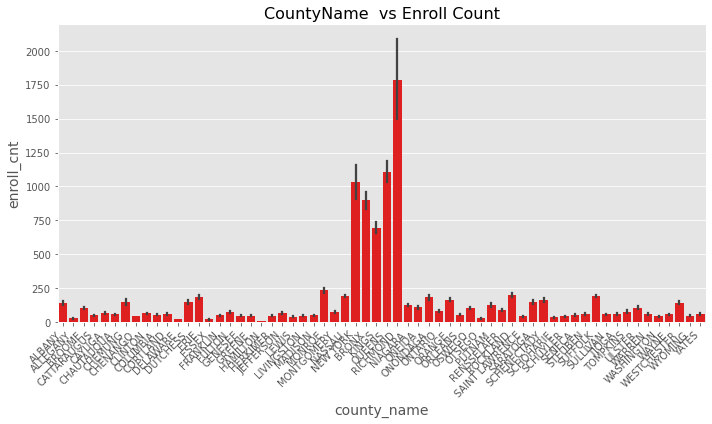

In [265]:
# Calling the function to plot bargraph.

plot_bar(df, 'county_name', 'enroll_cnt', title="CountyName  vs Enroll Count", x_label="county_name",
         y_label="enroll_cnt", color='r')

- 

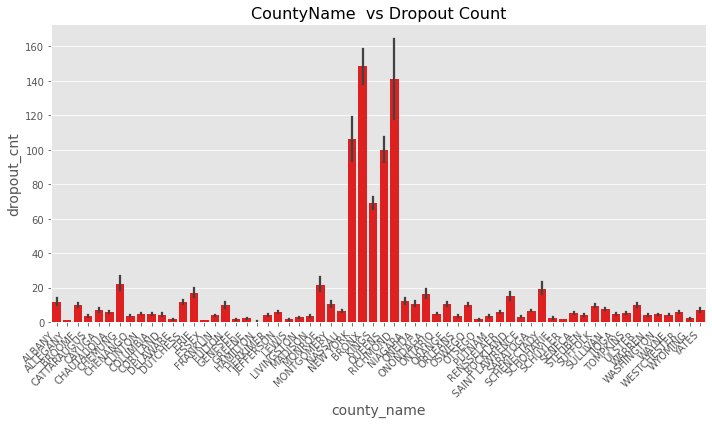

In [266]:
# Calling the function to plot bargraph.

plot_bar(df, 'county_name', 'dropout_cnt', title="CountyName  vs Dropout Count", x_label="county_name", 
         y_label="dropout_cnt", color='r')

- 

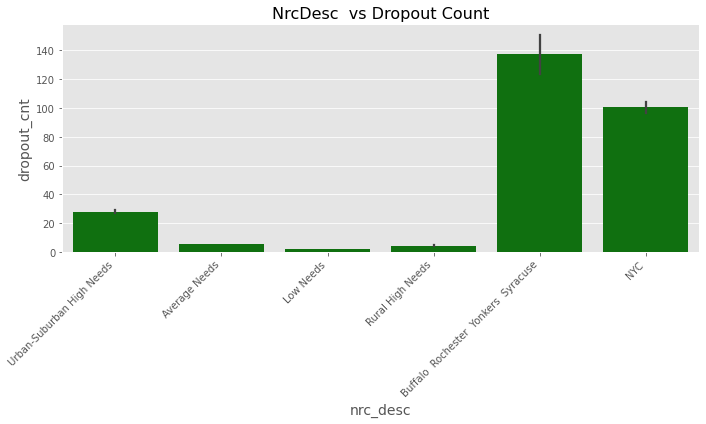

In [267]:
# Calling the function to plot bargraph

plot_bar(df, 'nrc_desc', 'dropout_cnt', title="NrcDesc  vs Dropout Count", x_label="nrc_desc",
         y_label="dropout_cnt", color='g')

- 

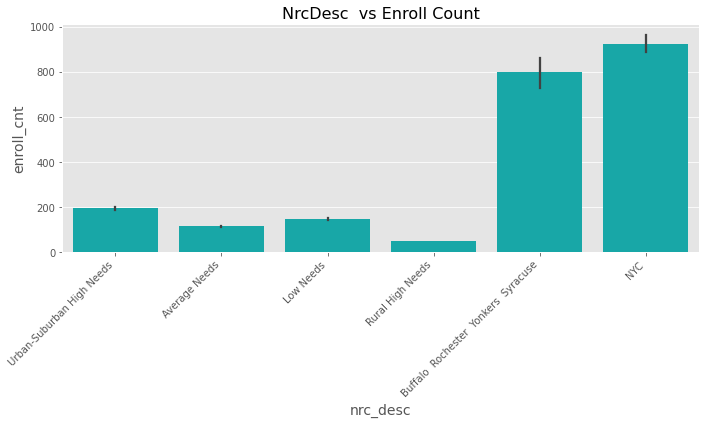

In [268]:
# Calling the function to plot bargraph

plot_bar(df, 'nrc_desc', 'enroll_cnt', title="NrcDesc  vs Enroll Count", x_label="nrc_desc",
         y_label="enroll_cnt", color='c')

- 

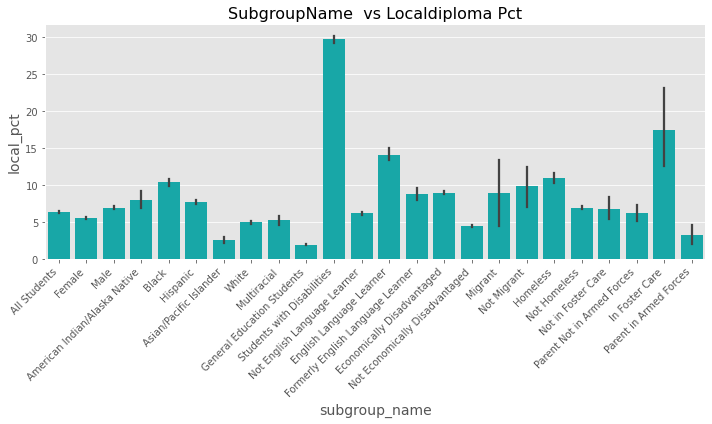

In [269]:
# Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'local_pct', title="SubgroupName  vs Localdiploma Pct", x_label="subgroup_name",
         y_label="local_pct", color='c')

- 

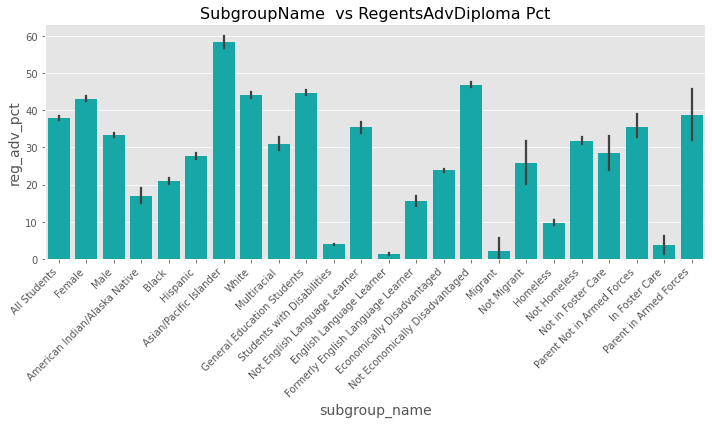

In [270]:
# Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'reg_adv_pct', title="SubgroupName  vs RegentsAdvDiploma Pct", 
         x_label="subgroup_name", y_label="reg_adv_pct", color='c')

- 

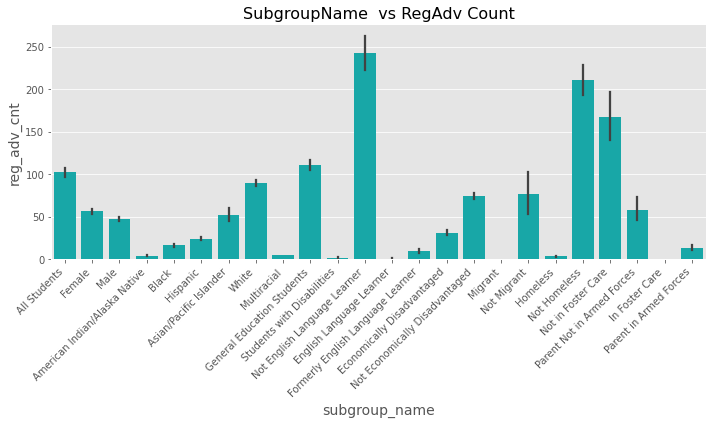

In [271]:
# Calling the function to plot bargraph

plot_bar(df, 'subgroup_name', 'reg_adv_cnt', title="SubgroupName  vs RegAdv Count", 
         x_label="subgroup_name", y_label="reg_adv_cnt", color='c')

- 

#### Ensuring Multivariate

----

<b> [Back to Content](#Content) </b>

## 6. Dimensionality Reduction

In [272]:
df_clean.isna().sum()

enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
dtype: int64

In [273]:
# Seperating target attribute from rest of the attributes.

y = df_clean['dropout_cnt']

y.head()

0    5.511544
1    4.524293
2    4.812401
3    2.982303
4    4.922005
Name: dropout_cnt, dtype: float64

In [274]:
# dropping the dropout_cnt column

X = df_clean.drop('dropout_cnt', axis=1)

X.head(2)

enroll_cnt   grad_cnt      grad_pct  local_cnt  local_pct   reg_cnt  \
0   11.942990  12.072173  3.025215e+06   4.976678   3.560816  9.611439   
1    9.915678  10.048644  3.905120e+06   3.981249   3.363248  8.125162   

     reg_pct  reg_adv_cnt  reg_adv_pct  non_diploma_credential_cnt  ...  \
0  42.052211     7.959076     9.624768                    1.892145  ...   
1  46.362903     6.232347    10.199983                    0.925705  ...   

   aggregation_type             aggregation_name  nrc_code  \
0          District  ALBANY CITY SCHOOL DISTRICT         3   
1          District  ALBANY CITY SCHOOL DISTRICT         3   

                    nrc_desc  county_code  county_name nyc_ind  \
0  Urban-Suburban High Needs            1       ALBANY       0   
1  Urban-Suburban High Needs            1       ALBANY       0   

                      membership_desc subgroup_code subgroup_name  
0  2013 Total Cohort - 6 Year Outcome             1  All Students  
1  2013 Total Cohort - 6 Year Outcome             2        Female  

[2 rows x 28 columns]

In [275]:
# Get the dummy data from the categorical columns.

cat_cols = ['report_school_year', 'aggregation_index', 'aggregation_type', 'aggregation_name', 
            'nrc_code', 'nrc_desc', 'county_code', 'county_name', 'nyc_ind', 'membership_desc', 
            'subgroup_code', 'subgroup_name']

X_cat_dummy = pd.get_dummies(X[cat_cols], drop_first=True).astype(int)

X_cat_dummy.head(2)

aggregation_name_ADIRONDACK CENTRAL SCHOOL DISTRICT  \
0                                                  0     
1                                                  0     

   aggregation_name_AFTON CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   

   aggregation_name_AKRON CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   

   aggregation_name_ALBANY CITY SCHOOL DISTRICT  \
0                                             1   
1                                             1   

   aggregation_name_ALBION CENTRAL SCHOOL DISTRICT  \
0                                                0   
1                                                0   

   aggregation_name_ALDEN CENTRAL SCHOOL DISTRICT  \
0                                               0   
1                                               0   

   aggregation_name_ALEXANDER CENTRAL SCHOOL DISTRICT  \
0                                                  0    
1                                                  0    

   aggregation_name_ALEXANDRIA CENTRAL SCHOOL DISTRICT  \
0                                                  0     
1                                                  0     

   aggregation_name_ALFRED-ALMOND CENTRAL SCHOOL DISTRICT  \
0                                                  0        
1                                                  0        

   aggregation_name_ALLEGANY-LIMESTONE CENTRAL SCHOOL DISTRICT  ...  \
0                                                  0            ...   
1                                                  0            ...   

   subgroup_name_Multiracial  subgroup_name_Not Economically Disadvantaged  \
0                          0                                             0   
1                          0                                             0   

   subgroup_name_Not English Language Learner  subgroup_name_Not Homeless  \
0                                           0                           0   
1                                           0                           0   

   subgroup_name_Not Migrant  subgroup_name_Not in Foster Care  \
0                          0                                 0   
1                          0                                 0   

   subgroup_name_Parent Not in Armed Forces  \
0                                         0   
1                                         0   

   subgroup_name_Parent in Armed Forces  \
0                                     0   
1                                     0   

   subgroup_name_Students with Disabilities  subgroup_name_White  
0                                         0                    0  
1                                         0                    0  

[2 rows x 863 columns]

In [276]:
# Drop the original columns from the DataFrame.

X.drop(columns=cat_cols, inplace=True)

In [277]:
 # X.columns

In [278]:
# Standarise the numeric attributes.

std_scaler = StandardScaler()

X_std = std_scaler.fit_transform(X)

- We choose to Standarise the dataset over Normalising scale, because:-
  - It scales the data to have a mean of '0' and a standard deviation of '1', which is useful when the features have different scales but are roughly normally distributed.
  - It is useful for algorithms like linear regression, logistic regression, SVM, and neural networks where feature distributions matter, especially if features have different units or magnitudes.
  
- Here, we have to train different types of regression models, so standarising out dataset will be more usefull.

In [279]:
# Convert the nd array of X_std to dataframe.

X_std = pd.DataFrame(X_std, columns=['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct', 
                                       'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct', 
                                       'non_diploma_credential_cnt', 'non_diploma_credential_pct', 
                                       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_pct'])

In [280]:
# Concatenate the original DataFrame with the one-hot encoded columns.

X = pd.concat([X_std, X_cat_dummy], axis=1)

X.head()

enroll_cnt  grad_cnt  grad_pct  local_cnt  local_pct   reg_cnt   reg_pct  \
0    1.810249  1.598723 -1.438280   2.225704   0.461870  1.835961  0.292551   
1    0.980617  0.857293 -1.046015   1.389328   0.321458  1.142837  0.686332   
2    1.014173  0.726521 -1.818200   1.493148   0.461870  0.949165 -0.102789   
3    0.430514  0.413351 -0.205269   0.477437   0.244566  0.458896  0.005788   
4    1.119310  0.866171 -1.639798   1.760678   0.593716  1.229815  0.528996   

   reg_adv_cnt  reg_adv_pct  non_diploma_credential_cnt  ...  \
0     0.775961    -1.074813                    2.576256  ...   
1     0.170593    -1.008313                    0.545234  ...   
2     0.115504    -1.142211                    2.460835  ...   
3     0.412726     0.060796                    0.507123  ...   
4    -0.379063    -1.647998                    2.156708  ...   

   subgroup_name_Multiracial  subgroup_name_Not Economically Disadvantaged  \
0                          0                                             0   
1                          0                                             0   
2                          0                                             0   
3                          0                                             0   
4                          0                                             0   

   subgroup_name_Not English Language Learner  subgroup_name_Not Homeless  \
0                                           0                           0   
1                                           0                           0   
2                                           0                           0   
3                                           0                           0   
4                                           0                           0   

   subgroup_name_Not Migrant  subgroup_name_Not in Foster Care  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   subgroup_name_Parent Not in Armed Forces  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   subgroup_name_Parent in Armed Forces  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   subgroup_name_Students with Disabilities  subgroup_name_White  
0                                         0                    0  
1                                         0                    0  
2                                         0                    0  
3                                         0                    0  
4                                         0                    0  

[5 rows x 879 columns]

In [281]:
# Checking the shape of dataframe having independent attributes.

X.shape

(73152, 879)

In [282]:
X.isna().sum()

enroll_cnt                                  0
grad_cnt                                    0
grad_pct                                    0
local_cnt                                   0
local_pct                                   0
                                           ..
subgroup_name_Not in Foster Care            0
subgroup_name_Parent Not in Armed Forces    0
subgroup_name_Parent in Armed Forces        0
subgroup_name_Students with Disabilities    0
subgroup_name_White                         0
Length: 879, dtype: int64

- Attribues increased a lot due to one-hot encoding.

In [283]:
# Create the train & test split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [284]:
# Print the shapes of the resulting datasets.

print("Training dataset shapes ->  X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Testing dataset shapes ->  X: {}, y: {}".format(X_test.shape, y_test.shape))

Training dataset shapes ->  X: (43891, 879), y: (43891,)
Testing dataset shapes ->  X: (29261, 879), y: (29261,)


### 6.1 Variance Threshold

- Variance Threshold is a method that filters out features with little variation, as they are often less useful for predicting outcomes in machine learning models.

In [285]:
# Creating the VarianceThreshold object (remove features with variance below the threshold)
selector = VarianceThreshold(threshold=0.02)

# Fit the selector to the data
selector.fit(X_train)

selector.get_support()

# Get the list of featurs with low variance.
low_var_cols = [col for col in X.columns if col not in X.columns[selector.get_support()]]

print(f"Total number of attributes with Low Variance : {len(low_var_cols)}")

Total number of attributes with Low Variance : 791


- This shows that numeric columns has high variance

In [286]:
# Dropping Low Variance attributes from X_train and X_test.

X_train = X_train.drop(low_var_cols, axis=1)

X_test = X_test.drop(low_var_cols, axis=1)

print(f"Shape of dataframe after removing the low variance columns:{X_train.shape}")
print()
print(f"Shape of dataframe after removing the low variance columns:{X_test.shape}")

Shape of dataframe after removing the low variance columns:(43891, 88)

Shape of dataframe after removing the low variance columns:(29261, 88)


In [287]:
X_test.head()

enroll_cnt  grad_cnt  grad_pct  local_cnt  local_pct   reg_cnt  \
484      0.072408  0.060572 -0.251697   0.907415   0.948489  0.185463   
40527    1.621033  1.694927  0.363814   1.275846  -0.364501  1.450940   
20934   -0.323030 -0.369664 -0.676292   0.450435   0.948489 -0.123555   
1583    -1.662725 -1.594933 -0.017274  -1.355767   0.008451 -1.333358   
15939    0.430514  0.413351 -0.205269   0.477437   0.244566  0.458896   

        reg_pct  reg_adv_cnt  reg_adv_pct  non_diploma_credential_cnt  ...  \
484    0.450241    -0.237867    -0.624956                    0.545234  ...   
40527 -0.261401     1.920728     0.744841                    1.945272  ...   
20934  0.764916    -0.845400    -1.142211                    0.545234  ...   
1583   1.625912    -1.578393    -1.074813                   -1.400184  ...   
15939  0.005788     0.412726     0.060796                    0.507123  ...   

       subgroup_name_Male  subgroup_name_Multiracial  \
484                     0                          0   
40527                   0                          0   
20934                   0                          0   
1583                    1                          0   
15939                   0                          0   

       subgroup_name_Not Economically Disadvantaged  \
484                                               0   
40527                                             0   
20934                                             0   
1583                                              0   
15939                                             0   

       subgroup_name_Not English Language Learner  subgroup_name_Not Homeless  \
484                                             0                           0   
40527                                           0                           0   
20934                                           0                           0   
1583                                            0                           0   
15939                                           0                           0   

       subgroup_name_Not Migrant  subgroup_name_Not in Foster Care  \
484                            0                                 0   
40527                          0                                 0   
20934                          0                                 0   
1583                           0                                 0   
15939                          0                                 0   

       subgroup_name_Parent Not in Armed Forces  \
484                                           0   
40527                                         0   
20934                                         0   
1583                                          0   
15939                                         1   

       subgroup_name_Students with Disabilities  subgroup_name_White  
484                                           0                    0  
40527                                         0                    0  
20934                                         0                    0  
1583                                          0                    0  
15939                                         0                    0  

[5 rows x 88 columns]

### 6.2 PCA

In [288]:
# Distributing X_train & X_test to numerical & categorical attributes respectively.

X_train_num = X_train.select_dtypes(include='float64')

X_train_cat = X_train.select_dtypes(exclude='float64')


X_test_num = X_test.select_dtypes(include='float64')

X_test_cat = X_test.select_dtypes(exclude ='float64') 

- Since Principal Component Analysis (PCA) is designed for numerical features, we have removed the categorical columns from our datasets. In order to enhance our ability to investigate and show the underlying patterns and correlations in the data, we make sure that our PCA transformation only concentrates on the numerical characteristics.

In [289]:
# Create an instance of a PCA model, and set the components to 
pca = PCA(n_components=16)

# apply the pca and transform it to 16 principal components per observation of the standarised data 'X_train_num'.
X_train_num_pca = pca.fit(X_train_num)

# Display the explained variance ratio for the principal components we've derived from the data 'X_train_num'.
print(np.round(pca.explained_variance_ratio_, 2)*100)

# apply the pca and transform it to 16 principal components per observation of the standarised data 'X_test_num'.
X_test_num_pca = pca.fit(X_test_num)

# Display the explained variance ratio for the principal components we've derived from the data 'X_test_num'.
print(np.round(pca.explained_variance_ratio_, 2)*100)

[43. 22.  9.  7.  6.  5.  5.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
[43. 22.  9.  7.  6.  5.  5.  1.  1.  0.  0.  0.  0.  0.  0.  0.]


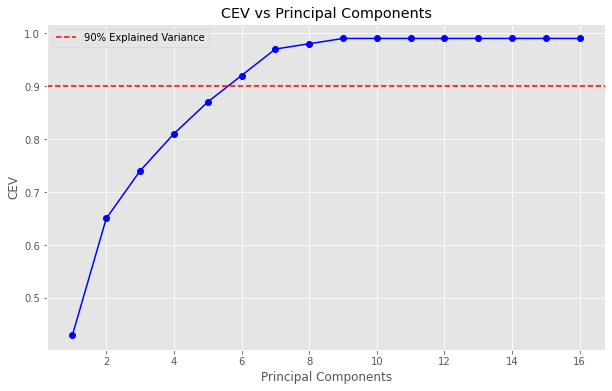

No. of components that explain 90% of the variance: 6


In [290]:
# Explained variance ratio in percentage for all 16 numeric features
evp = np.array([43, 22,  9,  7,  6,  5,  5,  1,  1,  0,  0,  0,  0,  0,  0,  0])

# Explained variance ratio
epr = evp / 100    

# Cumulative explained variance
cev = np.cumsum(epr)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(epr) + 1), cev, marker='o', color = 'blue')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('CEV')
plt.title('CEV vs Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# No. of components, which explain at least 90% of the variance
n_components = np.argmax(cev >= 0.90) + 1
print(f"No. of components that explain 90% of the variance: {n_components}")

In [291]:
# Create an instance of a PCA model, and set the components to 6, from the above results.
pca = PCA(n_components=6)

# Apply the results of the PCA to training & testing data to transform it into 6 principal components
# per observation.
X_train_num_pca = pca.fit_transform(X_train_num)
X_test_num_pca = pca.fit_transform(X_test_num)

# Convert the nd array of X_train_num_pca, & X_test_num to dataframe.
X_train_num_pca = pd.DataFrame(X_train_num_pca, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6'])
print('X_train_num_pca :- ')
display(X_train_num_pca.head(2))
print(X_train_num_pca.shape)

print()

X_test_num_pca = pd.DataFrame(X_test_num_pca, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6'])
print('X_test_num_pca :- ')
display(X_test_num_pca.head(2))
print(X_test_num_pca.shape)

X_train_num_pca :- 


pca_1     pca_2     pca_3     pca_4     pca_5     pca_6
0 -0.178242  1.475394  1.582637 -0.402158 -1.859072 -0.453499
1 -4.154586 -2.372991  0.434106 -0.517639 -0.291347  1.051539

(43891, 6)

X_test_num_pca :- 


pca_1     pca_2     pca_3     pca_4     pca_5     pca_6
0  0.276190  1.144229  0.562154 -0.391550 -1.973799 -0.421445
1  3.994078 -2.091196 -0.093081 -0.778916  0.372273 -0.224528

(29261, 6)


In [292]:
# Reset the index so that it does not provide null values while concatination.

X_train_num_pca.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace=True)
X_test_num_pca.reset_index(drop=True, inplace=True)
X_test_cat.reset_index(drop=True, inplace=True)

In [248]:
X_test_cat.shape

(29261, 16)

- Thus, we have used the PCA and eliminated aatributes from the numerical attributes, and finally we have only 6 PCAs' column.

In [293]:
# Concating the numerical & categorical attributes before model training.

X_train = pd.concat([X_train_num_pca , X_train_cat], axis=1)

X_test = pd.concat([X_test_num_pca , X_test_cat], axis=1)

In [294]:
print(X_train.shape)
print(X_test.shape)


(43891, 78)
(29261, 78)


### 6.3 Forward Feature Selection

Reference: https://www.analyticsvidhya.com/blog/2021/04/forward-feature-selection-and-its-implementation/

In [298]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [299]:
# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [300]:
# Fit the Sequential Feature Selector model_1
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.5s

[2024-09-29 19:02:04] Features: 1/10 -- score: -0.2978185714366689[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s

[2024-09-29 19:02:11] Features: 2/10 -- score: -0.2608687067145145[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.6s

[2024-09-29 19:02:19] Features: 3/10 -- score: -0.2439488574766549[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    5.8s

[2024-09-29 19:02:31] Features: 4/10 -- score: -0.2284824051689855[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    7.0s

[2024-09-29 19:02:44] Features: 5/10 -- score: -0.21937725241309733[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    8.6s

[2024-09-29 19:03:00] Features: 6/10 -- score: -0.21201063385233368[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   10.4s

[2024-09-29 19:03:18] Features: 7/10 -- score: -0.20665364500008349[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   11.4s

[2024-09-29 19:03:38] Features: 8/10 --

In [301]:
# Extracting the names of the selected features after the fitting process.

feat_names_1 = list(sfs1.k_feature_names_)
feat_names_1

['pca_1',
 'pca_2',
 'pca_4',
 'pca_5',
 'pca_6',
 'nrc_code_6',
 'membership_desc_2015 Total Cohort - 4 Year Outcome',
 'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019',
 'subgroup_code_10',
 'subgroup_code_11']

In [302]:
# Calling the linear regression model for another set of best features model_2.

lreg = LinearRegression()
sfs2 = sfs(lreg, k_features='best', forward=True, verbose=2, scoring='neg_mean_squared_error')

In [303]:
# Fit the Sequential Feature Selector.

sfs2 = sfs2.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.5s

[2024-09-29 19:05:13] Features: 1/78 -- score: -0.2978185714366689[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s

[2024-09-29 19:05:20] Features: 2/78 -- score: -0.2608687067145145[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.7s

[2024-09-29 19:05:29] Features: 3/78 -- score: -0.2439488574766549[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    6.2s

[2024-09-29 19:05:41] Features: 4/78 -- score: -0.2284824051689855[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    7.1s

[2024-09-29 19:05:54] Features: 5/78 -- score: -0.21937725241309733[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    8.7s

[2024-09-29 19:06:10] Features: 6/78 -- score: -0.21201063385233368[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    9.9s

[2024-09-29 19:06:28] Features: 7/78 -- score: -0.20665364500008349[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   11.5s

[2024-09-29 19:06:48] Features: 8/78 --

In [305]:
# Extracting the names of the selected features after the fitting process.

feat_names_2 = list(sfs2.k_feature_names_)
feat_names_2

['pca_1',
 'pca_2',
 'pca_3',
 'pca_4',
 'pca_5',
 'pca_6',
 'nrc_code_3',
 'nrc_code_4',
 'nrc_code_5',
 'nrc_code_6',
 'nrc_desc_NYC',
 'county_code_6',
 'county_code_26',
 'county_code_28',
 'county_code_41',
 'county_code_42',
 'county_code_44',
 'county_code_51',
 'county_code_58',
 'county_code_66',
 'county_name_CHAUTAUQUA',
 'county_name_ERIE',
 'county_name_ORANGE',
 'nyc_ind_1',
 'membership_desc_2014 Total Cohort - 5 Year Outcome',
 'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019',
 'membership_desc_2015 Total Cohort - 4 Year Outcome',
 'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019',
 'subgroup_code_3',
 'subgroup_code_5',
 'subgroup_code_6',
 'subgroup_code_9',
 'subgroup_code_10',
 'subgroup_code_11',
 'subgroup_code_12',
 'subgroup_code_16',
 'subgroup_code_18',
 'subgroup_code_20',
 'subgroup_code_21',
 'subgroup_code_25',
 'subgroup_name_Asian/Pacific Islander',
 'subgroup_name_Black',
 'subgroup_name_English Language Learner',
 'su

In [373]:
# Define the selected feature names for separation
selected_features = feat_names_2

# Create a new DataFrame with the selected features
X_train_all_best = X_train[selected_features]
X_test_all_best = X_test[selected_features]

# Display the shape of the new DataFrame to confirm the selection
# Print the predicted values
display(X_train_all_best.shape)
display(X_test_all_best.shape)

(43891, 50)

(29261, 50)

In [374]:
# Define the selected feature names for X_cat_10
selected_features_10 = feat_names_1

# Create a new DataFrame with the selected features
X_train_10_best = X_train[selected_features_10]
X_test_10_best = X_test[selected_features_10]

# Display the shape of the new DataFrame to confirm the selection
display(X_train_10_best.shape)
display(X_test_10_best.shape)

(43891, 10)

(29261, 10)

In [375]:
# Checking the shapes of the final resulting datasets before training the models.

print("All best features Training dataset shapes ->  X: {}, y: {}".format(X_train_all_best.shape, y_train.shape))
print("All best features Testing dataset shapes  ->  X: {}, y: {}".format(X_test_all_best.shape, y_test.shape))

print()

print("Top 10 best features Training dataset shapes ->  X: {}, y: {}".format(X_train_10_best.shape, y_train.shape))
print("Top 10 best features Testing dataset shapes  ->  X: {}, y: {}".format(X_test_10_best.shape, y_test.shape))

All best features Training dataset shapes ->  X: (43891, 50), y: (43891,)
All best features Testing dataset shapes  ->  X: (29261, 50), y: (29261,)

Top 10 best features Training dataset shapes ->  X: (43891, 10), y: (43891,)
Top 10 best features Testing dataset shapes  ->  X: (29261, 10), y: (29261,)


- Here, we have done the forward selection and did with 2 different number of best features. So, that we will be training with different models.

----

<b> [Back to Content](#Content) </b>

## 7. Regression Modeling & Model Selection

### 7.1 1<sup>st</sup> Poisson Regression Model

In [388]:
# import statsmodels.api as sm

# Reset index for both features and response variable
X_train_all_best.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test_all_best.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Fit the Poisson regression model
poisson_model_1 = sm.GLM(y_train, X_train_all_best, family=sm.families.Poisson()).fit()

# Summary of the model
print(poisson_model_1.summary())


poisson_regressor = PoissonRegressor()

# Fit the model
poisson_model_1 = poisson_regressor.fit(X_train_all_best, y_train)

# Make predictions
y_pred_all_best_pm1 = poisson_regressor.predict(X_test_all_best)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                43891
Model:                            GLM   Df Residuals:                    43850
Model Family:                 Poisson   Df Model:                           40
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59591.
Date:                Sun, 29 Sep 2024   Deviance:                       11154.
Time:                        22:55:50   Pearson chi2:                 8.33e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4797
Covariance Type:            nonrobust                                         
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

- Model Fit: The model explains about 48% of the variability in dropout counts, indicating a good fit.
- Coefficients: The results show expected relationships; for example, some factors increase dropout rates while others decrease them. Most coefficients align with what we know about student retention.
- Consistency: Coefficients are similar across different models, suggesting robust findings.

### K-fold

In [389]:
# 10 k-fold splits for training dataset
kf = KFold(n_splits=10, shuffle=True, random_state=100)

# k-fold cross validation
cross_val_scores = cross_val_score(poisson_model_1, X_train_all_best_const, y_train, cv=kf, scoring='r2')

print(f"Cross-Val R^2 scores of training dataset : {cross_val_scores}")
print()
print(f"Mean R^2 score of training dataset : {np.mean(cross_val_scores)}")

Cross-Val R^2 scores of training dataset : [0.78197359 0.76407358 0.76546827 0.78048308 0.77213964 0.76897212
 0.76071683 0.74015542 0.78006797 0.75456672]

Mean R^2 score of training dataset : 0.7668617233055015


----

<b> [Back to Content](#Content) </b>

### 7.2 2<sup>nd</sup> Poisson Regression Model

In [387]:
# Reset index for both features and response variable
X_train_10_best.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.Series(y_train).reset_index(drop=True)
X_test_10_best.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Fit the Poisson regression model
poisson_model_2 = sm.GLM(y_train, X_train_10_best, family=sm.families.Poisson()).fit()

# Summary of the model
print(poisson_model_2.summary())

poisson_regressor = PoissonRegressor()


# Fit the model
poisson_model_2 = poisson_regressor.fit(X_train_10_best, y_train)

# Make predictions
y_pred_10_best_pm2 = poisson_regressor.predict(X_test_10_best)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                43891
Model:                            GLM   Df Residuals:                    43881
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70032.
Date:                Sun, 29 Sep 2024   Deviance:                       32036.
Time:                        22:46:15   Pearson chi2:                 4.01e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1628
Covariance Type:            nonrobust                                         
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

- Model Fit: The model accounts for approximately 16% of the variability in dropout counts, as indicated by a Pseudo R-squared of 0.1628. This suggests a moderate fit, meaning there is room for improvement.

- Coefficients: The model includes 9 predictors, each with coefficients indicating their impact on dropout counts. While the specific coefficients are not provided here, the signs (positive or negative) will reveal whether increases in these factors lead to higher or lower dropout rates.

### K-fold

In [386]:
# 10 k-fold splits for training dataset
kf = KFold(n_splits=10, shuffle=True, random_state=100)

# k-fold cross validation
cross_val_scores = cross_val_score(model_2, X_train_10_best_const, y_train, cv=kf, scoring='r2')

print(f"Cross-Val R^2 scores of training dataset : {cross_val_scores}")
print()
print(f"Mean R^2 score of training dataset : {np.mean(cross_val_scores)}")

Cross-Val R^2 scores of training dataset : [0.75900988 0.73808668 0.74246494 0.75929935 0.75161889 0.7478991
 0.74077669 0.70888033 0.75785786 0.72826796]

Mean R^2 score of training dataset : 0.7434161675880905


----

<b> [Back to Content](#Content) </b>

### 7.3 1<sup>st</sup> Negative Binomial Regression Model

In [357]:
# Fit the Negative Binomial regression model
neg_binom_model_1 = sm.GLM(y_train, X_train_all_best, family=sm.families.NegativeBinomial()).fit()

# Summary of the model
print(neg_binom_model_1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                43891
Model:                            GLM   Df Residuals:                    43850
Model Family:        NegativeBinomial   Df Model:                           40
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83158.
Date:                Sun, 29 Sep 2024   Deviance:                       6089.7
Time:                        21:49:14   Pearson chi2:                 3.96e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2160
Covariance Type:            nonrobust                                         
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

----

<b> [Back to Content](#Content) </b>

### 7.4 2<sup>nd</sup> Negative Binomial Regression Model

In [369]:
# Fit the Negative Binomial regression model
neg_binom_model_2 = sm.GLM(y_train, X_train_10_best, family=sm.families.NegativeBinomial()).fit()

# Summary of the model
print(neg_binom_model_2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                43891
Model:                            GLM   Df Residuals:                    43881
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -87057.
Date:                Sun, 29 Sep 2024   Deviance:                       13888.
Time:                        22:15:02   Pearson chi2:                 1.92e+04
No. Iterations:                    10   Pseudo R-squ. (CS):            0.06355
Covariance Type:            nonrobust                                         
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

----

<b> [Back to Content](#Content) </b>

### 7.5 1<sup>st</sup> Multiple Linear Regression Model

In [370]:
# Fit the OLS regression model
multiple_regression_model_1 = sm.OLS(y_train, X_train_all_best).fit()
# Summary of the model
print(multiple_regression_model_1.summary())


                                 OLS Regression Results                                
Dep. Variable:            dropout_cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          3.021e+04
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:15:43   Log-Likelihood:                         -30124.
No. Observations:               43891   AIC:                                  6.033e+04
Df Residuals:                   43850   BIC:                                  6.069e+04
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
                                                                       coef    std err          t      P>|t|      [0.025

----

<b> [Back to Content](#Content) </b>

### 7.6 2<sup>nd</sup> Multiple Linear Regression Model

In [371]:
# Fit the OLS regression model
multiple_regression_model_2 = sm.OLS(y_train, X_train_10_best).fit()
# Summary of the model
print(multiple_regression_model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:            dropout_cnt   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.525
Method:                 Least Squares   F-statistic:                              4861.
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:15:48   Log-Likelihood:                         -87846.
No. Observations:               43891   AIC:                                  1.757e+05
Df Residuals:                   43881   BIC:                                  1.758e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                                                       coef    std err          t      P>|t|      [0.025

- With a strong fit explaining over 52% of the variability in dropout counts, this model highlights key predictors that can inform targeted retention strategies.

----

<b> [Back to Content](#Content) </b>

# Model Selection

When picking the right model from a group of six, including two Poisson regression models, two negative binomial models, and two multiple regression models, it’s essential to go beyond just looking at numbers. You've already selected the first multiple regression model based on its R-squared value, which shows how well it explains the variability in your data. That’s a solid start!

Next, it’s a good idea to double-check the assumptions of linear regression, like ensuring a linear relationship between your variables and checking for consistent variance in the residuals. Plotting these residuals can help spot any unusual patterns.

This is when independent variables are too closely related, which can confuse your results. The Variance Inflation Factor (VIF) can help you assess this.

It’s also beneficial to revisit the Poisson and negative binomial models to see if they offer any additional insights, especially if your data involves counts. Validating your chosen model on a separate test set can confirm its reliability.

Lastly, take time to interpret the model’s coefficients and document your selection process. This not only aids in understanding but also provides a clear rationale for your choice, making your research more transparent and robust.

## Conclusion

- Model Performance:

- Negative Binomial GLM:
    Explains about 21.6% of the dropout variability.
    Indicates some differences between observed and expected dropout counts.
- Poisson GLM:
    Accounts for approximately 16.3% of the variability.
    
- OLS Regression:
    Explains 52.6% of the dropout variability, making it the best fit among the three models.
    Indicates that several predictors are significantly related to dropout rates.
- Statistical Significance:

    All models showed significant results, meaning that at least some predictors matter in explaining dropout counts.
    Insights for Interventions:


- Limitations:
    While the models provide useful insights, issues like missing variables and relationships between predictors might affect    the findings. Future studies could look into more factors to better understand dropout behavior.

<b> [TOP⬆️](#Implementing-and-Evaluating-a-Series-of-Regression-Models) </b>

---
<h3><center>THE END</center></h3>

===================================================================================================================